# 3. Machine Learning

## Integration

In [ ]:
%%capture
%run "PKL - Main (Read Preprocess Visual).ipynb"

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="__main__")
warnings.filterwarnings("ignore", category=PendingDeprecationWarning, module="__main__")
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## 3.2. Clustering

Sauce: https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/

Algoritma yang digunakan:
1. KMeans
2. Gaussian Mixture
3. Fuzzy CMeans
4. KModes

In [ ]:
%%capture
#Import Dependencies for clustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
from collections import Counter
!pip install openpyxl
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

#Kmeans
from sklearn.cluster import KMeans

#Gaussian Mixture
from sklearn.mixture import GaussianMixture

#KModes
!pip install kmodes
from kmodes.kmodes import KModes

#Fuzzy CMeans
!pip install fuzzy-c-means
from fcmeans import FCM

#Silhouette score
from sklearn.metrics import silhouette_score

### 3.2.1. Clustering AEQ

In [ ]:
array_aeq = df_aeq_new.values
X_aeq_clus = {}
X_aeq_clus['Class_Positive'] = array_aeq[:,2:14]
X_aeq_clus['Class_Negative'] = array_aeq[:,14:34]
X_aeq_clus['Learn_Positive'] = array_aeq[:,34:46]
X_aeq_clus['Learn_Negative'] = array_aeq[:,46:66]

y_aeq_clus = {}
y_aeq_clus['Class_Positive'] = array_aeq[:,66]
y_aeq_clus['Class_Negative'] = array_aeq[:,67]
y_aeq_clus['Learn_Positive'] = array_aeq[:,68]
y_aeq_clus['Learn_Negative'] = array_aeq[:,69]

# PCA tranform
for emotion in y_aeq_clus.keys():
    pca = PCA(2)
    X_aeq_clus[emotion] = pca.fit_transform(X_aeq_clus[emotion])

# Menyimpan hasil akurasi 
aeq_clus = pd.DataFrame(index=y_aeq_clus.keys(), columns=['KMeans', "Gaussian Mixture","Fuzzy CMeans"])

# Menyimpan hasil silhouette 
aeq_sil = pd.DataFrame(index=y_aeq_clus.keys(), columns=["KMeans", "Gaussian Mixture","Fuzzy CMeans"])

#### Fungsi ML untuk Clustering

In [ ]:
#Fungsi KMeans
def kmeans_aeq(x_clus,y_clus,cluster,name):
    model_kmeans = KMeans(n_clusters=cluster,random_state=1)
    label_kmeans = model_kmeans.fit_predict(x_clus)

    print(name)
    print('Actual Value :',np.unique(y_clus,return_counts=True))
    print('Predicted Value :',np.unique(label_kmeans,return_counts=True))

    print("Actual silhouette :", silhouette_score(x_clus,y_clus))
    print("Predicted silhouette :", silhouette_score(x_clus, label_kmeans))
    aeq_sil.loc[name,"KMeans"] = silhouette_score(x_clus, label_kmeans)
    print()

    return model_kmeans,label_kmeans

#Fungsi gaussian mixture
def gaussian_aeq(x_clus,y_clus,cluster,name):
    model_gaussian = GaussianMixture(n_components=cluster,random_state=1)
    model_gaussian.fit(x_clus)
    label_gaussian = model_gaussian.predict(x_clus)

    print(name)
    print('Actual Value :',np.unique(y_clus,return_counts=True))
    print('Predicted Value :',np.unique(label_gaussian,return_counts=True))

    print('Actual Silhouette :',silhouette_score(x_clus,y_clus))
    print('Predicted Silhouette :',silhouette_score(x_clus,label_gaussian))
    aeq_sil.loc[name,"Gaussian Mixture"] = silhouette_score(x_clus,label_gaussian)
    print()

    return model_gaussian,label_gaussian

#Fungsi fuzzy cmeans
def fuzzy_aeq(x_clus,y_clus,cluster,name):
    model_fuzzy = FCM(n_clusters=cluster,random_state=1)
    model_fuzzy.fit(x_clus)
    label_fuzzy = model_fuzzy.predict(x_clus)

    print(name)
    print('Actual Value :',np.unique(y_clus,return_counts=True))
    print('Predicted Value :',np.unique(label_fuzzy,return_counts=True))

    print('Actual Silhouette :',silhouette_score(x_clus,y_clus))
    print('Predicted Silhouette :',silhouette_score(x_clus,label_fuzzy))
    aeq_sil.loc[name,"Fuzzy CMeans"] = silhouette_score(x_clus,label_fuzzy)
    print()

    return model_fuzzy,label_fuzzy

#Fungsi visualisasi clsutering
def get_clustering_vis(y_label,x_clus,model):
    for emotion in y_label.keys():
        plt.figure(figsize=(15,7))
        plt.title(emotion)
        plt.scatter(x_clus[emotion][y_label[emotion] == 0, 0], x_clus[emotion][y_label[emotion] == 0, 1],s=50, c='lightgreen',marker='s', edgecolor='black')
        plt.scatter(x_clus[emotion][y_label[emotion] == 1, 0], x_clus[emotion][y_label[emotion] == 1, 1],s=50, c='orange',marker='o', edgecolor='black')
        plt.scatter(x_clus[emotion][y_label[emotion] == 2, 0], x_clus[emotion][y_label[emotion] == 2, 1],s=50, c='lightblue',marker='v', edgecolor='black')
        plt.scatter(x_clus[emotion][y_label[emotion] == 3, 0], x_clus[emotion][y_label[emotion] == 3, 1],s=50, c='black',marker='+', edgecolor='black')

        plt.show()

#### KMeans

In [ ]:
model_kmeans_aeq_cp,label_kmeans_aeq_cp = kmeans_aeq(X_aeq_clus['Class_Positive'],y_aeq_clus['Class_Positive'],2,'Class_Positive')
model_kmeans_aeq_cn,label_kmeans_aeq_cn = kmeans_aeq(X_aeq_clus['Class_Negative'],y_aeq_clus['Class_Negative'],3,'Class_Negative')
model_kmeans_aeq_tp,label_kmeans_aeq_tp = kmeans_aeq(X_aeq_clus['Learn_Positive'],y_aeq_clus['Learn_Positive'],3,'Learn_Positive')
model_kmeans_aeq_tn,label_kmeans_aeq_tn = kmeans_aeq(X_aeq_clus['Learn_Negative'],y_aeq_clus['Learn_Negative'],3,'Learn_Negative')

Class_Positive
Actual Value : (array(['High', 'Moderate'], dtype=object), array([136,  66]))
Predicted Value : (array([0, 1], dtype=int32), array([ 91, 111]))
Actual silhouette : 0.4409670597750534
Predicted silhouette : 0.45940558054817027

Class_Negative
Actual Value : (array(['High', 'Low', 'Moderate'], dtype=object), array([  3, 132,  67]))
Predicted Value : (array([0, 1, 2], dtype=int32), array([81, 38, 83]))
Actual silhouette : 0.42026650228878704
Predicted silhouette : 0.3622783954583277

Learn_Positive
Actual Value : (array(['High', 'Low', 'Moderate'], dtype=object), array([143,   2,  57]))
Predicted Value : (array([0, 1, 2], dtype=int32), array([115,  48,  39]))
Actual silhouette : 0.4491064571009299
Predicted silhouette : 0.4583746708117613

Learn_Negative
Actual Value : (array(['High', 'Low', 'Moderate'], dtype=object), array([  6, 114,  82]))
Predicted Value : (array([0, 1, 2], dtype=int32), array([82, 60, 60]))
Actual silhouette : 0.3976443831619284
Predicted silhouette : 

Pada hasil perhitungan silhouette score diatas, didapatkan bahwa untuk hasil penggunaan Kmeans pada setiap faktor afektif dalam AEQ diperoleh nilai yang cukup baik dimana menandakan bahwa setiap cluster terpisah dengan relatif baik. Pada Class Positive dan Learn Positive, nilai silhouette scorenya melebihi daripada nilai asli nya. Kemudian untuk hasil Class Negative dan Learn Negative, nilai silhouette scorenya mendekati nilai aslinya.

In [ ]:
#Memasukan label ke dalam dict
label_aeq_kmeans = {}
label_aeq_kmeans.update({'Class_Positive':label_kmeans_aeq_cp})
label_aeq_kmeans.update({'Class_Negative':label_kmeans_aeq_cn})
label_aeq_kmeans.update({'Learn_Positive':label_kmeans_aeq_tp})
label_aeq_kmeans.update({'Learn_Negative':label_kmeans_aeq_tn})

#Memasukan model ke dalam dict
model_aeq_kmeans = {}
model_aeq_kmeans.update({'Class_Positive':model_kmeans_aeq_cp})
model_aeq_kmeans.update({'Class_Negative':model_kmeans_aeq_cn})
model_aeq_kmeans.update({'Learn_Positive':model_kmeans_aeq_tp})
model_aeq_kmeans.update({'Learn_Negative':model_kmeans_aeq_tn})

In [ ]:
cat_label_aeq_kmeans = {}
cat_label_aeq_kmeans = label_aeq_kmeans.copy()

#Class_Positive
cat_label_aeq_kmeans['Class_Positive'] = cat_label_aeq_kmeans['Class_Positive'].astype("str")
cat_label_aeq_kmeans['Class_Positive'][cat_label_aeq_kmeans['Class_Positive'] == "0"] = "Moderate"
cat_label_aeq_kmeans['Class_Positive'][cat_label_aeq_kmeans['Class_Positive'] == "1"] = "High"

#Class_Negative
cat_label_aeq_kmeans['Class_Negative'] = cat_label_aeq_kmeans['Class_Negative'].astype("str")
cat_label_aeq_kmeans['Class_Negative'][cat_label_aeq_kmeans['Class_Negative'] == "0"] = "High"
cat_label_aeq_kmeans['Class_Negative'][cat_label_aeq_kmeans['Class_Negative'] == "1"] = "Moderate"
cat_label_aeq_kmeans['Class_Negative'][cat_label_aeq_kmeans['Class_Negative'] == "2"] = "Low"

#Learn_Positive
cat_label_aeq_kmeans['Learn_Positive'] = cat_label_aeq_kmeans['Learn_Positive'].astype("str")
cat_label_aeq_kmeans['Learn_Positive'][cat_label_aeq_kmeans['Learn_Positive'] == "0"] = "High"
cat_label_aeq_kmeans['Learn_Positive'][cat_label_aeq_kmeans['Learn_Positive'] == "1"] = "Moderate"
cat_label_aeq_kmeans['Learn_Positive'][cat_label_aeq_kmeans['Learn_Positive'] == "2"] = "Low"

#Learn_Negative
cat_label_aeq_kmeans['Learn_Negative'] = cat_label_aeq_kmeans['Learn_Negative'].astype("str")
cat_label_aeq_kmeans['Learn_Negative'][cat_label_aeq_kmeans['Learn_Negative'] == "0"] = "High"
cat_label_aeq_kmeans['Learn_Negative'][cat_label_aeq_kmeans['Learn_Negative'] == "1"] = "Moderate"
cat_label_aeq_kmeans['Learn_Negative'][cat_label_aeq_kmeans['Learn_Negative'] == "2"] = "Low"

for emotion in cat_label_aeq_kmeans.keys():
    print('Emotion =',emotion)
    print("Jumlah Data =", y_aeq_clus[emotion].shape[0])
    print("Jumlah Clustering Benar =", sum(y_aeq_clus[emotion] == cat_label_aeq_kmeans[emotion]))
    print("Accuracy =", (sum(y_aeq_clus[emotion] == cat_label_aeq_kmeans[emotion]) / y_aeq_clus[emotion].shape[0] * 100))
    aeq_clus.loc[emotion, 'KMeans'] = sum(y_aeq_clus[emotion] == cat_label_aeq_kmeans[emotion]) / y_aeq_clus[emotion].shape[0] * 100
    print()

Emotion = Class_Positive
Jumlah Data = 202
Jumlah Clustering Benar = 177
Accuracy = 87.62376237623762

Emotion = Class_Negative
Jumlah Data = 202
Jumlah Clustering Benar = 118
Accuracy = 58.415841584158414

Emotion = Learn_Positive
Jumlah Data = 202
Jumlah Clustering Benar = 150
Accuracy = 74.25742574257426

Emotion = Learn_Negative
Jumlah Data = 202
Jumlah Clustering Benar = 114
Accuracy = 56.43564356435643



Pada hasil perhitungan akurasi diatas, didapatkan bahwa untuk hasil penggunaan Kmeans pada setiap faktor afektif dalam AEQ diperoleh nilai yang cukup baik dimana menandakan bahwa setiap cluster dapat diidentifikasi kebenarannya dengan cukup baik, perlu diingat juga bahwa metode clustering tidak terlalu berfokus ke dalam akurasi data, melainkan melihat pola yang terdapat dalam data tersebut. Pada Class Positive dan Learn Positive, nilai akurasinya melebihi 70%. Kemudian untuk hasil Class Negative dan Learn Negative, nilai akurasinya melebihi 50%.

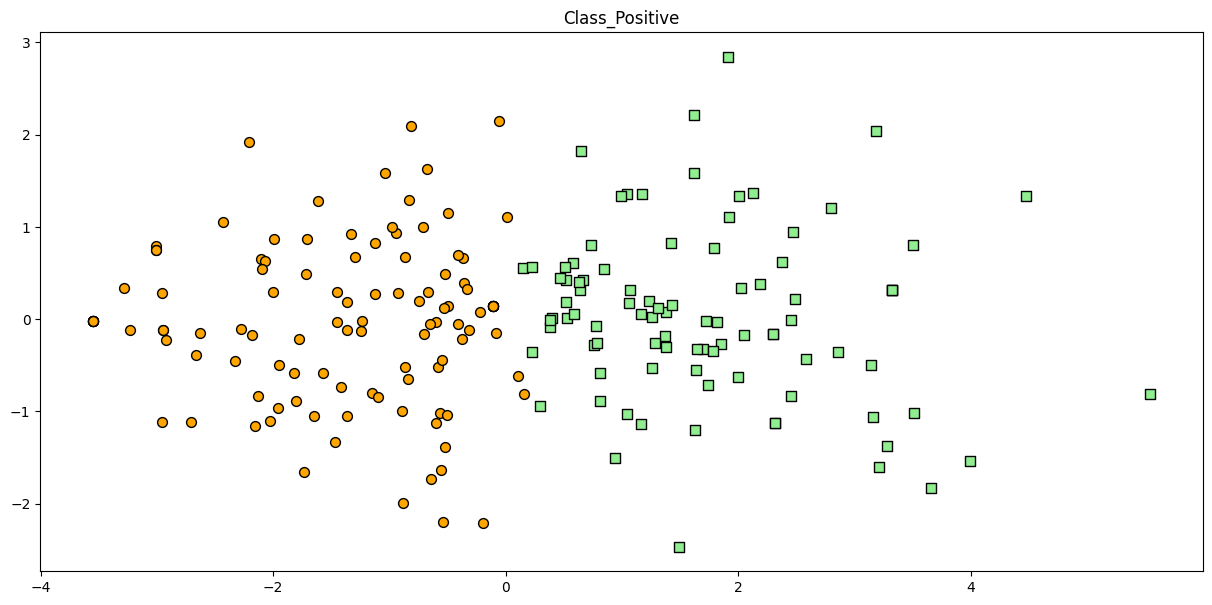

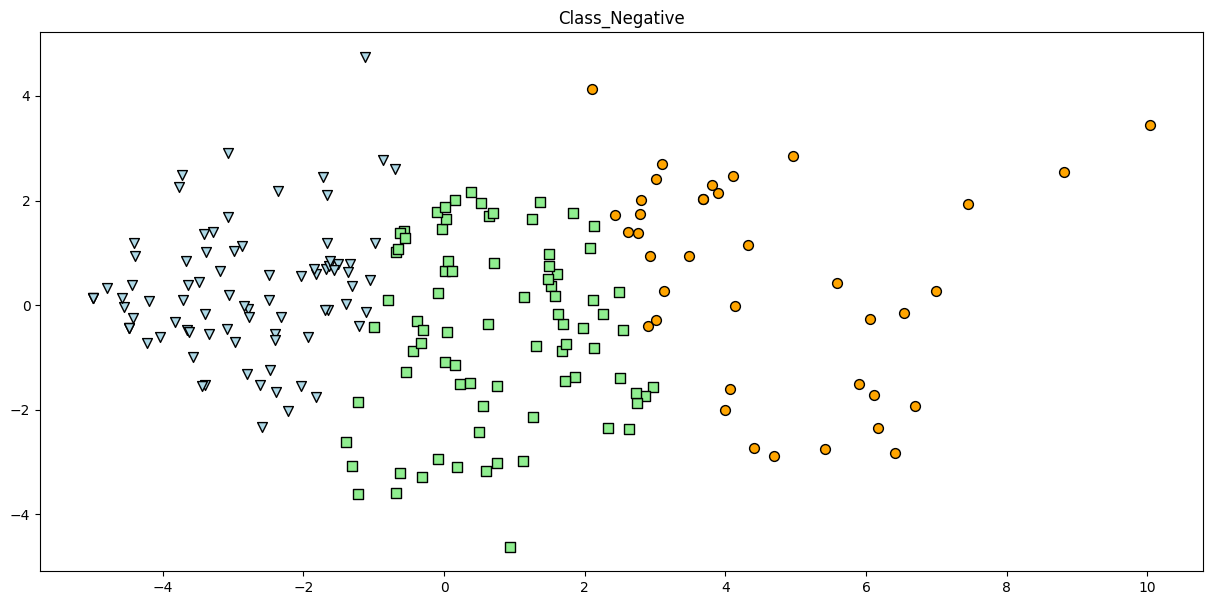

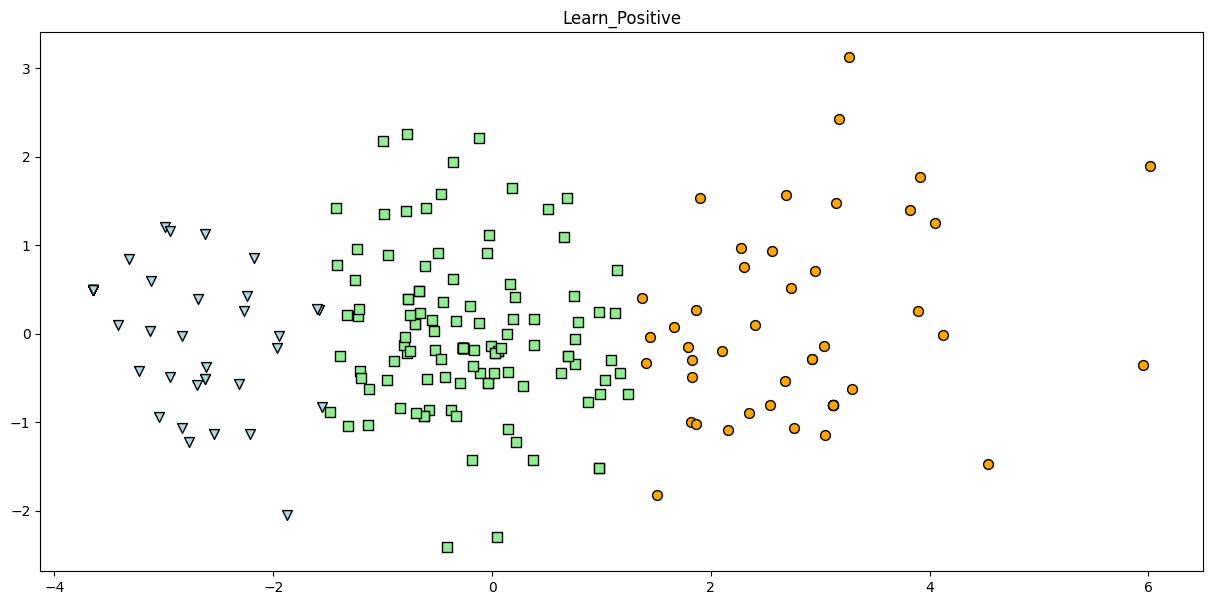

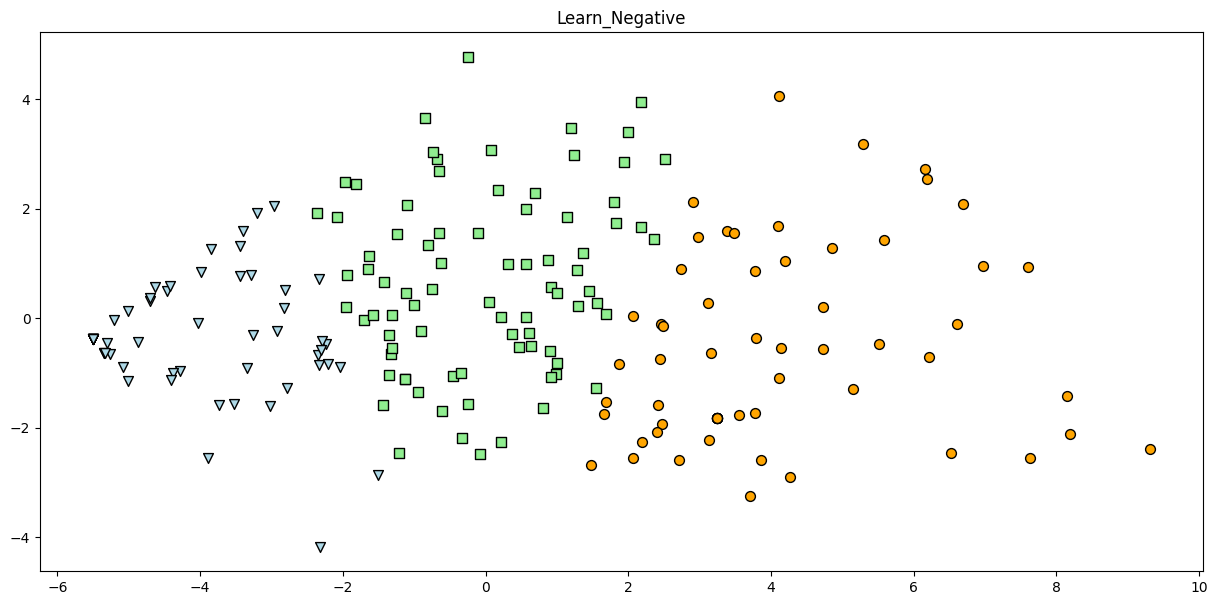

In [ ]:
# Visualisasi AEQ - KMeans
get_clustering_vis(label_aeq_kmeans,X_aeq_clus,model_aeq_kmeans)

Pada Visualisasi diatas merupakan gambaran visualisasi hasil pengelompokan cluster menggunakan KMeans terhadap faktor afektif yang terdapat dalam AEQ. Didapatkan bahwa pengelompokkan dilakukan cukup baik dengan pengelompokan yang relatif sudah baik terpisah dari satu dan kelompok yang lainnya. Penjabarannya adalah sebagai berikut.
1. Class Positive terbentuk dua kelompok yang bernilai High dan Moderate
2. Class Negative terbentuk tiga kelompok yang bernilai High, Low dan Moderate (dari kiri ke kanan)
3. Learn Positive terbentuk tiga kelompok yang bernilai High, Low dan Moderate
4. Learn Negative terbentuk tiga kelompok yang bernilai High, Low dan Moderate

#### Gaussian Mixture

In [ ]:
model_gaussian_aeq_cp,label_gaussian_aeq_cp = gaussian_aeq(X_aeq_clus['Class_Positive'],y_aeq_clus['Class_Positive'],2,'Class_Positive')
model_gaussian_aeq_cn,label_gaussian_aeq_cn = gaussian_aeq(X_aeq_clus['Class_Negative'],y_aeq_clus['Class_Negative'],3,'Class_Negative')
model_gaussian_aeq_tp,label_gaussian_aeq_tp = gaussian_aeq(X_aeq_clus['Learn_Positive'],y_aeq_clus['Learn_Positive'],3,'Learn_Positive')
model_gaussian_aeq_tn,label_gaussian_aeq_tn = gaussian_aeq(X_aeq_clus['Learn_Negative'],y_aeq_clus['Learn_Negative'],3,'Learn_Negative')

Class_Positive
Actual Value : (array(['High', 'Moderate'], dtype=object), array([136,  66]))
Predicted Value : (array([0, 1]), array([ 88, 114]))
Actual Silhouette : 0.4409670597750534
Predicted Silhouette : 0.4490361717558676

Class_Negative
Actual Value : (array(['High', 'Low', 'Moderate'], dtype=object), array([  3, 132,  67]))
Predicted Value : (array([0, 1, 2]), array([109,  79,  14]))
Actual Silhouette : 0.42026650228878704
Predicted Silhouette : 0.3701225604061743

Learn_Positive
Actual Value : (array(['High', 'Low', 'Moderate'], dtype=object), array([143,   2,  57]))
Predicted Value : (array([0, 1, 2]), array([120,  49,  33]))
Actual Silhouette : 0.4491064571009299
Predicted Silhouette : 0.4598854203237844

Learn_Negative
Actual Value : (array(['High', 'Low', 'Moderate'], dtype=object), array([  6, 114,  82]))
Predicted Value : (array([0, 1, 2]), array([ 69,  25, 108]))
Actual Silhouette : 0.3976443831619284
Predicted Silhouette : 0.3057433931247452



Pada hasil perhitungan silhouette score diatas, didapatkan bahwa untuk hasil penggunaan Gaussian Mixture pada setiap faktor afektif dalam AEQ diperoleh nilai yang cukup baik dimana menandakan bahwa setiap cluster terpisah dengan relatif baik. Pada Class Positive dan Learn Positive, nilai silhouette scorenya mendekati nilai asli nya. Kemudian untuk hasil Class Negative dan Learn Negative, nilai silhouette scorenya mendekati nilai aslinya walaupun agak lebih rendah, namun masih terpisah dengan cukup baik setiap clusternya.

In [ ]:
#Memasukan label ke dalam dict
label_aeq_gaussian = {}
label_aeq_gaussian.update({'Class_Positive':label_gaussian_aeq_cp})
label_aeq_gaussian.update({'Class_Negative':label_gaussian_aeq_cn})
label_aeq_gaussian.update({'Learn_Positive':label_gaussian_aeq_tp})
label_aeq_gaussian.update({'Learn_Negative':label_gaussian_aeq_tn})

#Memasukan model ke dalam dict
model_aeq_gaussian = {}
model_aeq_gaussian.update({'Class_Positive':model_gaussian_aeq_cp})
model_aeq_gaussian.update({'Class_Negative':model_gaussian_aeq_cn})
model_aeq_gaussian.update({'Learn_Positive':model_gaussian_aeq_tp})
model_aeq_gaussian.update({'Learn_Negative':model_gaussian_aeq_tn})

In [ ]:
cat_label_aeq_gaussian = {}
cat_label_aeq_gaussian = label_aeq_gaussian.copy()

#Class_Positive
cat_label_aeq_gaussian['Class_Positive'] = cat_label_aeq_gaussian['Class_Positive'].astype("str")
cat_label_aeq_gaussian['Class_Positive'][cat_label_aeq_gaussian['Class_Positive'] == "0"] = "Moderate"
cat_label_aeq_gaussian['Class_Positive'][cat_label_aeq_gaussian['Class_Positive'] == "1"] = "High"

#Class_Negative
cat_label_aeq_gaussian['Class_Negative'] = cat_label_aeq_gaussian['Class_Negative'].astype("str")
cat_label_aeq_gaussian['Class_Negative'][cat_label_aeq_gaussian['Class_Negative'] == "0"] = "Moderate"
cat_label_aeq_gaussian['Class_Negative'][cat_label_aeq_gaussian['Class_Negative'] == "1"] = "Low"
cat_label_aeq_gaussian['Class_Negative'][cat_label_aeq_gaussian['Class_Negative'] == "2"] = "High"

#Learn_Positive
cat_label_aeq_gaussian['Learn_Positive'] = cat_label_aeq_gaussian['Learn_Positive'].astype("str")
cat_label_aeq_gaussian['Learn_Positive'][cat_label_aeq_gaussian['Learn_Positive'] == "0"] = "High"
cat_label_aeq_gaussian['Learn_Positive'][cat_label_aeq_gaussian['Learn_Positive'] == "1"] = "Moderate"
cat_label_aeq_gaussian['Learn_Positive'][cat_label_aeq_gaussian['Learn_Positive'] == "2"] = "Low"

#Learn_Negative
cat_label_aeq_gaussian['Learn_Negative'] = cat_label_aeq_gaussian['Learn_Negative'].astype("str")
cat_label_aeq_gaussian['Learn_Negative'][cat_label_aeq_gaussian['Learn_Negative'] == "0"] = "Moderate"
cat_label_aeq_gaussian['Learn_Negative'][cat_label_aeq_gaussian['Learn_Negative'] == "1"] = "High"
cat_label_aeq_gaussian['Learn_Negative'][cat_label_aeq_gaussian['Learn_Negative'] == "2"] = "Low"

for emotion in label_aeq_gaussian.keys():
    print('Emotion =',emotion)
    print("Jumlah Data =", y_aeq_clus[emotion].shape[0])
    print("Jumlah Clustering Benar =", sum(y_aeq_clus[emotion] == cat_label_aeq_gaussian[emotion]))
    print("Accuracy =", (sum(y_aeq_clus[emotion] == cat_label_aeq_gaussian[emotion]) / y_aeq_clus[emotion].shape[0] * 100))
    aeq_clus.loc[emotion, 'Gaussian Mixture'] = sum(y_aeq_clus[emotion] == cat_label_aeq_gaussian[emotion]) / y_aeq_clus[emotion].shape[0] * 100
    print()

Emotion = Class_Positive
Jumlah Data = 202
Jumlah Clustering Benar = 180
Accuracy = 89.10891089108911

Emotion = Class_Negative
Jumlah Data = 202
Jumlah Clustering Benar = 138
Accuracy = 68.31683168316832

Emotion = Learn_Positive
Jumlah Data = 202
Jumlah Clustering Benar = 157
Accuracy = 77.72277227722772

Emotion = Learn_Negative
Jumlah Data = 202
Jumlah Clustering Benar = 150
Accuracy = 74.25742574257426



Pada hasil perhitungan akurasi diatas, didapatkan bahwa untuk hasil penggunaan Gaussian Mixture pada setiap faktor afektif dalam AEQ diperoleh nilai yang sangat baik jika diukur dengan clustering pada umumnya yang biasanya berpotensi memiliki tingkat akurasi yang relatif rendah . Hal ini menandakan bahwa setiap cluster dapat diidentifikasi kebenarannya dengan baik, namun perlu diingat juga bahwa metode clustering tidak terlalu berfokus ke dalam akurasi data, melainkan melihat pola yang terdapat dalam data tersebut. Keempat faktor afektif memiliki hasil yang bagus dengan nilainya diatas 70%, kecuali pada Class Negative yang nilainya 68%.

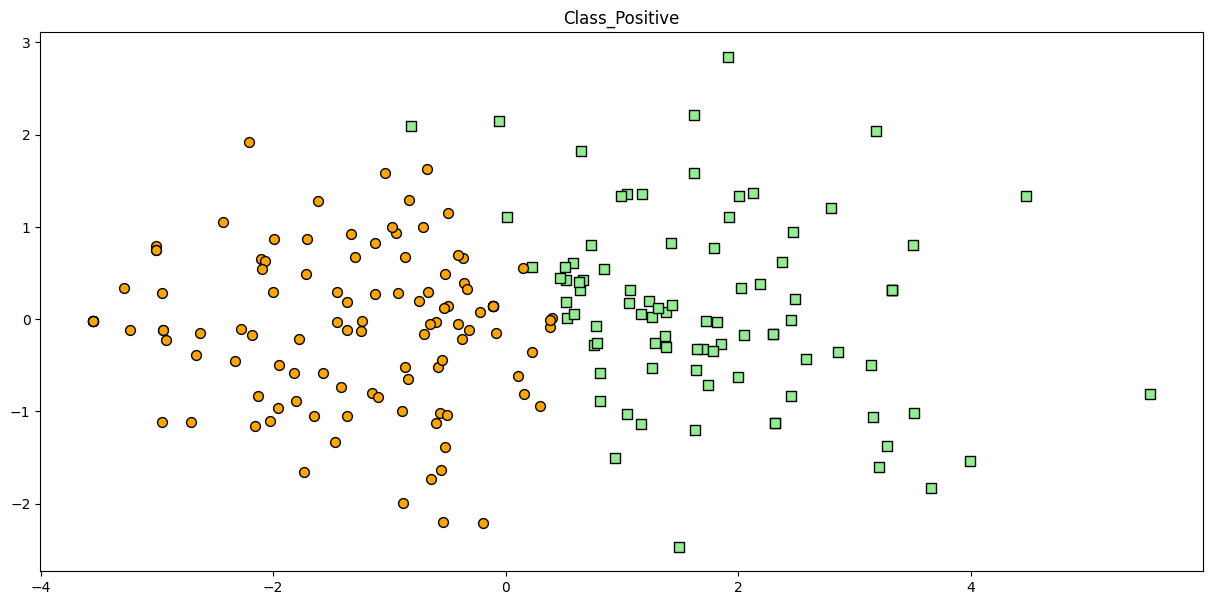

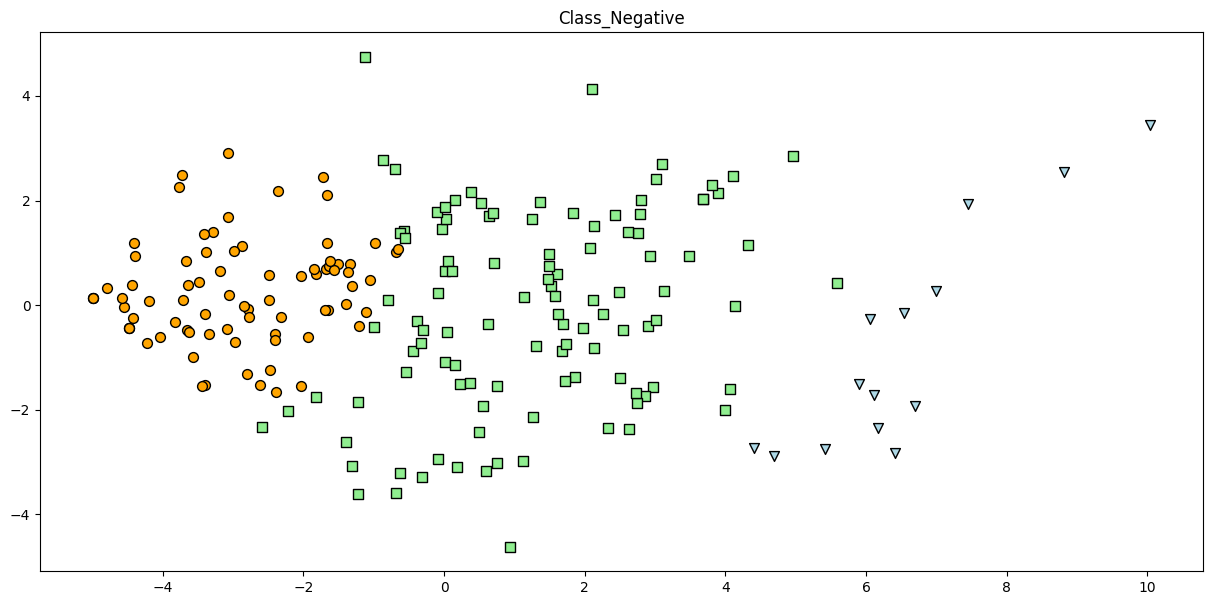

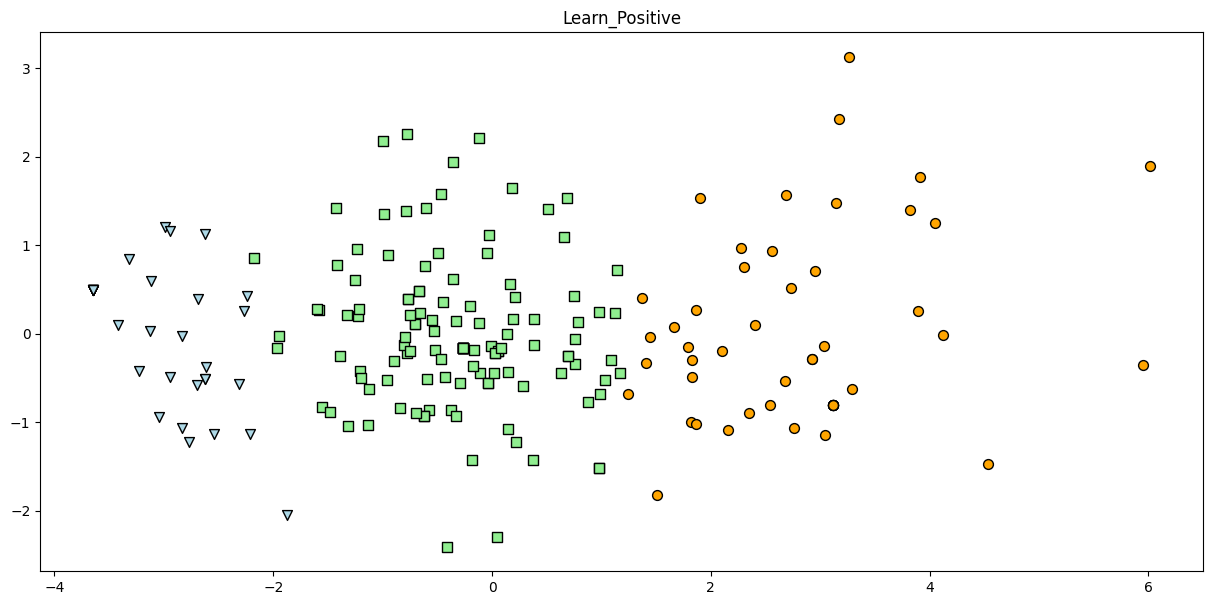

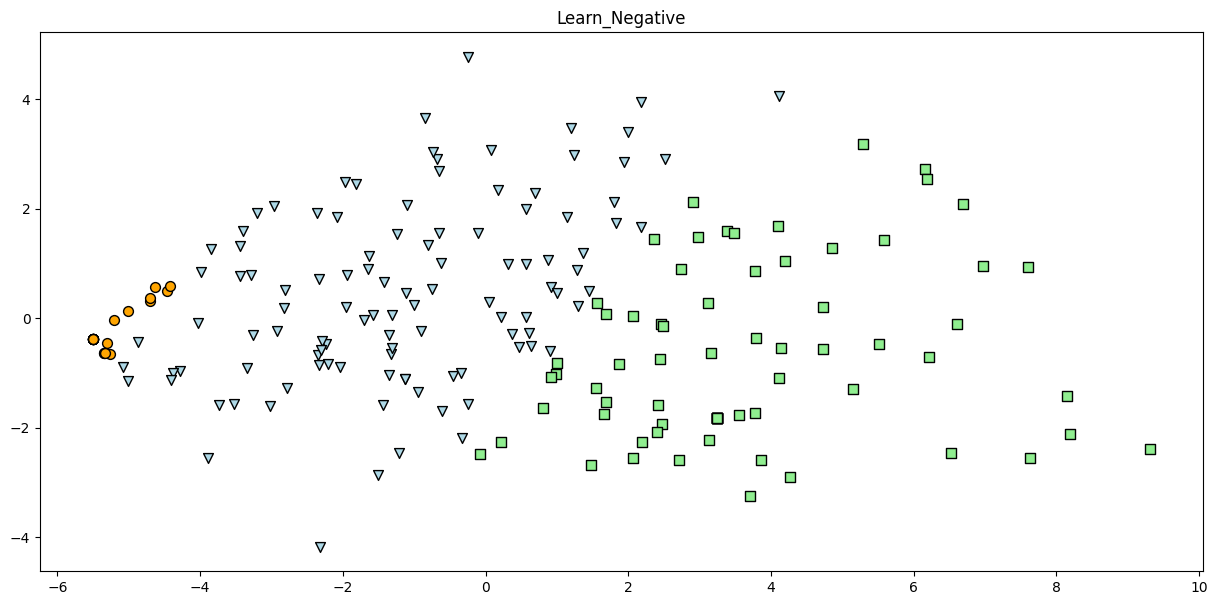

In [ ]:
# Visualisasi AEQ - Gaussian
get_clustering_vis(label_aeq_gaussian,X_aeq_clus,model_aeq_gaussian)

Pada Visualisasi diatas merupakan gambaran visualisasi hasil pengelompokan cluster menggunakan Gaussian Mixture terhadap faktor afektif yang terdapat dalam AEQ. Didapatkan bahwa pengelompokkan dilakukan cukup baik dengan pengelompokan yang relatif sudah baik terpisah dari satu dan kelompok yang lainnya. Penjabarannya adalah sebagai berikut.
1. Class Positive terbentuk dua kelompok yang bernilai High dan Moderate
2. Class Negative terbentuk tiga kelompok yang bernilai High, Low dan Moderate (dari kiri ke kanan)
3. Learn Positive terbentuk tiga kelompok yang bernilai High, Low dan Moderate
4. Learn Negative terbentuk tiga kelompok yang bernilai High, Low dan Moderate

#### Fuzzy C Means

In [ ]:
model_fuzzy_aeq_cp,label_fuzzy_aeq_cp = fuzzy_aeq(X_aeq_clus['Class_Positive'],y_aeq_clus['Class_Positive'],2,'Class_Positive')
model_fuzzy_aeq_cn,label_fuzzy_aeq_cn = fuzzy_aeq(X_aeq_clus['Class_Negative'],y_aeq_clus['Class_Negative'],3,'Class_Negative')
model_fuzzy_aeq_tp,label_fuzzy_aeq_tp = fuzzy_aeq(X_aeq_clus['Learn_Positive'],y_aeq_clus['Learn_Positive'],3,'Learn_Positive')
model_fuzzy_aeq_tn,label_fuzzy_aeq_tn = fuzzy_aeq(X_aeq_clus['Learn_Negative'],y_aeq_clus['Learn_Negative'],3,'Learn_Negative')

Class_Positive
Actual Value : (array(['High', 'Moderate'], dtype=object), array([136,  66]))
Predicted Value : (array([0, 1]), array([109,  93]))
Actual Silhouette : 0.4409670597750534
Predicted Silhouette : 0.4583089251426662

Class_Negative
Actual Value : (array(['High', 'Low', 'Moderate'], dtype=object), array([  3, 132,  67]))
Predicted Value : (array([0, 1, 2]), array([77, 45, 80]))
Actual Silhouette : 0.42026650228878704
Predicted Silhouette : 0.34230303661944794

Learn_Positive
Actual Value : (array(['High', 'Low', 'Moderate'], dtype=object), array([143,   2,  57]))
Predicted Value : (array([0, 1, 2]), array([113,  48,  41]))
Actual Silhouette : 0.4491064571009299
Predicted Silhouette : 0.45308369466057785

Learn_Negative
Actual Value : (array(['High', 'Low', 'Moderate'], dtype=object), array([  6, 114,  82]))
Predicted Value : (array([0, 1, 2]), array([62, 56, 84]))
Actual Silhouette : 0.3976443831619284
Predicted Silhouette : 0.38680742523272044



Pada hasil perhitungan silhouette score diatas, didapatkan bahwa untuk hasil penggunaan Fuzzy CMeans pada setiap faktor afektif dalam AEQ diperoleh nilai yang cukup baik dimana menandakan bahwa setiap cluster terpisah dengan relatif baik. Pada Class Positive dan Learn Positive, nilai silhouette scorenya melebihi daripada nilai asli nya. Kemudian untuk hasil Class Negative dan Learn Negative, nilai silhouette scorenya mendekati nilai aslinya.

In [ ]:
#Memasukan label ke dalam dict
label_aeq_fuzzy = {}
label_aeq_fuzzy.update({'Class_Positive':label_fuzzy_aeq_cp})
label_aeq_fuzzy.update({'Class_Negative':label_fuzzy_aeq_cn})
label_aeq_fuzzy.update({'Learn_Positive':label_fuzzy_aeq_tp})
label_aeq_fuzzy.update({'Learn_Negative':label_fuzzy_aeq_tn})

#Memasukan model ke dalam dict
model_aeq_fuzzy = {}
model_aeq_fuzzy.update({'Class_Positive':model_fuzzy_aeq_cp})
model_aeq_fuzzy.update({'Class_Negative':model_fuzzy_aeq_cn})
model_aeq_fuzzy.update({'Learn_Positive':model_fuzzy_aeq_tp})
model_aeq_fuzzy.update({'Learn_Negative':model_fuzzy_aeq_tn})

In [ ]:
cat_label_aeq_fuzzy = {}
cat_label_aeq_fuzzy = label_aeq_fuzzy.copy()

#Class_Positive
cat_label_aeq_fuzzy['Class_Positive'] = cat_label_aeq_fuzzy['Class_Positive'].astype("str")
cat_label_aeq_fuzzy['Class_Positive'][cat_label_aeq_fuzzy['Class_Positive'] == "0"] = "High"
cat_label_aeq_fuzzy['Class_Positive'][cat_label_aeq_fuzzy['Class_Positive'] == "1"] = "Moderate"

#Class_Negative
cat_label_aeq_fuzzy['Class_Negative'] = cat_label_aeq_fuzzy['Class_Negative'].astype("str")
cat_label_aeq_fuzzy['Class_Negative'][cat_label_aeq_fuzzy['Class_Negative'] == "0"] = "High"
cat_label_aeq_fuzzy['Class_Negative'][cat_label_aeq_fuzzy['Class_Negative'] == "1"] = "Moderate"
cat_label_aeq_fuzzy['Class_Negative'][cat_label_aeq_fuzzy['Class_Negative'] == "2"] = "Low"

#Learn_Positive
cat_label_aeq_fuzzy['Learn_Positive'] = cat_label_aeq_fuzzy['Learn_Positive'].astype("str")
cat_label_aeq_fuzzy['Learn_Positive'][cat_label_aeq_fuzzy['Learn_Positive'] == "0"] = "High"
cat_label_aeq_fuzzy['Learn_Positive'][cat_label_aeq_fuzzy['Learn_Positive'] == "1"] = "Moderate"
cat_label_aeq_fuzzy['Learn_Positive'][cat_label_aeq_fuzzy['Learn_Positive'] == "2"] = "Low"

#Learn_Negative
cat_label_aeq_fuzzy['Learn_Negative'] = cat_label_aeq_fuzzy['Learn_Negative'].astype("str")
cat_label_aeq_fuzzy['Learn_Negative'][cat_label_aeq_fuzzy['Learn_Negative'] == "0"] = "Low"
cat_label_aeq_fuzzy['Learn_Negative'][cat_label_aeq_fuzzy['Learn_Negative'] == "1"] = "Moderate"
cat_label_aeq_fuzzy['Learn_Negative'][cat_label_aeq_fuzzy['Learn_Negative'] == "2"] = "High"

for emotion in label_aeq_fuzzy.keys():
    print('Emotion =',emotion)
    print("Jumlah Data =", y_aeq_clus[emotion].shape[0])
    print("Jumlah Clustering Benar =", sum(y_aeq_clus[emotion] == cat_label_aeq_fuzzy[emotion]))
    print("Accuracy =", (sum(y_aeq_clus[emotion] == cat_label_aeq_fuzzy[emotion]) / y_aeq_clus[emotion].shape[0] * 100))
    aeq_clus.loc[emotion, 'Fuzzy CMeans'] = sum(y_aeq_clus[emotion] == cat_label_aeq_fuzzy[emotion]) / y_aeq_clus[emotion].shape[0] * 100
    print()

Emotion = Class_Positive
Jumlah Data = 202
Jumlah Clustering Benar = 175
Accuracy = 86.63366336633663

Emotion = Class_Negative
Jumlah Data = 202
Jumlah Clustering Benar = 122
Accuracy = 60.396039603960396

Emotion = Learn_Positive
Jumlah Data = 202
Jumlah Clustering Benar = 148
Accuracy = 73.26732673267327

Emotion = Learn_Negative
Jumlah Data = 202
Jumlah Clustering Benar = 112
Accuracy = 55.44554455445545



Pada hasil perhitungan akurasi diatas, didapatkan bahwa untuk hasil penggunaan Fuzzy CMeans pada setiap faktor afektif dalam AEQ diperoleh nilai yang cukup baik dimana menandakan bahwa setiap cluster dapat diidentifikasi kebenarannya dengan cukup baik, perlu diingat juga bahwa metode clustering tidak terlalu berfokus ke dalam akurasi data, melainkan melihat pola yang terdapat dalam data tersebut. Pada Class Positive dan Learn Positive, nilai akurasinya melebihi 70%, terutama pada Class Positive yang nilainya hampir mencapai 90% akurasi. Kemudian untuk hasil Class Negative dan Learn Negative, nilai akurasinya melebihi 50%.

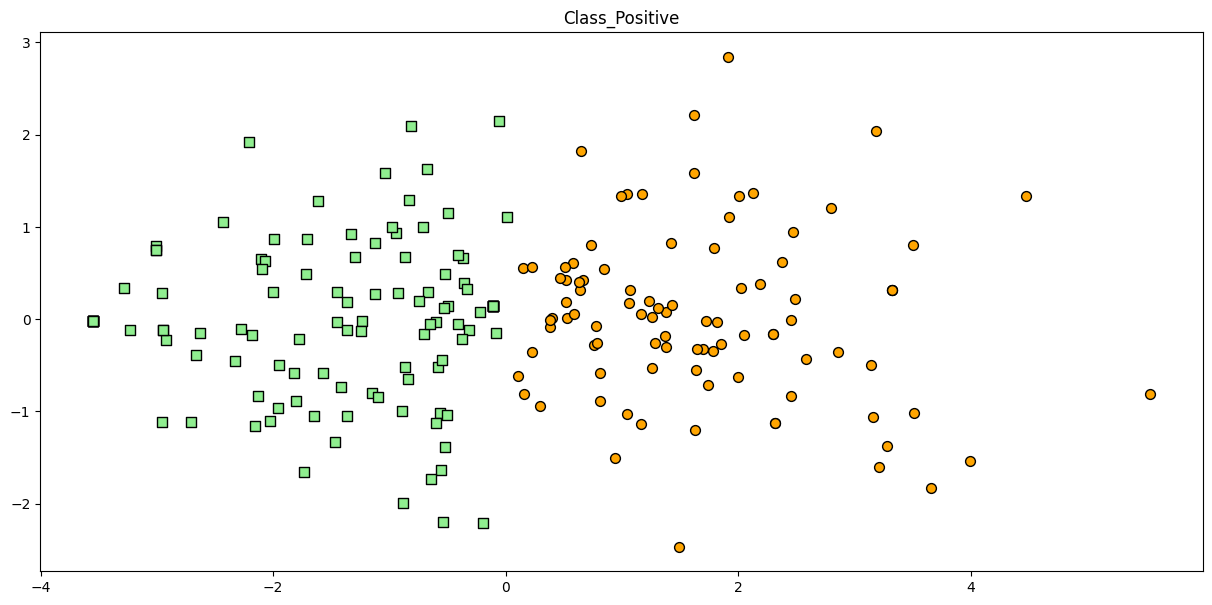

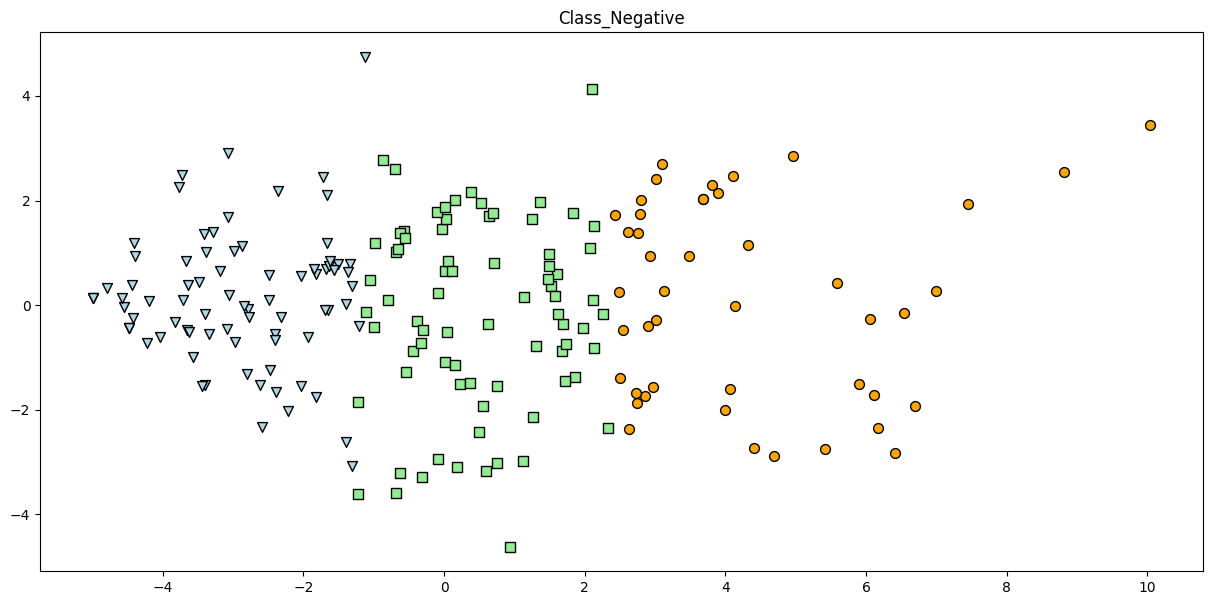

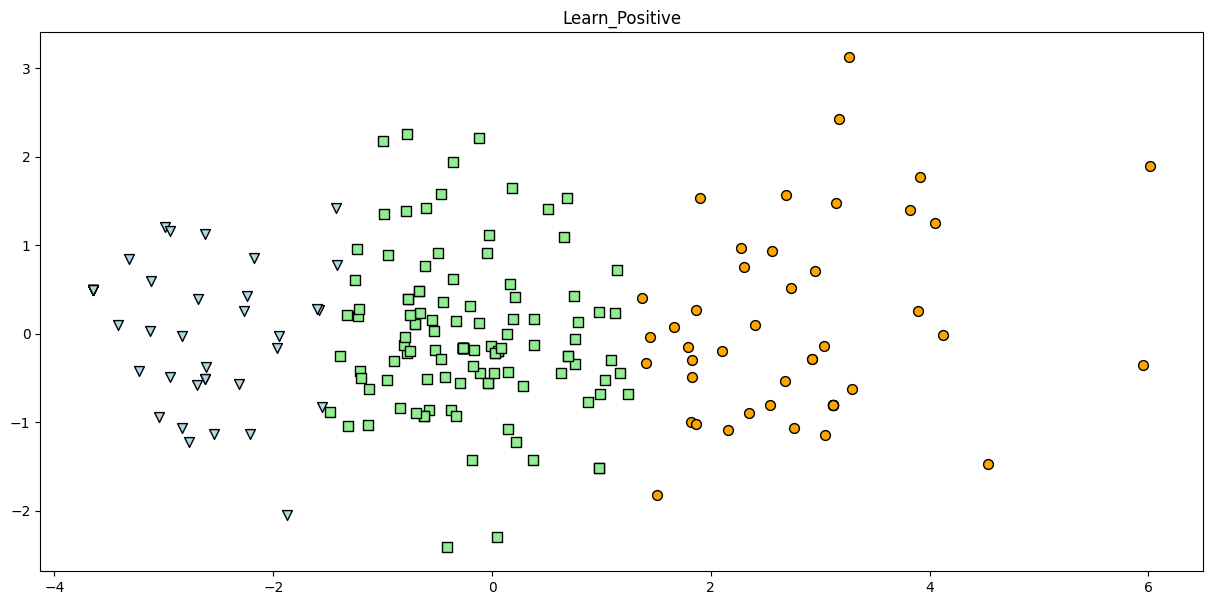

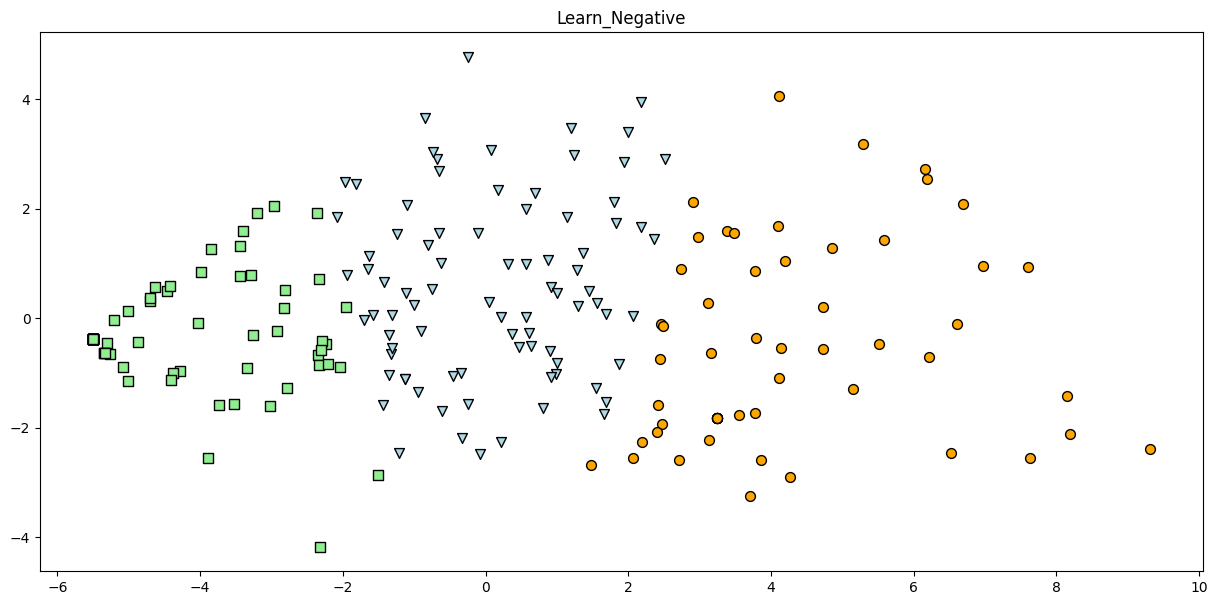

In [ ]:
# Visualisasi AEQ - Fuzzy
get_clustering_vis(label_aeq_fuzzy,X_aeq_clus,model_aeq_fuzzy)

Pada Visualisasi diatas merupakan gambaran visualisasi hasil pengelompokan cluster menggunakan Fuzzy CMeans terhadap faktor afektif yang terdapat dalam AEQ. Didapatkan bahwa pengelompokkan dilakukan cukup baik dengan pengelompokan yang relatif sudah baik terpisah dari satu dan kelompok yang lainnya. Penjabarannya adalah sebagai berikut.
1. Class Positive terbentuk dua kelompok yang bernilai High dan Moderate
2. Class Negative terbentuk tiga kelompok yang bernilai High, Low dan Moderate
3. Learn Positive terbentuk tiga kelompok yang bernilai Moderate, High, Low
4. Learn Negative terbentuk tiga kelompok yang bernilai High, Low dan Moderate

### 3.2.2. Clustering DASS

In [ ]:
array_dass = df_dass_new.values
X_dass_clus = {}
X_dass_clus['Depression'] = array_dass[:,[4,6,11,14,17,18,22]]
X_dass_clus['Anxiety'] = array_dass[:,[3,5,8,10,16,20,21]]
X_dass_clus['Stress'] = array_dass[:,[2,7,9,12,13,15,19]]

y_dass_clus = {}
y_dass_clus['Depression'] = array_dass[:,23]
y_dass_clus['Anxiety'] = array_dass[:,24]
y_dass_clus['Stress'] = array_dass[:,25]

# PCA tranform
for emotion in y_dass_clus.keys():
    pca = PCA(2)
    X_dass_clus[emotion] = pca.fit_transform(X_dass_clus[emotion])

# Menyimpan hasil akurasi
dass_clus = pd.DataFrame(index=y_dass_clus.keys(), columns=['KMeans', "Gaussian Mixture","Fuzzy CMeans"])

# Menyimpan hasil silhouette 
dass_sil = pd.DataFrame(index=y_dass_clus.keys(), columns=['KMeans', "Gaussian Mixture","Fuzzy CMeans"])

#### Fungsi ML Clustering

In [ ]:
#Fungsi KMeans
def kmeans_dass(x_clus,y_clus,cluster,name):
    model_kmeans = KMeans(n_clusters=cluster,random_state=1)
    label_kmeans = model_kmeans.fit_predict(x_clus)

    print(name)
    print('Actual Value',np.unique(y_clus,return_counts=True))
    print('Predicted Value',np.unique(label_kmeans,return_counts=True))

    print("Actual silhouette", silhouette_score(x_clus,y_clus))
    print("Predicted silhouette", silhouette_score(x_clus, label_kmeans))
    dass_sil.loc[name,'KMeans'] = silhouette_score(x_clus, label_kmeans)
    print()

    return model_kmeans,label_kmeans

#Fungsi gaussian mixture
def gaussian_dass(x_clus,y_clus,cluster,name):
    model_gaussian = GaussianMixture(n_components=cluster,random_state=1)
    model_gaussian.fit(x_clus)
    label_gaussian = model_gaussian.predict(x_clus)

    print(name)
    print('Actual Value :',np.unique(y_clus,return_counts=True))
    print('Predicted Value :',np.unique(label_gaussian,return_counts=True))

    print('Actual Silhouette :',silhouette_score(x_clus,y_clus))
    print('Predicted Silhouette :',silhouette_score(x_clus,label_gaussian))
    dass_sil.loc[name,"Gaussian Mixture"] = silhouette_score(x_clus,label_gaussian)
    print()

    return model_gaussian,label_gaussian

def fuzzy_dass(x_clus,y_clus,cluster,name):
    model_fuzzy = FCM(n_clusters=cluster,random_state=1)
    model_fuzzy.fit(x_clus)
    label_fuzzy = model_fuzzy.predict(x_clus)

    print(name)
    print('Actual Value :',np.unique(y_clus,return_counts=True))
    print('Predicted Value :',np.unique(label_fuzzy,return_counts=True))

    print('Actual Silhouette :',silhouette_score(x_clus,y_clus))
    print('Predicted Silhouette :',silhouette_score(x_clus,label_fuzzy))
    dass_sil.loc[name,"Fuzzy CMeans"] = silhouette_score(x_clus,label_fuzzy)
    print()

    return model_fuzzy,label_fuzzy

#### KMeans

In [ ]:
model_kmeans_dass_d,label_kmeans_dass_d = kmeans_dass(X_dass_clus['Depression'],y_dass_clus['Depression'],3,'Depression')
model_kmeans_dass_a,label_kmeans_dass_a = kmeans_dass(X_dass_clus['Anxiety'],y_dass_clus['Anxiety'],4,'Anxiety')
model_kmeans_dass_s,label_kmeans_dass_s = kmeans_dass(X_dass_clus['Stress'],y_dass_clus['Stress'],3,'Stress')

Depression
Actual Value (array(['Mild', 'Moderate', 'Normal', 'Severe'], dtype=object), array([ 33,  20, 148,   1]))
Predicted Value (array([0, 1, 2], dtype=int32), array([56, 49, 97]))
Actual silhouette 0.3445498038077793
Predicted silhouette 0.385280579118139

Anxiety
Actual Value (array(['Mild', 'Moderate', 'Normal', 'Severe'], dtype=object), array([36, 54, 96, 16]))
Predicted Value (array([0, 1, 2, 3], dtype=int32), array([47, 69, 39, 47]))
Actual silhouette 0.20735661589855056
Predicted silhouette 0.3520499381048393

Stress
Actual Value (array(['Mild', 'Moderate', 'Normal'], dtype=object), array([ 19,   3, 180]))
Predicted Value (array([0, 1, 2], dtype=int32), array([93, 55, 54]))
Actual silhouette 0.3501319985004621
Predicted silhouette 0.3674305691937514



Pada hasil perhitungan silhouette score diatas, didapatkan bahwa untuk hasil penggunaan Kmeans pada setiap faktor afektif dalam DASS diperoleh nilai yang cukup baik dimana menandakan bahwa setiap cluster terpisah dengan relatif baik. Dapat dilihat untuk setiap skor Depression, Anxiety dan Stress nilainya yang melebihi nilai aslinya, maka hal ini menandakanbahwa persebaran datanya sudah lebih baik dari yang aslinya

In [ ]:
#Memasukan label ke dalam dict
label_dass_kmeans = {}
label_dass_kmeans.update({'Depression':label_kmeans_dass_d})
label_dass_kmeans.update({'Anxiety':label_kmeans_dass_a})
label_dass_kmeans.update({'Stress':label_kmeans_dass_s})

#Memasukan model ke dalam dict
model_dass_kmeans = {}
model_dass_kmeans.update({'Depression':model_kmeans_dass_d})
model_dass_kmeans.update({'Anxiety':model_kmeans_dass_a})
model_dass_kmeans.update({'Stress':model_kmeans_dass_s})

In [ ]:
cat_label_dass_kmeans = {}
cat_label_dass_kmeans = label_dass_kmeans.copy()

#Depression - Mild,Normal,Moderate
cat_label_dass_kmeans['Depression'] = cat_label_dass_kmeans['Depression'].astype("str")
cat_label_dass_kmeans['Depression'][cat_label_dass_kmeans['Depression'] == "0"] = "Mild"
cat_label_dass_kmeans['Depression'][cat_label_dass_kmeans['Depression'] == "1"] = "Moderate"
cat_label_dass_kmeans['Depression'][cat_label_dass_kmeans['Depression'] == "2"] = "Normal"

#Anxiety - Mild, Normal, Moderate
cat_label_dass_kmeans['Anxiety'] = cat_label_dass_kmeans['Anxiety'].astype("str")
cat_label_dass_kmeans['Anxiety'][cat_label_dass_kmeans['Anxiety'] == "0"] = "Moderate"
cat_label_dass_kmeans['Anxiety'][cat_label_dass_kmeans['Anxiety'] == "1"] = "Normal"
cat_label_dass_kmeans['Anxiety'][cat_label_dass_kmeans['Anxiety'] == "2"] = "Severe"
cat_label_dass_kmeans['Anxiety'][cat_label_dass_kmeans['Anxiety'] == "3"] = "Mild"

#Stress
cat_label_dass_kmeans['Stress'] = cat_label_dass_kmeans['Stress'].astype("str")
cat_label_dass_kmeans['Stress'][cat_label_dass_kmeans['Stress'] == "0"] = "Normal"
cat_label_dass_kmeans['Stress'][cat_label_dass_kmeans['Stress'] == "1"] = "Mild"
cat_label_dass_kmeans['Stress'][cat_label_dass_kmeans['Stress'] == "2"] = "Moderate"

for emotion in cat_label_dass_kmeans.keys():
    print('Emotion =',emotion)
    print("Jumlah Data =", y_dass_clus[emotion].shape[0])
    print("Jumlah Clustering Benar =", sum(y_dass_clus[emotion] == cat_label_dass_kmeans[emotion]))
    print("Accuracy =", (sum(y_dass_clus[emotion] == cat_label_dass_kmeans[emotion]) / y_dass_clus[emotion].shape[0] * 100))
    dass_clus.loc[emotion, 'KMeans'] = sum(y_dass_clus[emotion] == cat_label_dass_kmeans[emotion]) / y_dass_clus[emotion].shape[0] * 100
    print()

Emotion = Depression
Jumlah Data = 202
Jumlah Clustering Benar = 112
Accuracy = 55.44554455445545

Emotion = Anxiety
Jumlah Data = 202
Jumlah Clustering Benar = 112
Accuracy = 55.44554455445545

Emotion = Stress
Jumlah Data = 202
Jumlah Clustering Benar = 112
Accuracy = 55.44554455445545



Pada hasil perhitungan akurasi diatas, didapatkan bahwa untuk hasil penggunaan Kmeans pada setiap faktor afektif dalam DASS diperoleh nilai yang relatif rendah dimana menandakan bahwa setiap cluster mengidentifikasi kebenarannya dengan masih meraba-raba, perlu diingat juga bahwa metode clustering tidak terlalu berfokus ke dalam akurasi data, melainkan melihat pola yang terdapat dalam data tersebut. Ketiga Nilai pada faktor afektif DASS memiliki nilai yang sama pada 55%.

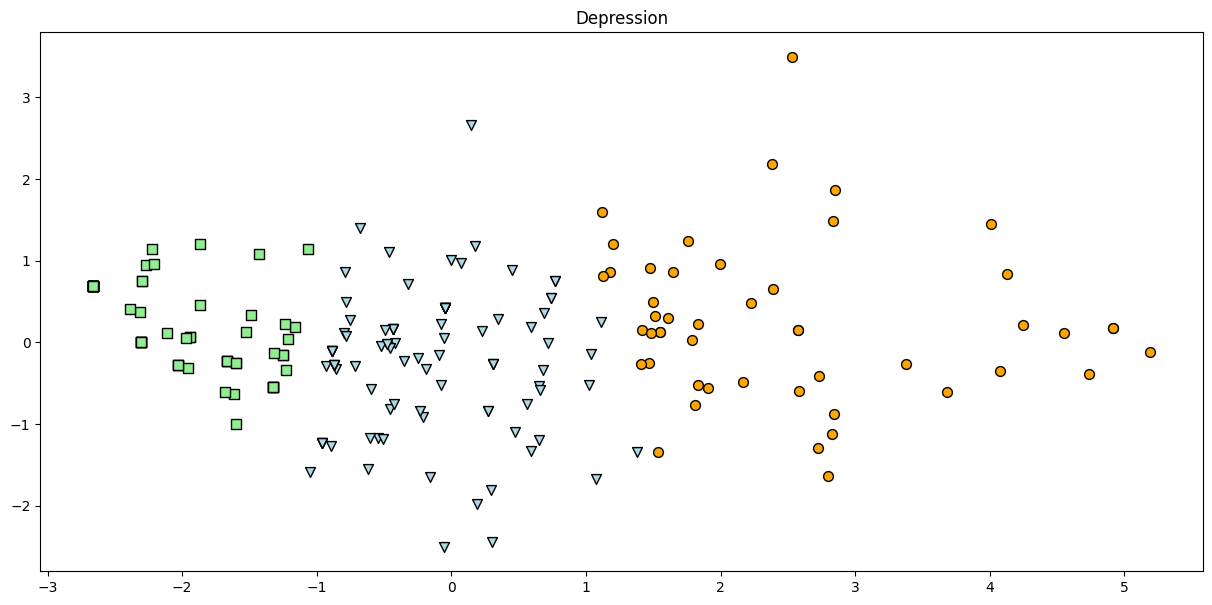

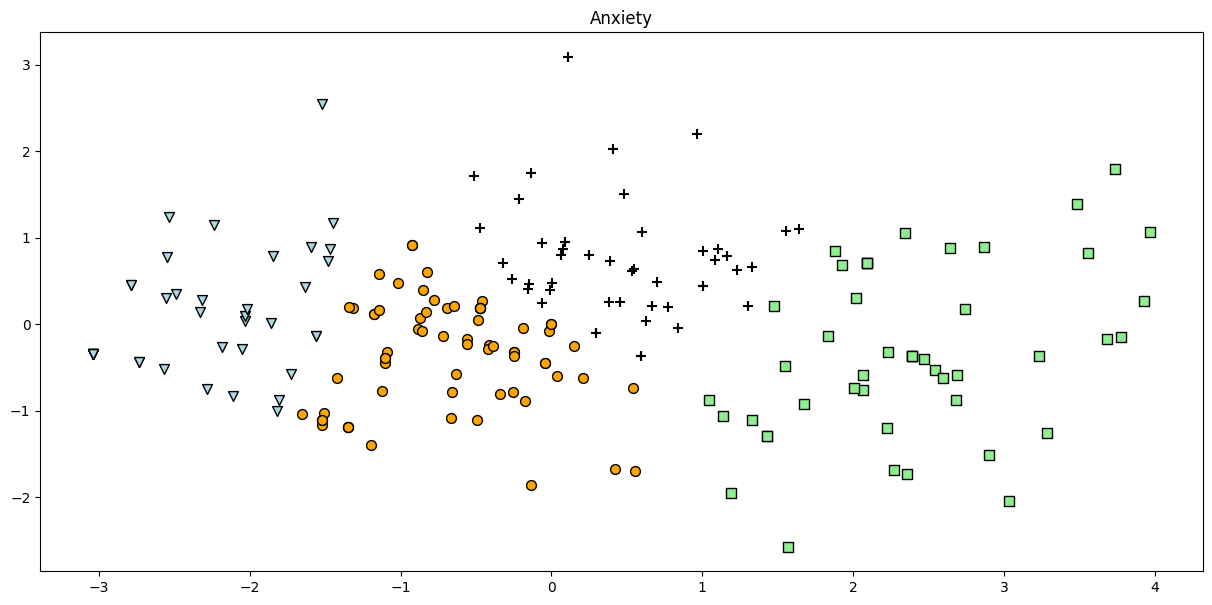

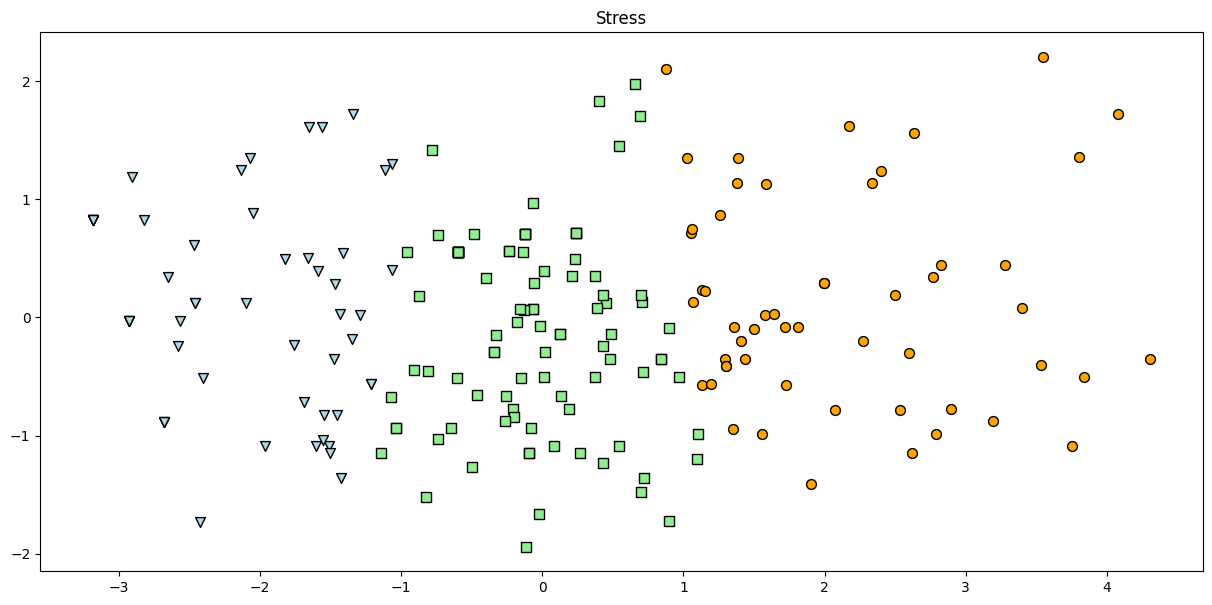

In [ ]:
# Visualisasi DASS - KMeans
get_clustering_vis(label_dass_kmeans,X_dass_clus,model_dass_kmeans)

Pada Visualisasi diatas merupakan gambaran visualisasi hasil pengelompokan cluster menggunakan KMeans terhadap faktor afektif yang terdapat dalam DASS. Didapatkan bahwa pengelompokkan dilakukan cukup baik dengan pengelompokan yang relatif sudah baik terpisah dari satu dan kelompok yang lainnya. Penjabarannya adalah sebagai berikut.
1. Depression terbentuk dua kelompok yang bernilai Mild, Normal, Moderate
2. Anxiety terbentuk tiga kelompok yang bernilai Severe, Nomral, Mild dan Moderate 
3. Stress terbentuk tiga kelompok yang bernilai Normal, Mild, Moderate

#### Gaussian Mixture

In [ ]:
model_gaussian_dass_d,label_gaussian_dass_d = gaussian_dass(X_dass_clus['Depression'],y_dass_clus['Depression'],3,'Depression')
model_gaussian_dass_a,label_gaussian_dass_a = gaussian_dass(X_dass_clus['Anxiety'],y_dass_clus['Anxiety'],4,'Anxiety')
model_gaussian_dass_s,label_gaussian_dass_s = gaussian_dass(X_dass_clus['Stress'],y_dass_clus['Stress'],3,'Stress')

Depression
Actual Value : (array(['Mild', 'Moderate', 'Normal', 'Severe'], dtype=object), array([ 33,  20, 148,   1]))
Predicted Value : (array([0, 1, 2]), array([ 61, 102,  39]))
Actual Silhouette : 0.3445498038077793
Predicted Silhouette : 0.37439353027450084

Anxiety
Actual Value : (array(['Mild', 'Moderate', 'Normal', 'Severe'], dtype=object), array([36, 54, 96, 16]))
Predicted Value : (array([0, 1, 2, 3]), array([40, 47, 43, 72]))
Actual Silhouette : 0.20735661589855056
Predicted Silhouette : 0.3444023912043697

Stress
Actual Value : (array(['Mild', 'Moderate', 'Normal'], dtype=object), array([ 19,   3, 180]))
Predicted Value : (array([0, 1, 2]), array([111,  55,  36]))
Actual Silhouette : 0.3501319985004621
Predicted Silhouette : 0.3746290846518251



Pada hasil perhitungan silhouette score diatas, didapatkan bahwa untuk hasil penggunaan Gaussian Mixture pada setiap faktor afektif dalam DASS diperoleh nilai yang cukup baik dimana menandakan bahwa setiap cluster terpisah dengan relatif baik. Dapat dilihat untuk setiap skor Depression, Anxiety dan Stress nilainya yang melebihi nilai aslinya, maka hal ini menandakanbahwa persebaran datanya sudah lebih baik dari yang aslinya

In [ ]:
#Memasukan label ke dalam dict
label_dass_gaussian = {}
label_dass_gaussian.update({'Depression':label_gaussian_dass_d})
label_dass_gaussian.update({'Anxiety':label_gaussian_dass_a})
label_dass_gaussian.update({'Stress':label_gaussian_dass_s})

#Memasukan model ke dalam dict
model_dass_gaussian = {}
model_dass_gaussian.update({'Depression':model_gaussian_dass_d})
model_dass_gaussian.update({'Anxiety':model_gaussian_dass_a})
model_dass_gaussian.update({'Stress':model_gaussian_dass_s})

In [ ]:
cat_label_dass_gaussian = {}
cat_label_dass_gaussian = label_dass_gaussian.copy()

#Depression
cat_label_dass_gaussian['Depression'] = cat_label_dass_gaussian['Depression'].astype("str")
cat_label_dass_gaussian['Depression'][cat_label_dass_gaussian['Depression'] == "0"] = "Mild"
cat_label_dass_gaussian['Depression'][cat_label_dass_gaussian['Depression'] == "1"] = "Moderate"
cat_label_dass_gaussian['Depression'][cat_label_dass_gaussian['Depression'] == "2"] = "Normal"

#Anxiety
cat_label_dass_gaussian['Anxiety'] = cat_label_dass_gaussian['Anxiety'].astype("str")
cat_label_dass_gaussian['Anxiety'][cat_label_dass_gaussian['Anxiety'] == "0"] = "Severe"
cat_label_dass_gaussian['Anxiety'][cat_label_dass_gaussian['Anxiety'] == "1"] = "Normal"
cat_label_dass_gaussian['Anxiety'][cat_label_dass_gaussian['Anxiety'] == "2"] = "Moderate"
cat_label_dass_gaussian['Anxiety'][cat_label_dass_gaussian['Anxiety'] == "3"] = "Mild"

#Stress
cat_label_dass_gaussian['Stress'] = cat_label_dass_gaussian['Stress'].astype("str")
cat_label_dass_gaussian['Stress'][cat_label_dass_gaussian['Stress'] == "0"] = "Normal"
cat_label_dass_gaussian['Stress'][cat_label_dass_gaussian['Stress'] == "1"] = "Mild"
cat_label_dass_gaussian['Stress'][cat_label_dass_gaussian['Stress'] == "2"] = "Moderate"

for emotion in label_dass_gaussian.keys():
    print('Emotion =',emotion)
    print("Jumlah Data =", y_dass_clus[emotion].shape[0])
    print("Jumlah Clustering Benar =", sum(y_dass_clus[emotion] == cat_label_dass_gaussian[emotion]))
    print("Accuracy =", (sum(y_dass_clus[emotion] == cat_label_dass_gaussian[emotion]) / y_dass_clus[emotion].shape[0] * 100))
    dass_clus.loc[emotion, 'Gaussian Mixture'] = sum(y_dass_clus[emotion] == cat_label_dass_gaussian[emotion]) / y_dass_clus[emotion].shape[0] * 100
    print()

Emotion = Depression
Jumlah Data = 202
Jumlah Clustering Benar = 72
Accuracy = 35.64356435643564

Emotion = Anxiety
Jumlah Data = 202
Jumlah Clustering Benar = 95
Accuracy = 47.02970297029702

Emotion = Stress
Jumlah Data = 202
Jumlah Clustering Benar = 114
Accuracy = 56.43564356435643



Pada hasil perhitungan akurasi diatas, didapatkan bahwa untuk hasil penggunaan Gaussian Mixture pada setiap faktor afektif dalam DASS diperoleh nilai yang rendah dimana menandakan bahwa setiap cluster mengidentifikasi kebenarannya dengan masih meraba-raba, perlu diingat juga bahwa metode clustering tidak terlalu berfokus ke dalam akurasi data, melainkan melihat pola yang terdapat dalam data tersebut. Ketiga Nilai pada faktor afektif DASS memiliki nilai yang kurang dari 60%, bahkan untuk faktor Depression terdapat pada nilai yang sangat rendah di 35%.

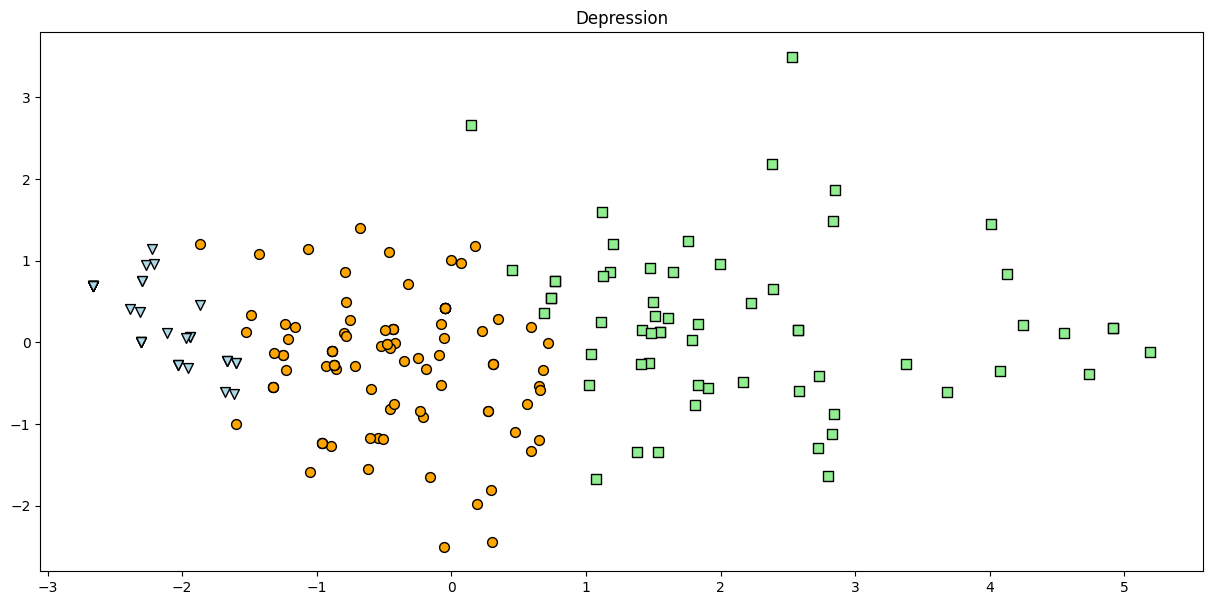

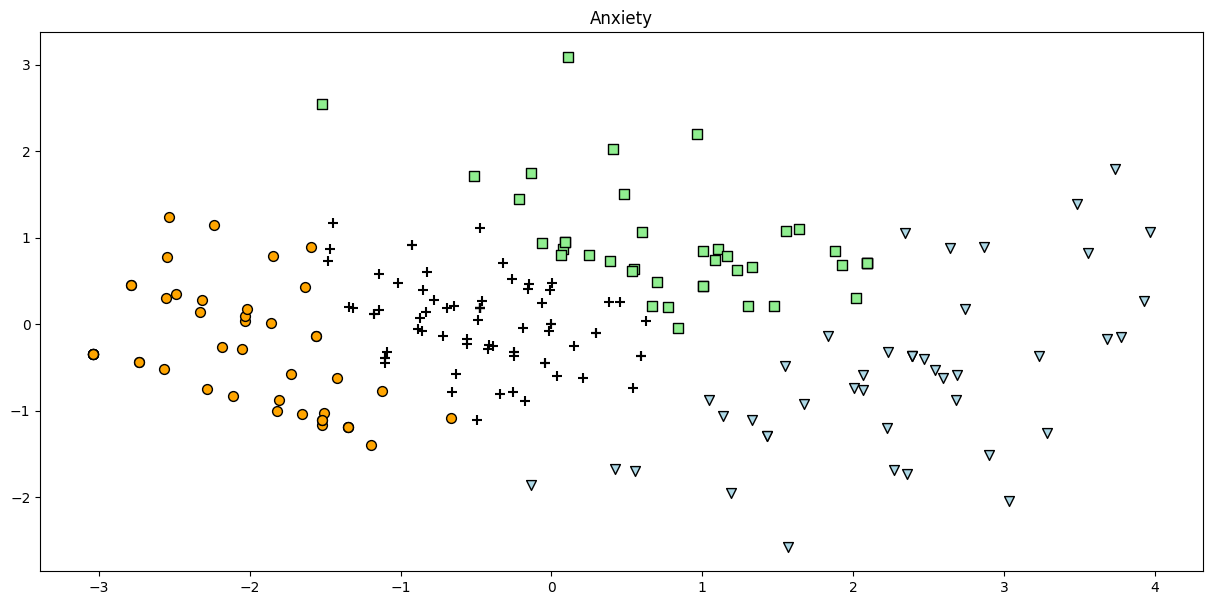

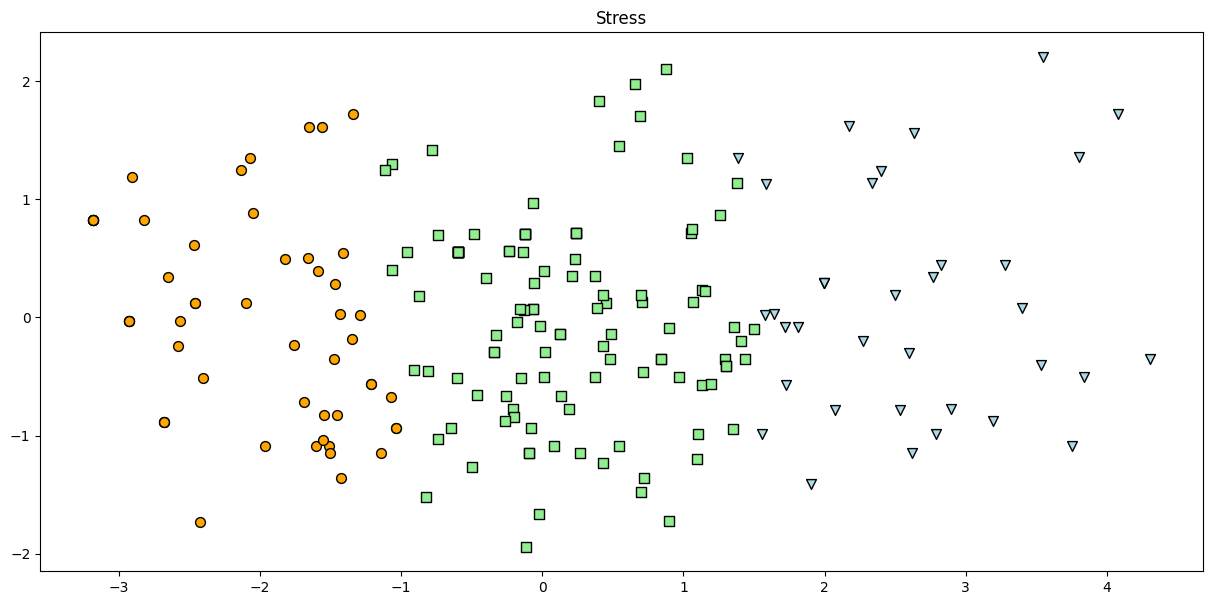

In [ ]:
# Visualisasi DASS - Gaussian
get_clustering_vis(label_dass_gaussian,X_dass_clus,model_dass_gaussian)

Pada Visualisasi diatas merupakan gambaran visualisasi hasil pengelompokan cluster menggunakan Gaussian Mixture terhadap faktor afektif yang terdapat dalam DASS. Didapatkan bahwa pengelompokkan dilakukan cukup baik dengan pengelompokan yang relatif sudah baik terpisah dari satu dan kelompok yang lainnya. Penjabarannya adalah sebagai berikut.
1. Depression terbentuk dua kelompok yang bernilai Moderate, Normal, Mild
2. Anxiety terbentuk tiga kelompok yang bernilai Normal, Mild, Severe, Moderate 
3. Stress terbentuk tiga kelompok yang bernilai Moderate, Normal, Mild

#### Fuzzy CMeans

In [ ]:
model_fuzzy_dass_d,label_fuzzy_dass_d = fuzzy_dass(X_dass_clus['Depression'],y_dass_clus['Depression'],3,'Depression')
model_fuzzy_dass_a,label_fuzzy_dass_a = fuzzy_dass(X_dass_clus['Anxiety'],y_dass_clus['Anxiety'],4,'Anxiety')
model_fuzzy_dass_s,label_fuzzy_dass_s = fuzzy_dass(X_dass_clus['Stress'],y_dass_clus['Stress'],3,'Stress')

Depression
Actual Value : (array(['Mild', 'Moderate', 'Normal', 'Severe'], dtype=object), array([ 33,  20, 148,   1]))
Predicted Value : (array([0, 1, 2]), array([ 45, 100,  57]))
Actual Silhouette : 0.3445498038077793
Predicted Silhouette : 0.37830529894433884

Anxiety
Actual Value : (array(['Mild', 'Moderate', 'Normal', 'Severe'], dtype=object), array([36, 54, 96, 16]))
Predicted Value : (array([0, 1, 2, 3]), array([43, 48, 41, 70]))
Actual Silhouette : 0.20735661589855056
Predicted Silhouette : 0.3468809099083722

Stress
Actual Value : (array(['Mild', 'Moderate', 'Normal'], dtype=object), array([ 19,   3, 180]))
Predicted Value : (array([0, 1, 2]), array([93, 54, 55]))
Actual Silhouette : 0.3501319985004621
Predicted Silhouette : 0.3668223882598224



Pada hasil perhitungan silhouette score diatas, didapatkan bahwa untuk hasil penggunaan Fuzzy CMeans pada setiap faktor afektif dalam DASS diperoleh nilai yang cukup baik dimana menandakan bahwa setiap cluster terpisah dengan relatif baik. Dapat dilihat untuk setiap skor Depression, Anxiety dan Stress nilainya yang melebihi nilai aslinya, maka hal ini menandakanbahwa persebaran datanya sudah lebih baik dari yang aslinya

In [ ]:
#Memasukan label ke dalam dict
label_dass_fuzzy = {}
label_dass_fuzzy.update({'Depression':label_fuzzy_dass_d})
label_dass_fuzzy.update({'Anxiety':label_fuzzy_dass_a})
label_dass_fuzzy.update({'Stress':label_fuzzy_dass_s})

#Memasukan model ke dalam dict
model_dass_fuzzy = {}
model_dass_fuzzy.update({'Depression':model_fuzzy_dass_d})
model_dass_fuzzy.update({'Anxiety':model_fuzzy_dass_a})
model_dass_fuzzy.update({'Stress':model_fuzzy_dass_s})

In [ ]:
cat_label_dass_fuzzy = {}
cat_label_dass_fuzzy = label_dass_fuzzy.copy()

#Depression
cat_label_dass_fuzzy['Depression'] = cat_label_dass_fuzzy['Depression'].astype("str")
cat_label_dass_fuzzy['Depression'][cat_label_dass_fuzzy['Depression'] == "0"] = "Moderate"
cat_label_dass_fuzzy['Depression'][cat_label_dass_fuzzy['Depression'] == "1"] = "Mild"
cat_label_dass_fuzzy['Depression'][cat_label_dass_fuzzy['Depression'] == "2"] = "Normal"

#Anxiety
cat_label_dass_fuzzy['Anxiety'] = cat_label_dass_fuzzy['Anxiety'].astype("str")
cat_label_dass_fuzzy['Anxiety'][cat_label_dass_fuzzy['Anxiety'] == "0"] = "Severe"
cat_label_dass_fuzzy['Anxiety'][cat_label_dass_fuzzy['Anxiety'] == "1"] = "Normal"
cat_label_dass_fuzzy['Anxiety'][cat_label_dass_fuzzy['Anxiety'] == "2"] = "Moderate"
cat_label_dass_fuzzy['Anxiety'][cat_label_dass_fuzzy['Anxiety'] == "3"] = "Mild"

#Stress
cat_label_dass_fuzzy['Stress'] = cat_label_dass_fuzzy['Stress'].astype("str")
cat_label_dass_fuzzy['Stress'][cat_label_dass_fuzzy['Stress'] == "0"] = "Normal"
cat_label_dass_fuzzy['Stress'][cat_label_dass_fuzzy['Stress'] == "1"] = "Mild"
cat_label_dass_fuzzy['Stress'][cat_label_dass_fuzzy['Stress'] == "2"] = "Moderate"

for emotion in label_dass_fuzzy.keys():
    print('Emotion =',emotion)
    print("Jumlah Data =", y_dass_clus[emotion].shape[0])
    print("Jumlah Clustering Benar =", sum(y_dass_clus[emotion] == cat_label_dass_fuzzy[emotion]))
    print("Accuracy =", (sum(y_dass_clus[emotion] == cat_label_dass_fuzzy[emotion]) / y_dass_clus[emotion].shape[0] * 100))
    dass_clus.loc[emotion, 'Fuzzy CMeans'] = sum(y_dass_clus[emotion] == cat_label_dass_fuzzy[emotion]) / y_dass_clus[emotion].shape[0] * 100
    print()

Emotion = Depression
Jumlah Data = 202
Jumlah Clustering Benar = 86
Accuracy = 42.57425742574257

Emotion = Anxiety
Jumlah Data = 202
Jumlah Clustering Benar = 113
Accuracy = 55.940594059405946

Emotion = Stress
Jumlah Data = 202
Jumlah Clustering Benar = 96
Accuracy = 47.524752475247524



Pada hasil perhitungan akurasi diatas, didapatkan bahwa untuk hasil penggunaan Fuzzy CMeans pada setiap faktor afektif dalam DASS diperoleh nilai yang relatif rendah dimana menandakan bahwa setiap cluster mengidentifikasi kebenarannya dengan masih meraba-raba, perlu diingat juga bahwa metode clustering tidak terlalu berfokus ke dalam akurasi data, melainkan melihat pola yang terdapat dalam data tersebut. Ketiga Nilai pada faktor afektif DASS memiliki nilai yang dibawah 55%.

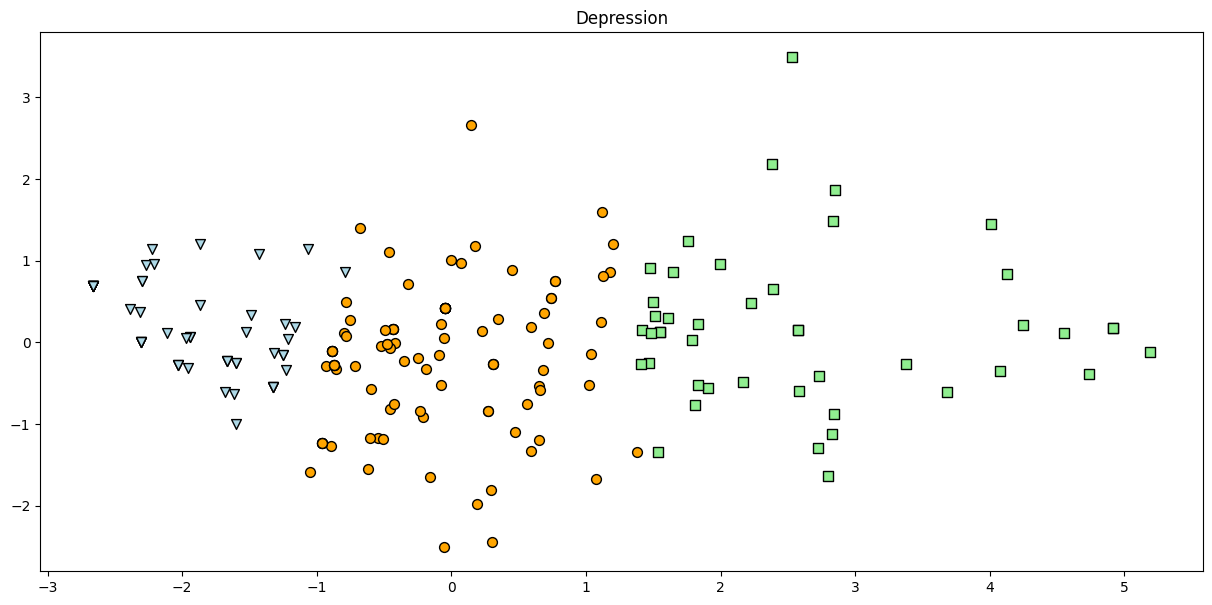

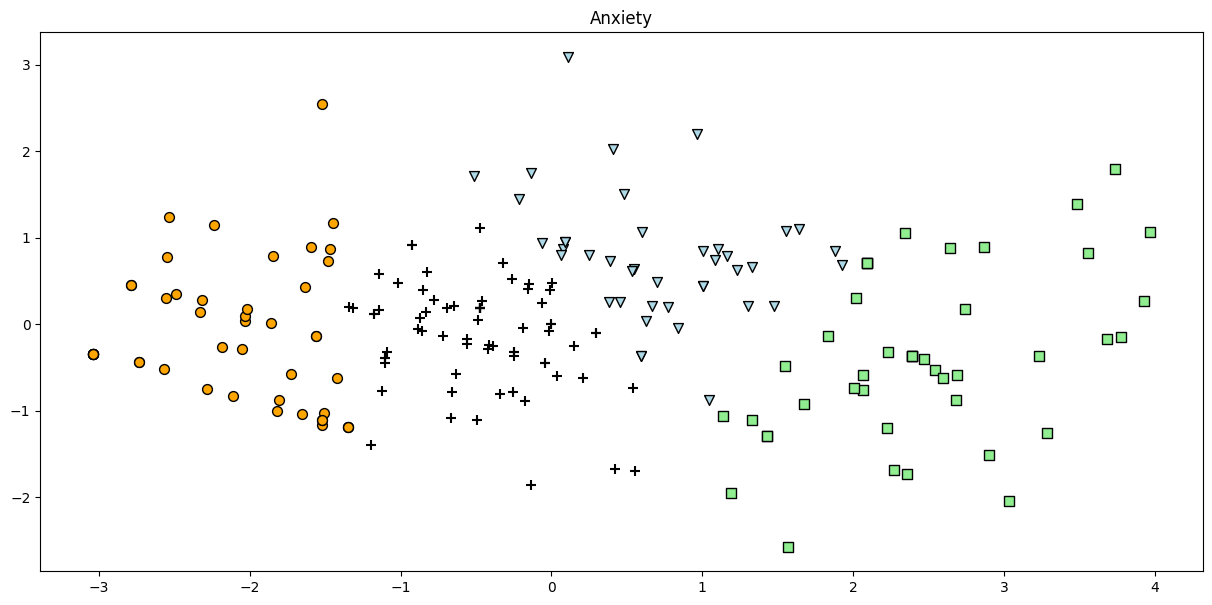

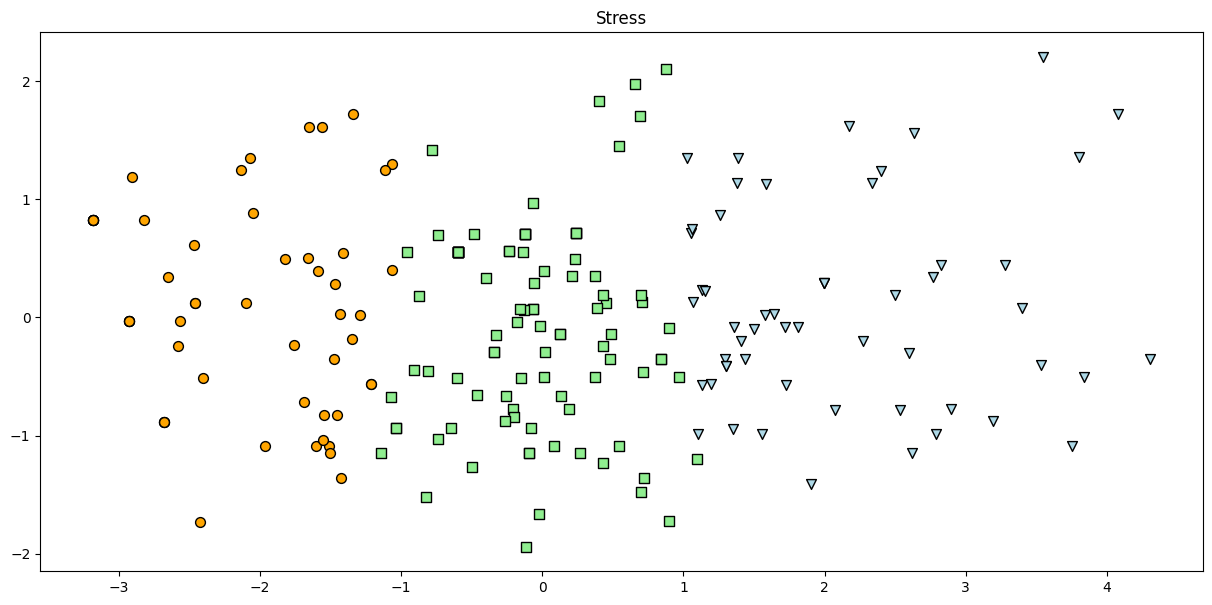

In [ ]:
# Visualisasi DASS - Fuzzy
get_clustering_vis(label_dass_fuzzy,X_dass_clus,model_dass_fuzzy)

Pada Visualisasi diatas merupakan gambaran visualisasi hasil pengelompokan cluster menggunakan Fuzzy CMeans terhadap faktor afektif yang terdapat dalam DASS. Didapatkan bahwa pengelompokkan dilakukan cukup baik dengan pengelompokan yang relatif sudah baik terpisah dari satu dan kelompok yang lainnya. Penjabarannya adalah sebagai berikut.
1. Depression terbentuk dua kelompok yang bernilai Normal, Mild, Moderate
2. Anxiety terbentuk tiga kelompok yang bernilai Normal, Mild, Severe, Moderate 
3. Stress terbentuk tiga kelompok yang bernilai Mild, Normal, Moderate

### 3.2.3. Clustering ERQ

In [ ]:
array_erq = df_erq_new.values
X_erq_clus = {}
X_erq_clus['CRF'] = array_erq[:,[2,4,6,8,9,11]]  # Cognitive Reappraisal Facet
X_erq_clus['ESF'] = array_erq[:,[3,5,7,10]]  # Expressive Suppression Facet

y_erq_clus = {}
y_erq_clus['CRF'] = array_erq[:,12]
y_erq_clus['ESF'] = array_erq[:,13]

for emotion in y_erq_clus.keys():
    pca = PCA(2)
    X_erq_clus[emotion] = pca.fit_transform(X_erq_clus[emotion])

# Menyimpan hasil akurasi 
erq_clus = pd.DataFrame(index=y_erq_clus.keys(), columns=['KMeans', "Gaussian Mixture","Fuzzy CMeans"])

# Menyimpan hasil silhouette 
erq_sil = pd.DataFrame(index=y_erq_clus.keys(), columns=['KMeans', "Gaussian Mixture","Fuzzy Cmeans"])

In [ ]:
#Fungsi KMeans
def kmeans_erq(x_clus,y_clus,cluster,name):
    model_kmeans = KMeans(n_clusters=cluster,random_state=1)
    label_kmeans = model_kmeans.fit_predict(x_clus)

    print(name)
    print('Actual Value',np.unique(y_clus,return_counts=True))
    print('Predicted Value',np.unique(label_kmeans,return_counts=True))

    print("Actual silhouette", silhouette_score(x_clus,y_clus))
    print("Predicted silhouette", silhouette_score(x_clus, label_kmeans))
    erq_sil.loc[name,'KMeans'] = silhouette_score(x_clus, label_kmeans)
    print()

    return model_kmeans,label_kmeans

def gaussian_erq(x_clus,y_clus,cluster,name):
    model_gaussian = GaussianMixture(n_components=cluster,random_state=1)
    model_gaussian.fit(x_clus)
    label_gaussian = model_gaussian.predict(x_clus)

    print(name)
    print('Actual Value :',np.unique(y_clus,return_counts=True))
    print('Predicted Value :',np.unique(label_gaussian,return_counts=True))

    print('Actual Silhouette :',silhouette_score(x_clus,y_clus))
    print('Predicted Silhouette :',silhouette_score(x_clus,label_gaussian))
    erq_sil.loc[name,"Gaussian Mixture"] = silhouette_score(x_clus,label_gaussian)

    return model_gaussian, label_gaussian

def fuzzy_erq(x_clus,y_clus,cluster,name):
    model_fuzzy = FCM(n_clusters=cluster,random_state=1)
    model_fuzzy.fit(x_clus)
    label_fuzzy = model_fuzzy.predict(x_clus)

    print(name)
    print('Actual Value :',np.unique(y_clus,return_counts=True))
    print('Predicted Value :',np.unique(label_fuzzy,return_counts=True))

    print('Actual Silhouette :',silhouette_score(x_clus,y_clus))
    print('Predicted Silhouette :',silhouette_score(x_clus,label_fuzzy))
    erq_sil.loc[name,"Fuzzy CMeans"] = silhouette_score(x_clus,label_fuzzy)
    print()

    return model_fuzzy,label_fuzzy

#### KMeans

In [ ]:
model_kmeans_erq_crf,label_kmeans_erq_crf = kmeans_erq(X_erq_clus['CRF'],y_erq_clus['CRF'],2,'CRF')
model_kmeans_erq_esf,label_kmeans_erq_esf = kmeans_erq(X_erq_clus['ESF'],y_erq_clus['ESF'],3,'ESF')

CRF
Actual Value (array(['High', 'Moderate'], dtype=object), array([ 37, 165]))
Predicted Value (array([0, 1], dtype=int32), array([ 90, 112]))
Actual silhouette 0.3178629808946635
Predicted silhouette 0.4163880217920117

ESF
Actual Value (array(['High', 'Low', 'Moderate'], dtype=object), array([ 20,  17, 165]))
Predicted Value (array([0, 1, 2], dtype=int32), array([53, 96, 53]))
Actual silhouette 0.16610255471780655
Predicted silhouette 0.365025737673923



Pada hasil perhitungan silhouette score diatas, didapatkan bahwa untuk hasil penggunaan Kmeans pada setiap faktor afektif dalam ERQ diperoleh nilai yang cukup baik dimana menandakan bahwa setiap cluster terpisah dengan relatif baik. Dapat dilihat untuk setiap skor CRF dan ESF nilainya yang melebihi nilai aslinya, maka hal ini menandakan bahwa persebaran datanya sudah lebih baik dari yang aslinya

In [ ]:
#Memasukan label ke dalam dict
label_erq_kmeans = {}
label_erq_kmeans.update({'CRF':label_kmeans_erq_crf})
label_erq_kmeans.update({'ESF':label_kmeans_erq_esf})

#Memasukan model ke dalam dict
model_erq_kmeans = {}
model_erq_kmeans.update({'CRF':model_kmeans_erq_crf})
model_erq_kmeans.update({'ESF':model_kmeans_erq_esf})

In [ ]:
cat_label_erq_kmeans = {}
cat_label_erq_kmeans = label_erq_kmeans.copy()

#CRF
cat_label_erq_kmeans['CRF'] = cat_label_erq_kmeans['CRF'].astype("str")
cat_label_erq_kmeans['CRF'][cat_label_erq_kmeans['CRF'] == "0"] = "Moderate"
cat_label_erq_kmeans['CRF'][cat_label_erq_kmeans['CRF'] == "1"] = "High"

#ESF
cat_label_erq_kmeans['ESF'] = cat_label_erq_kmeans['ESF'].astype("str")
cat_label_erq_kmeans['ESF'][cat_label_erq_kmeans['ESF'] == "0"] = "High"
cat_label_erq_kmeans['ESF'][cat_label_erq_kmeans['ESF'] == "1"] = "Moderate"
cat_label_erq_kmeans['ESF'][cat_label_erq_kmeans['ESF'] == "2"] = "Low"

for emotion in label_erq_kmeans.keys():
    print('Emotion =',emotion)
    print("Jumlah Data =", y_erq_clus[emotion].shape[0])
    print("Jumlah Clustering Benar =", sum(y_erq_clus[emotion] == cat_label_erq_kmeans[emotion]))
    print("Accuracy =", (sum(y_erq_clus[emotion] == cat_label_erq_kmeans[emotion]) / y_erq_clus[emotion].shape[0] * 100))
    erq_clus.loc[emotion, 'KMeans'] = sum(y_erq_clus[emotion] == cat_label_erq_kmeans[emotion]) / y_erq_clus[emotion].shape[0] * 100
    print()

Emotion = CRF
Jumlah Data = 202
Jumlah Clustering Benar = 127
Accuracy = 62.87128712871287

Emotion = ESF
Jumlah Data = 202
Jumlah Clustering Benar = 93
Accuracy = 46.03960396039604



Pada hasil perhitungan akurasi diatas, didapatkan bahwa untuk hasil penggunaan Kmeans pada setiap faktor afektif dalam ERQ diperoleh nilai yang lumayan baik dimana menandakan bahwa setiap cluster mengidentifikasi kebenarannya dengan masih relatif meraba-raba, perlu diingat juga bahwa metode clustering tidak terlalu berfokus ke dalam akurasi data, melainkan melihat pola yang terdapat dalam data tersebut. Pada faktor CRF nilai yang diperoleh adalah 62% dan pada faktor ESF nilai yang diperoleh adalah 46%.

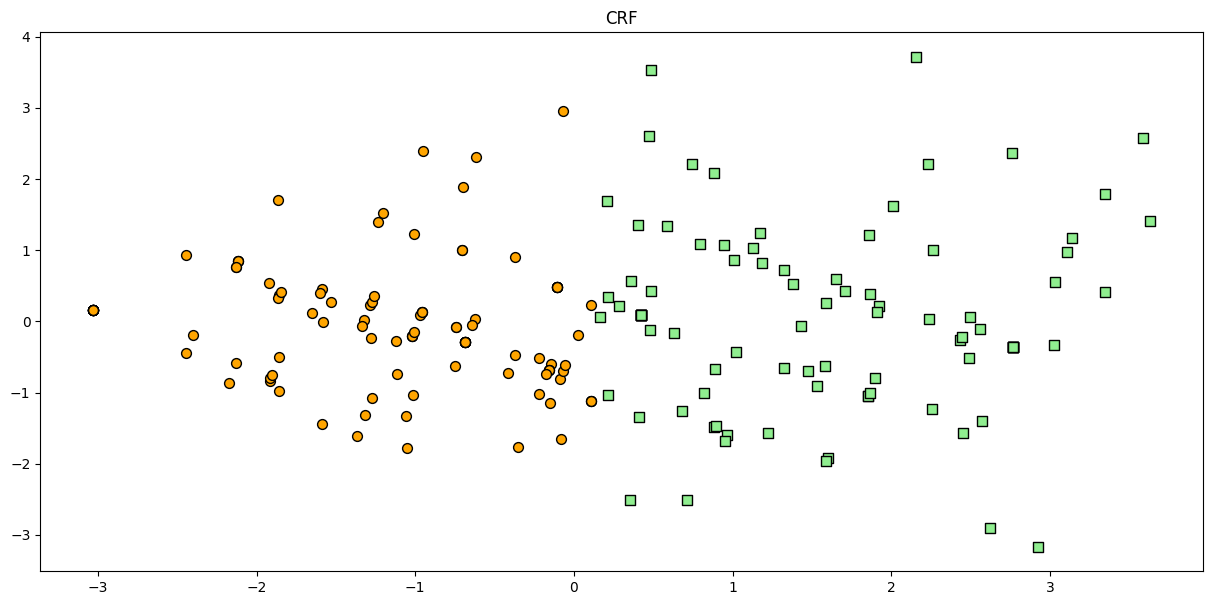

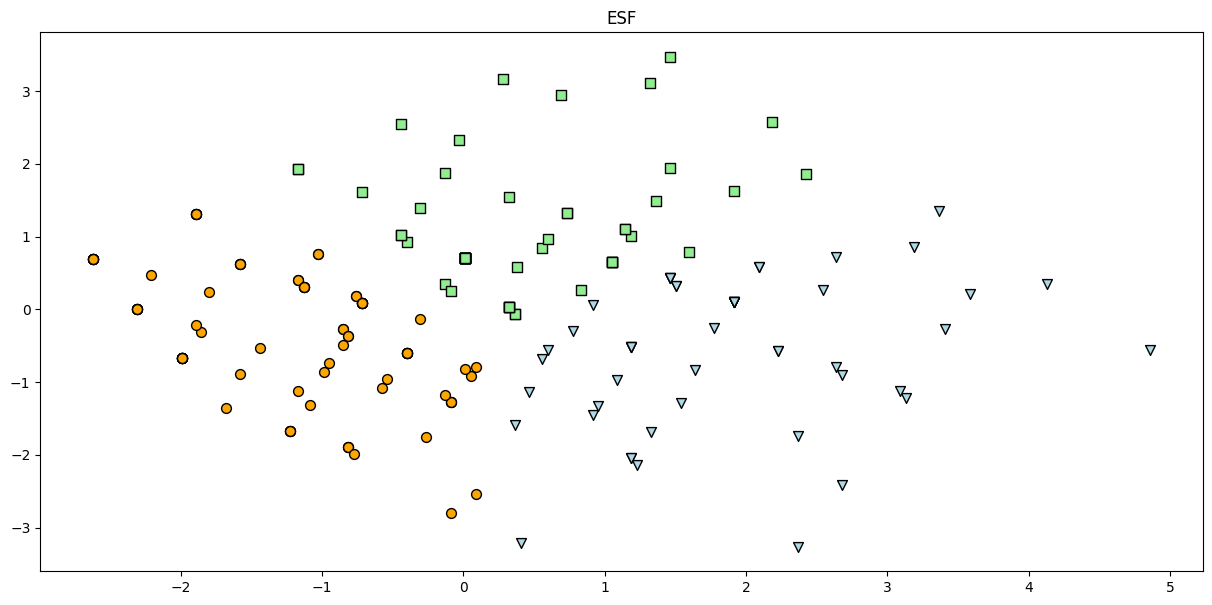

In [ ]:
# Visualisasi ERQ - KMeans
get_clustering_vis(label_erq_kmeans,X_erq_clus,model_erq_kmeans)

Pada Visualisasi diatas merupakan gambaran visualisasi hasil pengelompokan cluster menggunakan KMeans terhadap faktor afektif yang terdapat dalam ERQ. Didapatkan bahwa pengelompokkan dilakukan cukup baik dengan pengelompokan yang relatif sudah baik terpisah dari satu dan kelompok yang lainnya. Penjabarannya adalah sebagai berikut.
1. ESF terbentuk dua kelompok yang bernilai High, Moderate
2. CRF terbentuk tiga kelompok yang bernilai Moderate, High, Low

#### Gaussian Mixture

In [ ]:
model_gaussian_erq_crf,label_gaussian_erq_crf = gaussian_erq(X_erq_clus['CRF'],y_erq_clus['CRF'],2,'CRF')
model_gaussian_erq_esf,label_gaussian_erq_esf = gaussian_erq(X_erq_clus['ESF'],y_erq_clus['ESF'],3,'ESF')

CRF
Actual Value : (array(['High', 'Moderate'], dtype=object), array([ 37, 165]))
Predicted Value : (array([0, 1]), array([ 80, 122]))
Actual Silhouette : 0.3178629808946635
Predicted Silhouette : 0.41565907905768096
ESF
Actual Value : (array(['High', 'Low', 'Moderate'], dtype=object), array([ 20,  17, 165]))
Predicted Value : (array([0, 1, 2]), array([16, 95, 91]))
Actual Silhouette : 0.16610255471780655
Predicted Silhouette : 0.3484246109380561


Pada hasil perhitungan silhouette score diatas, didapatkan bahwa untuk hasil penggunaan Gaussian Mixture pada setiap faktor afektif dalam ERQ diperoleh nilai yang cukup baik dimana menandakan bahwa setiap cluster terpisah dengan relatif baik. Dapat dilihat untuk setiap skor CRF dan ESF nilainya yang melebihi nilai aslinya, maka hal ini menandakan bahwa persebaran datanya sudah lebih baik dari yang aslinya

In [ ]:
#Memasukan label ke dalam dict
label_erq_gaussian = {}
label_erq_gaussian.update({'CRF':label_gaussian_erq_crf})
label_erq_gaussian.update({'ESF':label_gaussian_erq_esf})

#Memasukan model ke dalam dict
model_erq_gaussian = {}
model_erq_gaussian.update({'CRF':model_gaussian_erq_crf})
model_erq_gaussian.update({'ESF':model_gaussian_erq_esf})

In [ ]:
cat_label_erq_gaussian = {}
cat_label_erq_gaussian = label_erq_gaussian.copy()

#CRF
cat_label_erq_gaussian['CRF'] = cat_label_erq_gaussian['CRF'].astype("str")
cat_label_erq_gaussian['CRF'][cat_label_erq_gaussian['CRF'] == "0"] = "High"
cat_label_erq_gaussian['CRF'][cat_label_erq_gaussian['CRF'] == "1"] = "Moderate"

#ESF
cat_label_erq_gaussian['ESF'] = cat_label_erq_gaussian['ESF'].astype("str")
cat_label_erq_gaussian['ESF'][cat_label_erq_gaussian['ESF'] == "0"] = "High"
cat_label_erq_gaussian['ESF'][cat_label_erq_gaussian['ESF'] == "1"] = "Moderate"
cat_label_erq_gaussian['ESF'][cat_label_erq_gaussian['ESF'] == "2"] = "Low"

for emotion in label_erq_gaussian.keys():
    print('Emotion =',emotion)
    print("Jumlah Data =", y_erq_clus[emotion].shape[0])
    print("Jumlah Clustering Benar =", sum(y_erq_clus[emotion] == cat_label_erq_gaussian[emotion]))
    print("Accuracy =", (sum(y_erq_clus[emotion] == cat_label_erq_gaussian[emotion]) / y_erq_clus[emotion].shape[0] * 100))
    erq_clus.loc[emotion, 'Gaussian Mixture'] = sum(y_erq_clus[emotion] == cat_label_erq_gaussian[emotion]) / y_erq_clus[emotion].shape[0] * 100
    print()

Emotion = CRF
Jumlah Data = 202
Jumlah Clustering Benar = 85
Accuracy = 42.07920792079208

Emotion = ESF
Jumlah Data = 202
Jumlah Clustering Benar = 89
Accuracy = 44.05940594059406



Pada hasil perhitungan akurasi diatas, didapatkan bahwa untuk hasil penggunaan Gaussian Mixture pada setiap faktor afektif dalam ERQ diperoleh nilai yang realtif rendah dimana menandakan bahwa setiap cluster mengidentifikasi kebenarannya dengan masih meraba-raba, perlu diingat juga bahwa metode clustering tidak terlalu berfokus ke dalam akurasi data, melainkan melihat pola yang terdapat dalam data tersebut. Pada faktor CRF nilai yang diperoleh adalah 42% dan pada faktor ESF nilai yang diperoleh adalah 44%.

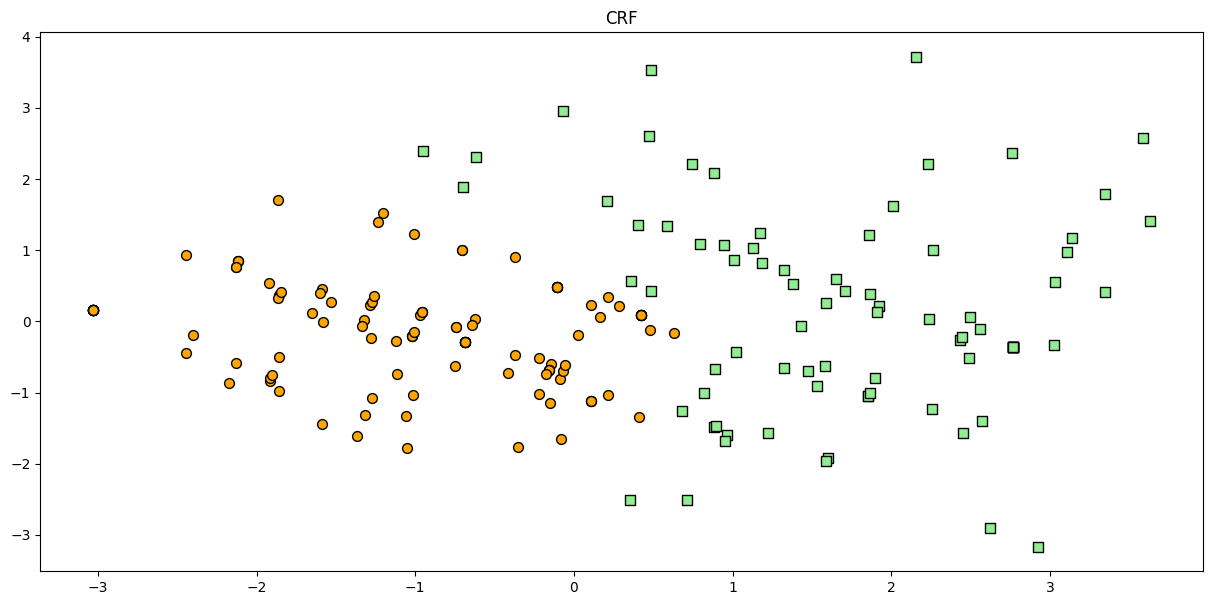

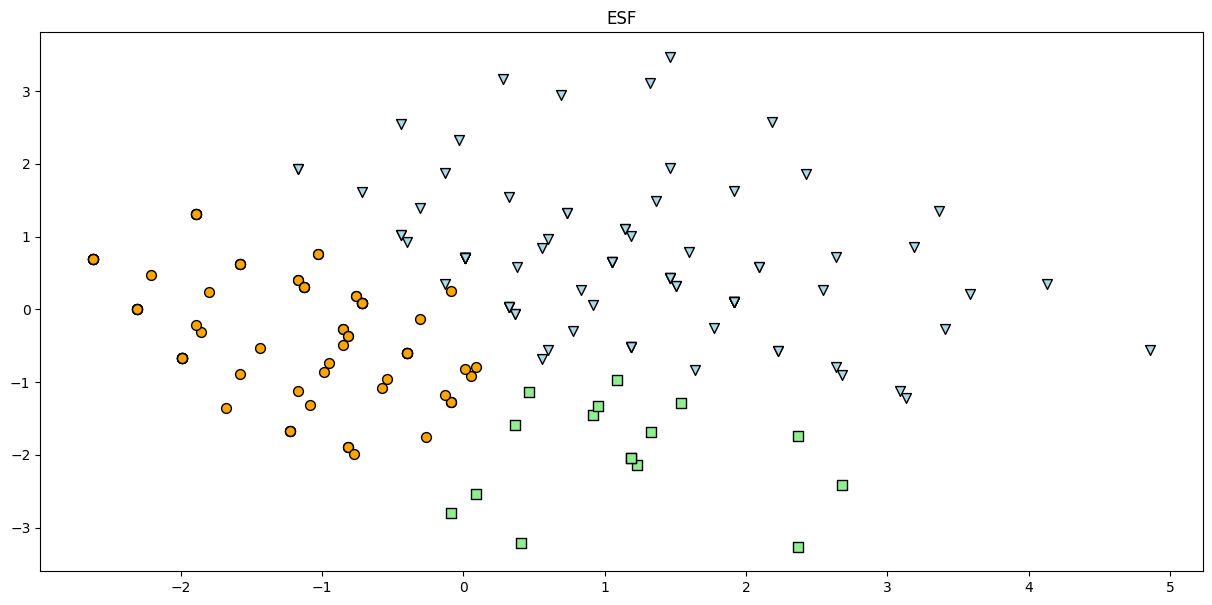

In [ ]:
# Visualisasi ERQ - KMeans
get_clustering_vis(label_erq_gaussian,X_erq_clus,model_erq_gaussian)

Pada Visualisasi diatas merupakan gambaran visualisasi hasil pengelompokan cluster menggunakan Gaussian Mixture terhadap faktor afektif yang terdapat dalam ERQ. Didapatkan bahwa pengelompokkan dilakukan cukup baik dengan pengelompokan yang relatif sudah baik terpisah dari satu dan kelompok yang lainnya. Penjabarannya adalah sebagai berikut.

1. ESF terbentuk dua kelompok yang bernilai Moderate, High
2. CRF terbentuk tiga kelompok yang bernilai Moderate, Low, High

#### Fuzzy CMeans

In [ ]:
model_fuzzy_erq_crf,label_fuzzy_erq_crf = fuzzy_erq(X_erq_clus['CRF'],y_erq_clus['CRF'],2,'CRF')
model_fuzzy_erq_esf,label_fuzzy_erq_esf = fuzzy_erq(X_erq_clus['ESF'],y_erq_clus['ESF'],3,'ESF')

CRF
Actual Value : (array(['High', 'Moderate'], dtype=object), array([ 37, 165]))
Predicted Value : (array([0, 1]), array([ 89, 113]))
Actual Silhouette : 0.3178629808946635
Predicted Silhouette : 0.41745056254178164

ESF
Actual Value : (array(['High', 'Low', 'Moderate'], dtype=object), array([ 20,  17, 165]))
Predicted Value : (array([0, 1, 2]), array([58, 92, 52]))
Actual Silhouette : 0.16610255471780655
Predicted Silhouette : 0.3307668453844322



Pada hasil perhitungan silhouette score diatas, didapatkan bahwa untuk hasil penggunaan Fuzzy CMeans pada setiap faktor afektif dalam ERQ diperoleh nilai yang cukup baik dimana menandakan bahwa setiap cluster terpisah dengan relatif baik. Dapat dilihat untuk setiap skor CRF dan ESF nilainya yang melebihi nilai aslinya, maka hal ini menandakan bahwa persebaran datanya sudah lebih baik dari yang aslinya

In [ ]:
#Memasukan label ke dalam dict
label_erq_fuzzy = {}
label_erq_fuzzy.update({'CRF':label_fuzzy_erq_crf})
label_erq_fuzzy.update({'ESF':label_fuzzy_erq_esf})

#Memasukan model ke dalam dict
model_erq_fuzzy = {}
model_erq_fuzzy.update({'CRF':model_fuzzy_erq_crf})
model_erq_fuzzy.update({'ESF':model_fuzzy_erq_esf})

In [ ]:
cat_label_erq_fuzzy = {}
cat_label_erq_fuzzy = label_erq_fuzzy.copy()

#CRF
cat_label_erq_fuzzy['CRF'] = cat_label_erq_fuzzy['CRF'].astype("str")
cat_label_erq_fuzzy['CRF'][cat_label_erq_fuzzy['CRF'] == "0"] = "Moderate"
cat_label_erq_fuzzy['CRF'][cat_label_erq_fuzzy['CRF'] == "1"] = "High"

#ESF
cat_label_erq_fuzzy['ESF'] = cat_label_erq_fuzzy['ESF'].astype("str")
cat_label_erq_fuzzy['ESF'][cat_label_erq_fuzzy['ESF'] == "0"] = "High"
cat_label_erq_fuzzy['ESF'][cat_label_erq_fuzzy['ESF'] == "1"] = "Moderate"
cat_label_erq_fuzzy['ESF'][cat_label_erq_fuzzy['ESF'] == "2"] = "Low"

for emotion in label_erq_fuzzy.keys():
    print('Emotion =',emotion)
    print("Jumlah Data =", y_erq_clus[emotion].shape[0])
    print("Jumlah Clustering Benar =", sum(y_erq_clus[emotion] == cat_label_erq_fuzzy[emotion]))
    print("Accuracy =", (sum(y_erq_clus[emotion] == cat_label_erq_fuzzy[emotion]) / y_erq_clus[emotion].shape[0] * 100))
    erq_clus.loc[emotion, 'Fuzzy CMeans'] = sum(y_erq_clus[emotion] == cat_label_erq_fuzzy[emotion]) / y_erq_clus[emotion].shape[0] * 100
    print()

Emotion = CRF
Jumlah Data = 202
Jumlah Clustering Benar = 126
Accuracy = 62.37623762376238

Emotion = ESF
Jumlah Data = 202
Jumlah Clustering Benar = 89
Accuracy = 44.05940594059406



Pada hasil perhitungan akurasi diatas, didapatkan bahwa untuk hasil penggunaan Fuzzy CMeans pada setiap faktor afektif dalam ERQ diperoleh nilai yang lumayan baik dimana menandakan bahwa setiap cluster mengidentifikasi kebenarannya dengan masih relatif meraba-raba, perlu diingat juga bahwa metode clustering tidak terlalu berfokus ke dalam akurasi data, melainkan melihat pola yang terdapat dalam data tersebut. Pada faktor CRF nilai yang diperoleh adalah 62% dan pada faktor ESF nilai yang diperoleh adalah 44%.

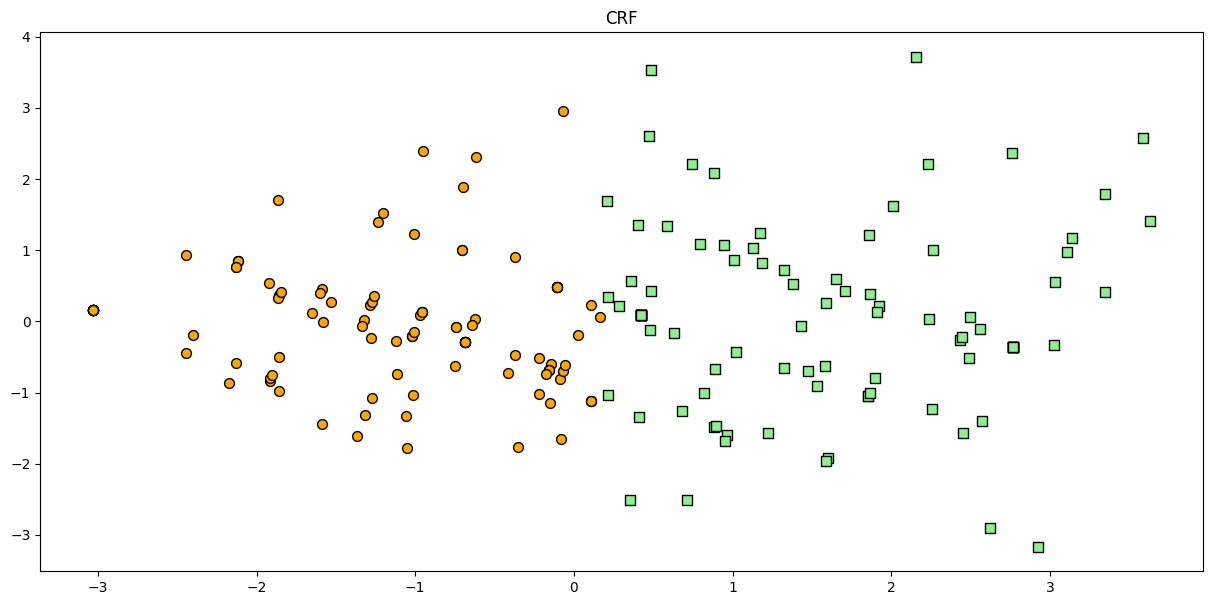

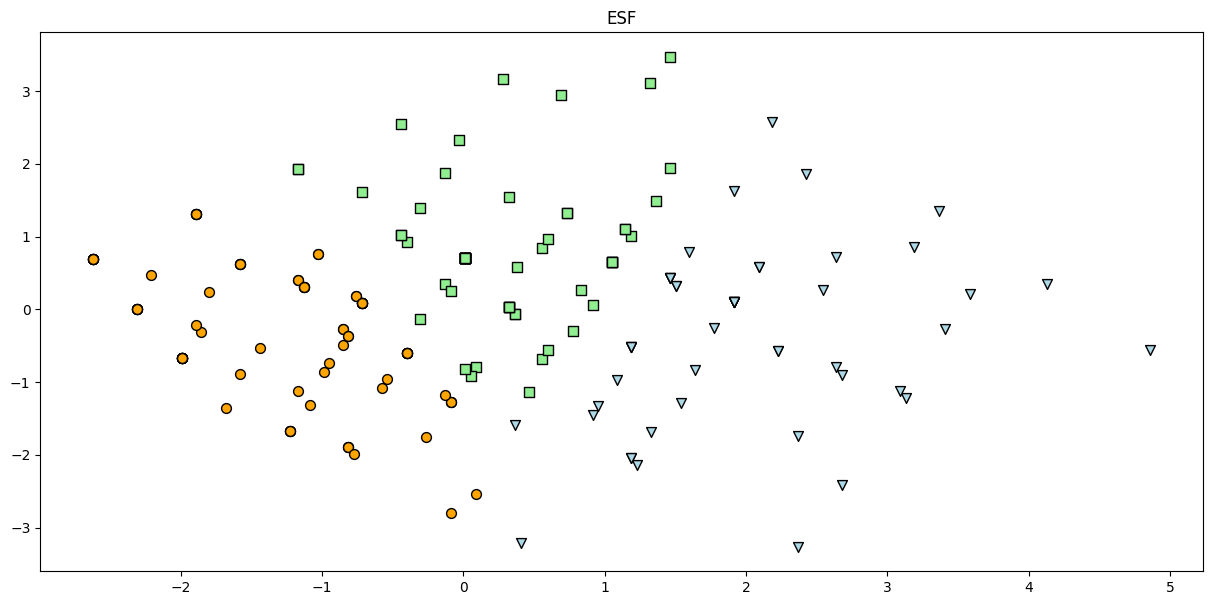

In [ ]:
# Visualisasi ERQ - Fuzzy
get_clustering_vis(label_erq_fuzzy,X_erq_clus,model_erq_fuzzy)

Pada Visualisasi diatas merupakan gambaran visualisasi hasil pengelompokan cluster menggunakan Fuzzy CMeans terhadap faktor afektif yang terdapat dalam ERQ. Didapatkan bahwa pengelompokkan dilakukan cukup baik dengan pengelompokan yang relatif sudah baik terpisah dari satu dan kelompok yang lainnya. Penjabarannya adalah sebagai berikut.
1. ESF terbentuk dua kelompok yang bernilai Moderate, High
2. CRF terbentuk tiga kelompok yang bernilai Moderate, High, Low

### 3.2.4. Evaluasi Clustering AEQ, DASS dan ERQ

Evaluasi dilakukan dengan merancang bar-chart perbandingan hasil untuk setiap algoritma clustering pembelajaran mesin terhadap faktor afektif. Evaluasi ini ditujukan untuk melihat perbandingan algoritma mana yang memeroleh hasil terbaik dalam mengelompokan faktor afektif.

In [ ]:
# fungsi plotting / visualisasi dari akurasi clustering
def get_accuracyvisualization(name, accuracy_cluster):
    plt.figure(figsize=(12,7))

    X_axis = np.arange(accuracy_cluster.shape[0])
    plt.bar(X_axis - 0.2, accuracy_cluster['KMeans'], 0.2, label = 'Kmeans', color='#FAE5D3')
    plt.bar(X_axis, accuracy_cluster['Gaussian Mixture'], 0.2, label = 'Gaussian Mixture', color='#E16162')
    plt.bar(X_axis  + 0.2, accuracy_cluster['Fuzzy CMeans'], 0.2, label = 'Fuzzy CMeans', color='#8CBEB2')


    plt.xticks(X_axis, accuracy_cluster.index, rotation=45)
    plt.title("Akurasi Clustering pada {}".format(name),fontweight='bold')
    plt.ylabel("Akurasi")
    plt.xlabel("Emosi")
    plt.legend(loc='lower right')
    plt.grid(True, axis='y')

    plt.show()

# fungsi plotting / visualisasi dari silhouette score clustering
def get_silhouettevisualization(name, silhouette_clustering):
    plt.figure(figsize=(12,7))

    X_axis = np.arange(silhouette_clustering.shape[0])
    plt.bar(X_axis - 0.2, silhouette_clustering['KMeans'], 0.2, label = 'Kmeans', color='#FAE5D3')
    plt.bar(X_axis, silhouette_clustering['Gaussian Mixture'], 0.2, label = 'Gaussian Mixture', color='#E16162')
    plt.bar(X_axis  + 0.2, silhouette_clustering['Fuzzy CMeans'], 0.2, label = 'Fuzzy CMeans', color='#8CBEB2')

    plt.xticks(X_axis, silhouette_clustering.index, rotation=45)
    plt.title("Silhouette Score pada {}".format(name),fontweight='bold')
    plt.ylabel("Silhouette Score")
    plt.xlabel("Emosi")
    plt.legend(loc='lower right')
    plt.grid(True, axis='y')

    plt.show()

#### Visualisasi Evaluasi Akurasi

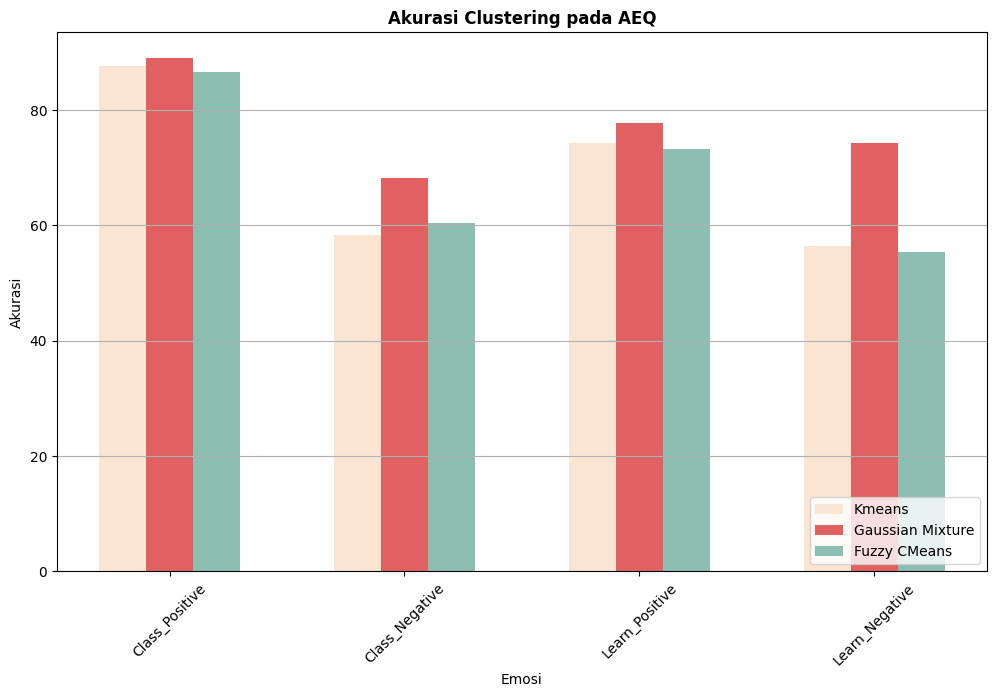

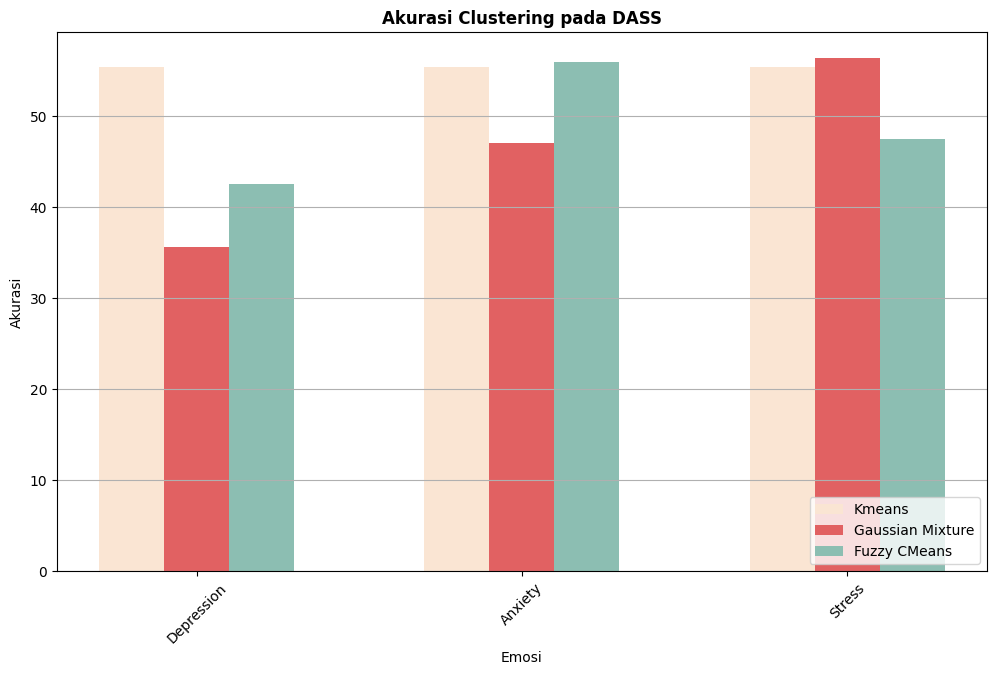

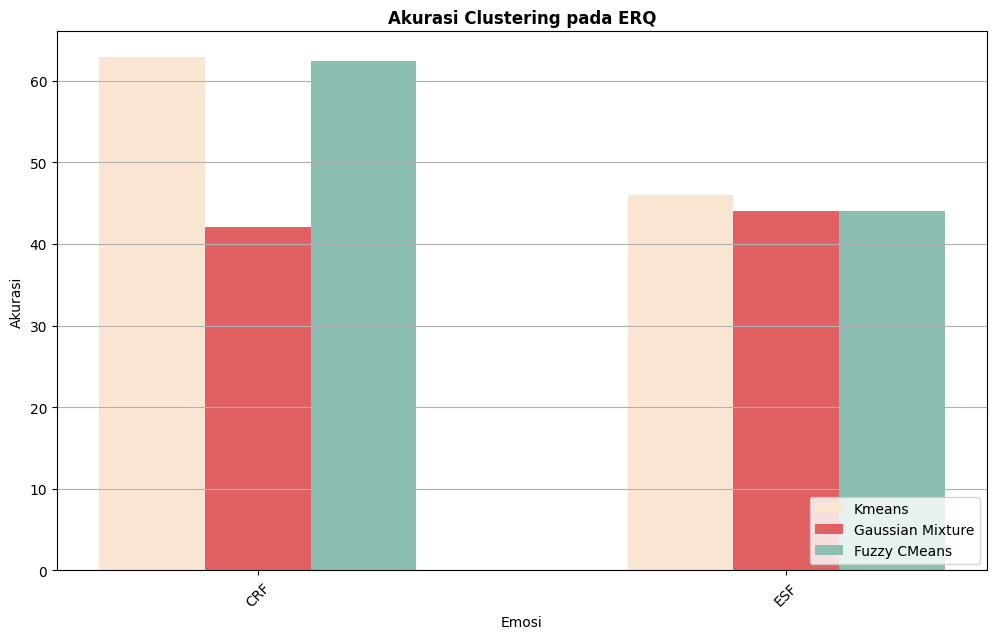

In [ ]:
get_accuracyvisualization('AEQ', aeq_clus)
get_accuracyvisualization('DASS', dass_clus)
get_accuracyvisualization('ERQ', erq_clus)

Pada visualisasi diatas, didapatkan hasil performa ketiga algoritma terhadap akurasinya dalam melakukan clustering pada AEQ, DASS dan ERQ dengan masing - masing hasilnya yang bervariasi. Nilai tertinggi diperoleh oleh Gaussian Mixture pada AEQ, kemudian KMeans pada DASS dan Fuzzy CMeans pada ERQ.

Hal yang perlu diingat dalam proses clustering adalah nilai akurasi dalam clustering tidak menjadi fokus utama dalam pembelajaran mesinnya. Karena tujuan utama dalam melakukan clustering adalah membuat pengelompokkan terhadap data yang sifatnya mirip dengan data yang lain dimasukkan ke dalam satu kelompok dan jika sifatnya berbeda dengan data lain maka akan dipisahkan kelompoknya. 

Dalam melakukan clustering, data yang berada didalam suatu kelompok adalah data yang "mirip" dan belum tentu identikal. Hal tersebut yang seringkali menurunkan tingkat akurasi pada hasil clustering. 

#### Visualisasi Evaluasi Silhouette Score

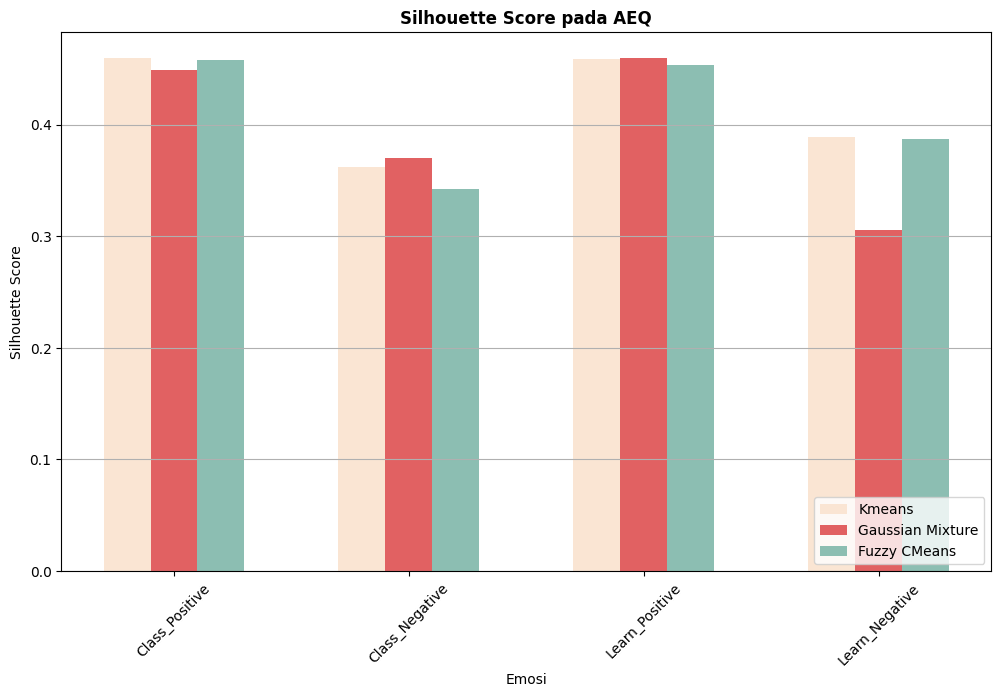

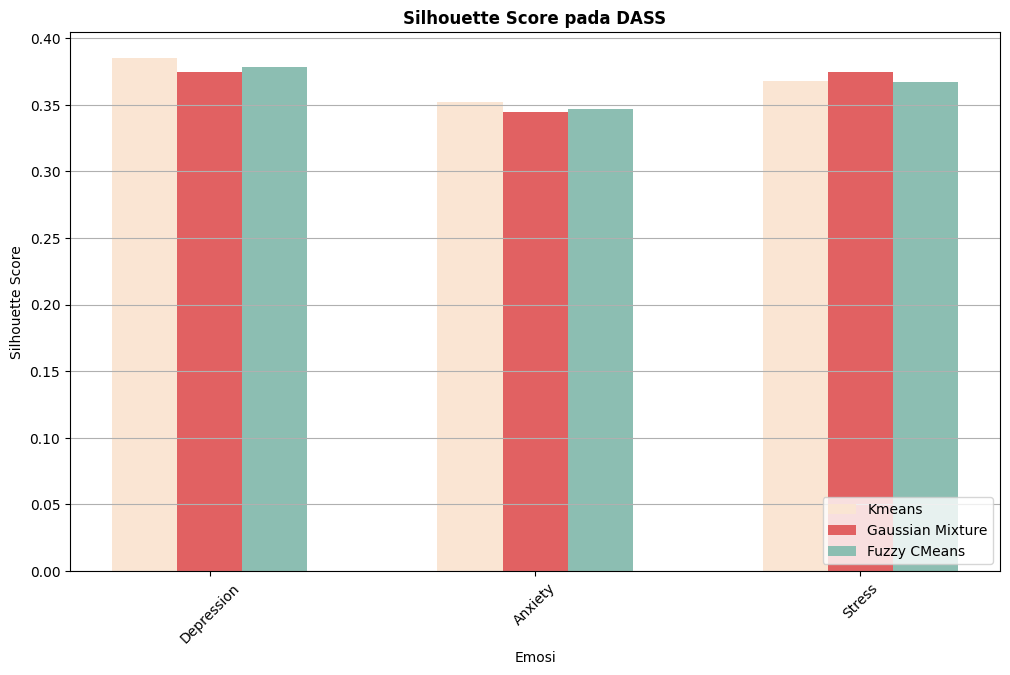

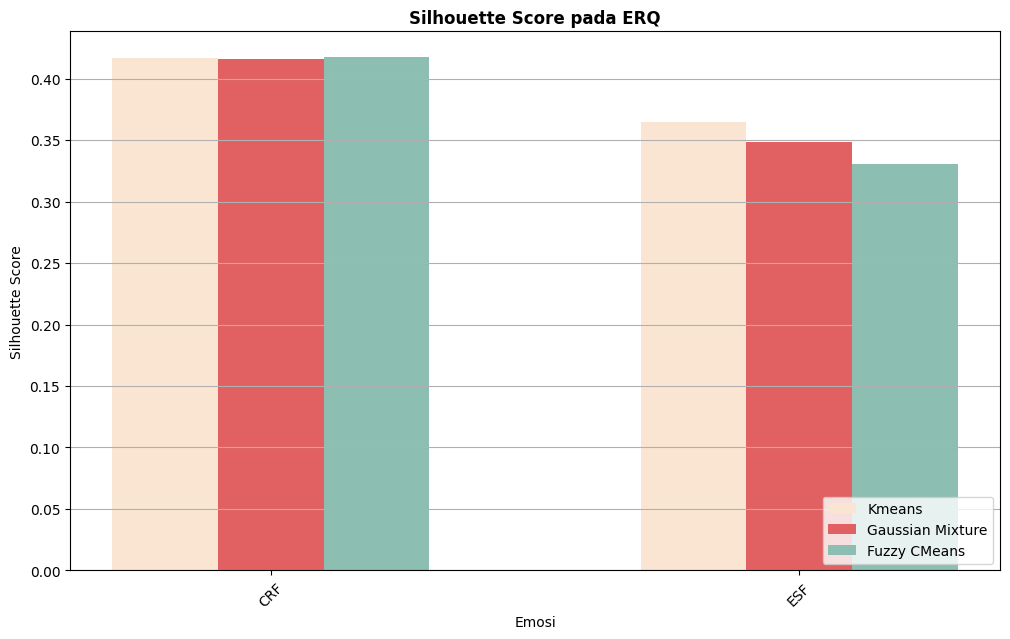

In [ ]:
get_silhouettevisualization('AEQ', aeq_sil)
get_silhouettevisualization('DASS', dass_sil)
get_silhouettevisualization('ERQ', erq_sil)

Pada visualisasi diatas, didapatkan hasil performa ketiga algoritma terhadap silhouette score dalam melakukan clustering pada AEQ, DASS dan ERQ dengan masing - masing hasilnya yang bervariasi.
1. Penjabaran pada AEQ
Faktor Class Positive diperoleh nilai tertinggi nya oleh KMeans, Faktor Class Negative diperoleh tertinggi oleh Gaussian Mixture, Faktor Learn Positive diperoleh nilai tertinggi oleh Gaussian Mixture dan pada Learn Negative diperoleh nilai tertinggi oleh Fuzzy CMeans
2. Penjabaran pada DASS
Faktor Depression diperoleh nilai tertingginya oleh KMeans, Faktor Anxiety diperoleh niali tertingginya oleh KMeans dan pada Stress diperoleh nilai tertinggi oleh Fuzzy CMeans
3. Penjabaran pada ERQ
Faktor CRF diperoleh nilai tertingginya oleh KMEans dan Fuzzy CMeans. Kemudian pada faktor ESF diperoleh nilai tertinggi oleh KMeans

Hal yang perlu diingat dalam proses clustering adalah nilai silhouette score dalam clustering menjadi salah satu fokus utama dalam pembelajaran mesinnya. Karena tujuan utama dalam melakukan clustering adalah membuat pengelompokkan terhadap data yang sifatnya mirip dengan data yang lain dimasukkan ke dalam satu kelompok dan jika sifatnya berbeda dengan data lain maka akan dipisahkan kelompoknya. Silhouette score disini menilai tentang seberapa baik sebuah cluster tersebut dibentuk dan seberapa baik cluster tersebut terpisah - pisah.

### 3.2.5. Clustering Emotion Raw data Terhadap Nilai

In [ ]:
# AEQ - memisahkan kuesioner class related dan test related berdasarkan jenis emosi
# Positive Emotion: Enjoyment, Hope, Pride
# Negative Emotion: Anger, Anxiety, Shame, Hopelessness, Boredom

df_aeq_new['Class_Positive'] = df_aeq_new.iloc[:,2:14].sum(axis=1)
df_aeq_new['Class_Negative'] = df_aeq_new.iloc[:,14:34].sum(axis=1)
df_aeq_new['Learn_Positive'] = df_aeq_new.iloc[:,34:46].sum(axis=1)
df_aeq_new['Learn_Negative'] = df_aeq_new.iloc[:,46:66].sum(axis=1)

# memisahkan kuesioner DASS menjadi grup tersendiri
# D / Depression =  3,5,10,13,16,17,21
# A / Anxiety = 2,4,7,9,15,19,20
# S / Stress = 1,6,8,11,12,14,18

df_dass_new['Depression'] = df_dass_new.iloc[:,[4,6,11,14,17,18,22]].sum(axis=1)
df_dass_new['Anxiety'] = df_dass_new.iloc[:,[3,5,8,10,16,20,21]].sum(axis=1)
df_dass_new['Stress'] = df_dass_new.iloc[:,[2,7,9,12,13,15,19]].sum(axis=1)

# df_aeq_nilai = df_aeq_new.iloc[:,-4:]
# df_aeq_nilai.head()

# memisahkan kuesioner ERQ menjadi 2 grup tersendiri
# Pertanyaan 1,3,5,7,8,10 make up the Cognitive Reappraisal facet
# Pertanyaan 2,4,6,9 make up the Expressive Suppression facet. 

df_erq_new['CRF'] = df_erq_new.iloc[:,[2,4,6,8,9,11]].sum(axis=1)
df_erq_new['ESF'] = df_erq_new.iloc[:,[3,5,7,10]].sum(axis=1)

#Mengambil data olahannya saja
df_aeq_nilai = df_aeq_new.iloc[:,-4:]
df_dass_nilai = df_dass_new.iloc[:,-3:]
df_erq_nilai = df_erq_new.iloc[:,-2:]

# silhouette = pd.DataFrame(index=[df_aeq_nilai.keys(),df_dass_nilai.keys(),df_erq_nilai.keys()], columns=['KMeans', "Gaussian Mixture","Fuzzy Cmeans"])

In [ ]:
# Menggabungkan df ke aeq
#df_aeq_pretest
df_aeq_pretest = df_aeq_nilai.copy()
df_aeq_pretest['nilai_pretest'] = df['nilai_pretest']

#df_aeq_posttest
df_aeq_posttest = df_aeq_nilai.copy()
df_aeq_posttest['nilai_posttest'] = df['nilai_posttest']

#df_aeq_delta
df_aeq_delta = df_aeq_nilai.copy()
df_aeq_delta['delta'] = df['delta']

In [ ]:
X_aeq_nilai = {}
X_aeq_nilai['AEQ to Pretest'] = df_aeq_pretest
X_aeq_nilai['AEQ to Posttest'] = df_aeq_posttest
X_aeq_nilai['AEQ to Delta'] = df_aeq_delta

In [ ]:
# Menggabungkan df ke dass
#df_dass_pretest
df_dass_pretest = df_dass_nilai.copy()
df_dass_pretest['nilai_pretest'] = df['nilai_pretest']

#df_dass_posttest
df_dass_posttest = df_dass_nilai.copy()
df_dass_posttest['nilai_posttest'] = df['nilai_posttest']

#df_dass_delta
df_dass_delta = df_dass_nilai.copy()
df_dass_delta['delta'] = df['delta']

In [ ]:
X_dass_nilai = {}
X_dass_nilai['DASS to Pretest'] = df_dass_pretest
X_dass_nilai['DASS to Posttest'] = df_dass_posttest
X_dass_nilai['DASS to Delta'] = df_dass_delta

In [ ]:
# Menggabungkan df ke erq
#df_erq_pretest
df_erq_pretest = df_erq_nilai.copy()
df_erq_pretest['nilai_pretest'] = df['nilai_pretest']

#df_erq_posttest
df_erq_posttest = df_erq_nilai.copy()
df_erq_posttest['nilai_posttest'] = df['nilai_posttest']

#df_erq_delta
df_erq_delta = df_erq_nilai.copy()
df_erq_delta['delta'] = df['delta']

In [ ]:
X_erq_nilai = {}
X_erq_nilai['ERQ to Pretest'] = df_erq_pretest
X_erq_nilai['ERQ to Posttest'] = df_erq_posttest
X_erq_nilai['ERQ to Delta'] = df_erq_delta

In [ ]:
# # AED
frames = [df_aeq_nilai, df_dass_nilai, df_erq_nilai]
df_ade_nilai = pd.concat(frames,axis=1)

df_ade_pretest=df_ade_nilai.copy()
df_ade_posttest=df_ade_nilai.copy()
df_ade_delta=df_ade_nilai.copy()

df_ade_pretest = pd.concat([df_ade_pretest,df['nilai_pretest']],axis = 1)
df_ade_posttest = pd.concat([df_ade_posttest,df['nilai_posttest']],axis = 1)
df_ade_delta = pd.concat([df_ade_delta,df['delta']],axis = 1)

In [ ]:
X_ade_nilai = {}
X_ade_nilai['ADE to Pretest'] = df_ade_pretest
X_ade_nilai['ADE to Posttest'] = df_ade_posttest
X_ade_nilai['ADE to Delta'] = df_ade_delta

#### KMeans Nilai

In [ ]:
def elbow_method_kmeans(x,name):
    cost = []
    K = range(1,10)
    for num_clusters in list(K):
        kmeans = KMeans(n_clusters=num_clusters,random_state=1)
        kmeans.fit_predict(x)
        cost.append(kmeans.inertia_)
        
    plt.plot(K, cost, 'bx-')
    plt.xlabel('No. of clusters')
    plt.ylabel('Cost')
    plt.title(name)
    plt.show()

def kmeans_nilai(x_clus,cluster):
    model_kmeans = KMeans(n_clusters=cluster,random_state=1)
    label_kmeans = model_kmeans.fit_predict(x_clus)
    
    print('Silhouette Score :',silhouette_score(x_clus,label_kmeans))
    return label_kmeans,model_kmeans

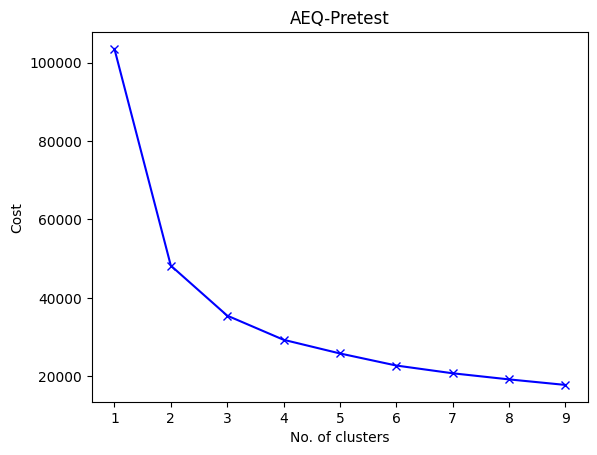

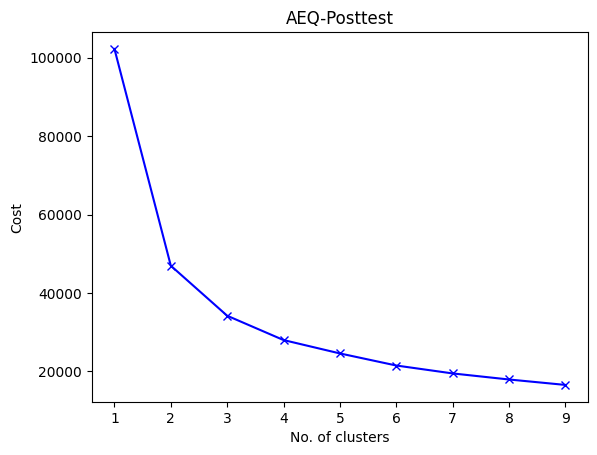

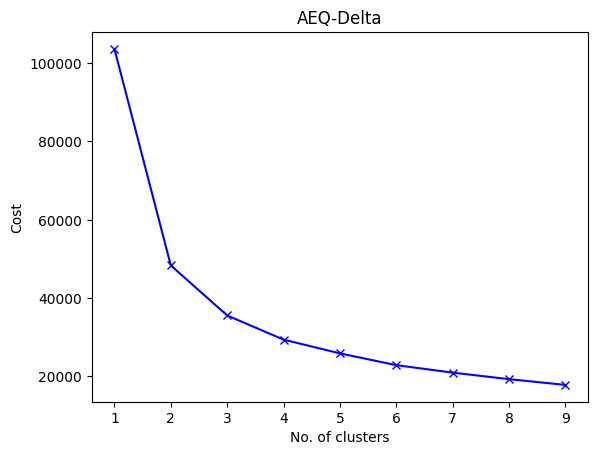

In [ ]:
elbow_method_kmeans(df_aeq_pretest,"AEQ-Pretest")
elbow_method_kmeans(df_aeq_posttest,"AEQ-Posttest")
elbow_method_kmeans(df_aeq_delta,"AEQ-Delta")

Elbow method digunakan untuk menentukan jumlah cluster terbaik dalam melakukan clustering. Pada hasil diatas untuk faktor afektif AEQ terhadap data ujian, jumlah cluster terbaik adalah 3  

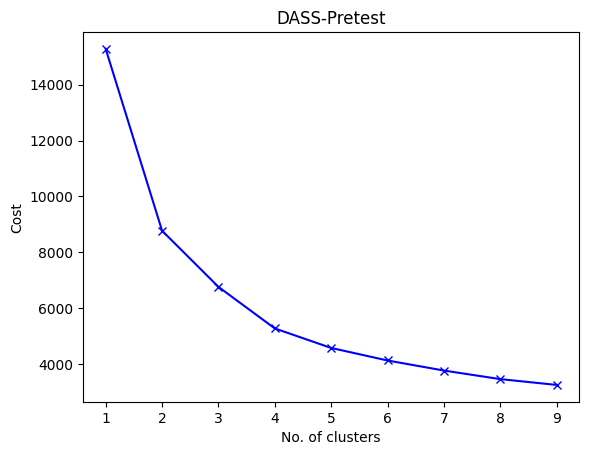

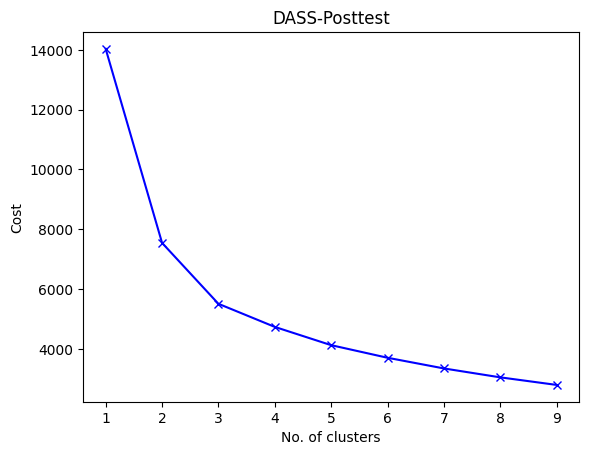

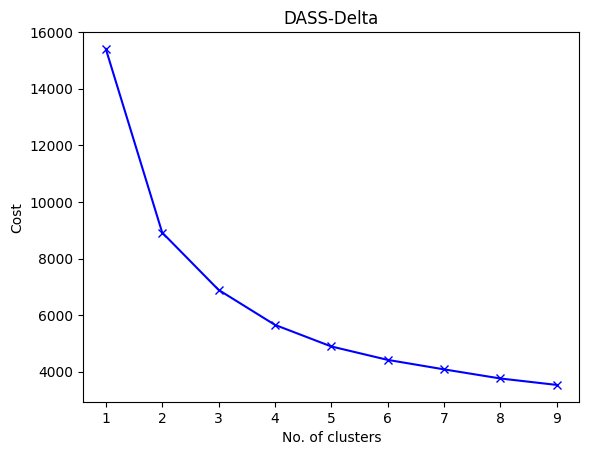

In [ ]:
elbow_method_kmeans(df_dass_pretest,"DASS-Pretest")
elbow_method_kmeans(df_dass_posttest,"DASS-Posttest")
elbow_method_kmeans(df_dass_delta,"DASS-Delta")

Elbow method digunakan untuk menentukan jumlah cluster terbaik dalam melakukan clustering. Pada hasil diatas untuk faktor afektif DASS terhadap data ujian, jumlah cluster terbaik adalah 3  

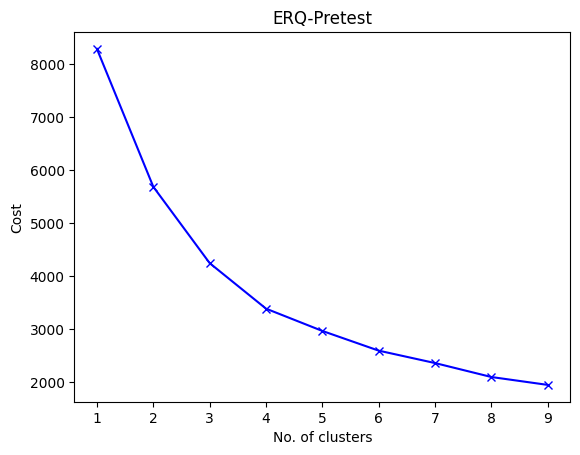

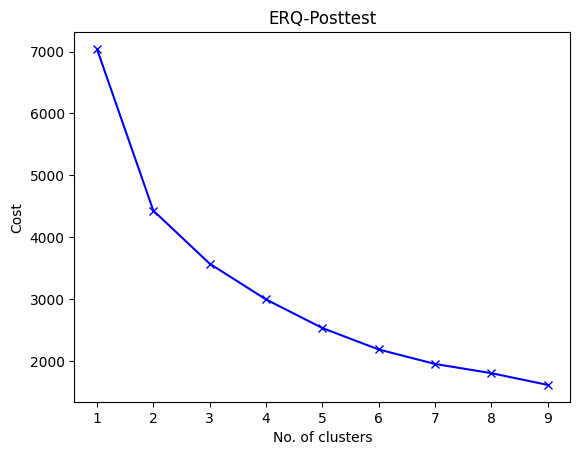

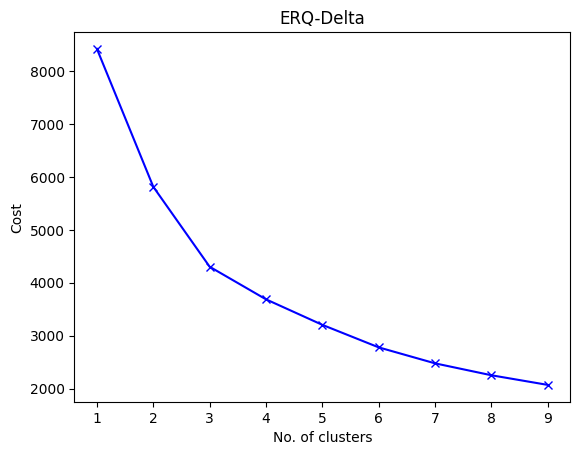

In [ ]:
elbow_method_kmeans(df_erq_pretest,"ERQ-Pretest")
elbow_method_kmeans(df_erq_posttest,"ERQ-Posttest")
elbow_method_kmeans(df_erq_delta,"ERQ-Delta")

Elbow method digunakan untuk menentukan jumlah cluster terbaik dalam melakukan clustering. Pada hasil diatas untuk faktor afektif ERQ terhadap data ujian, jumlah cluster terbaik adalah 3  

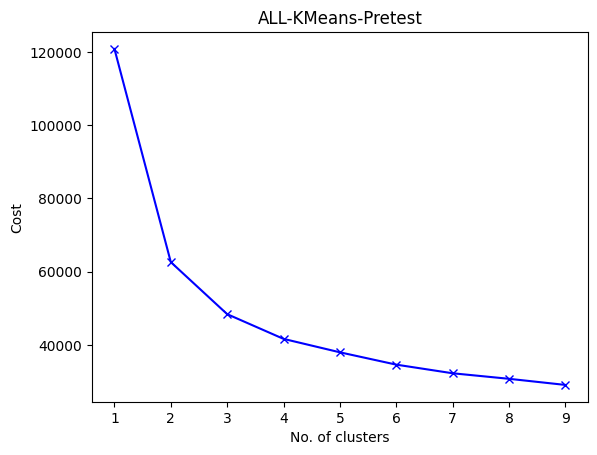

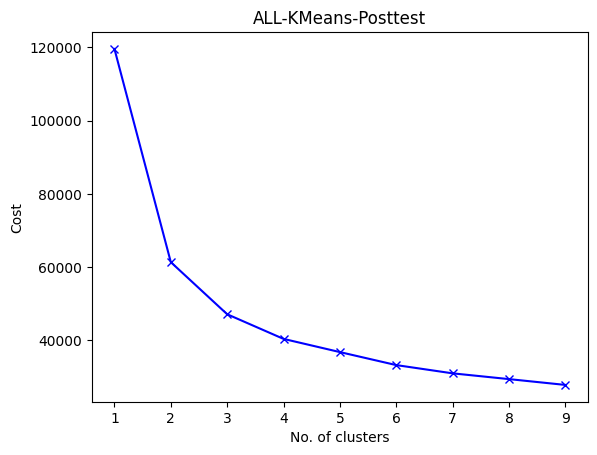

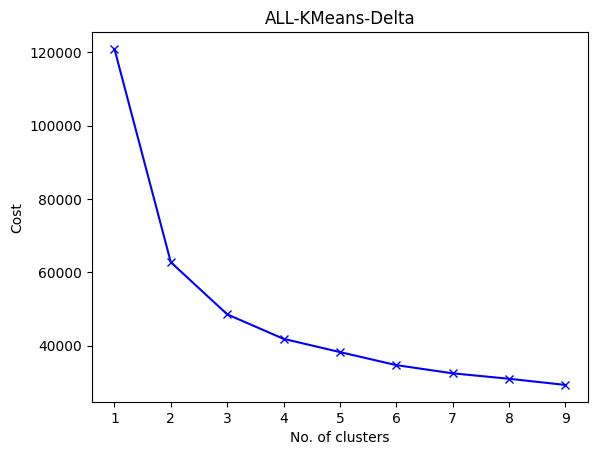

In [ ]:
elbow_method_kmeans(df_ade_pretest,"ALL-KMeans-Pretest")
elbow_method_kmeans(df_ade_posttest,"ALL-KMeans-Posttest")
elbow_method_kmeans(df_ade_delta,"ALL-KMeans-Delta")

Elbow method digunakan untuk menentukan jumlah cluster terbaik dalam melakukan clustering. Pada hasil diatas untuk ketiga faktor afektif AEQ, DASS dan ERQ terhadap data ujian, jumlah cluster terbaik adalah 3  

In [ ]:
# AEQ
print("Silhouette AEQ")
label_aeq_pretest,model_aeq_pretest = kmeans_nilai(df_aeq_pretest,3)
label_aeq_posttest,model_aeq_posttest = kmeans_nilai(df_aeq_posttest,3)
label_aeq_delta,model_aeq_delta = kmeans_nilai(df_aeq_delta,3)

# DASS
print("Silhouette DASS")
label_dass_pretest,model_dass_pretest = kmeans_nilai(df_dass_pretest,3)
label_dass_posttest,model_dass_posttest = kmeans_nilai(df_dass_posttest,3)
label_dass_delta,model_dass_delta = kmeans_nilai(df_dass_delta,3)

# ERQ
print("Silhouette ERQ")
label_erq_pretest,model_erq_pretest = kmeans_nilai(df_erq_pretest,3)
label_erq_posttest,model_erq_posttest = kmeans_nilai(df_erq_posttest,3)
label_erq_delta,model_erq_delta = kmeans_nilai(df_erq_delta,3)

# ALL
print("Silhouette AEQ + DASS + ERQ")
label_ade_kmeans_pretest,model_ade_kmeans_pretest = kmeans_nilai(df_ade_pretest,3)
label_ade_kmeans_posttest,model_ade_kmeans_posttest = kmeans_nilai(df_ade_posttest,3)
label_ade_kmeans_delta,model_ade_kmeans_delta = kmeans_nilai(df_ade_delta,3)

Silhouette AEQ
Silhouette Score : 0.3203772315173546
Silhouette Score : 0.32849408284347914
Silhouette Score : 0.3216177689881257
Silhouette DASS
Silhouette Score : 0.2757869584635
Silhouette Score : 0.3103631427184305
Silhouette Score : 0.27579364312512183
Silhouette ERQ
Silhouette Score : 0.28497662767649673
Silhouette Score : 0.25165083952043454
Silhouette Score : 0.2951725359939114
Silhouette AEQ + DASS + ERQ
Silhouette Score : 0.28171435963448543
Silhouette Score : 0.28492546575046684
Silhouette Score : 0.28204363170190894


In [ ]:
#Memasukkan seluruh hasil KMeans-nilai ke dalam dictionary untuk di visualisasikan 

#Memasukan label AEQ ke dalam dict
label_aeq_kmeans_nilai = {}
label_aeq_kmeans_nilai.update({'AEQ to Pretest':label_aeq_pretest})
label_aeq_kmeans_nilai.update({'AEQ to Posttest':label_aeq_posttest})
label_aeq_kmeans_nilai.update({'AEQ to Delta':label_aeq_delta})
#Memasukan model AEQ ke dalam dict
model_aeq_kmeans_nilai = {}
model_aeq_kmeans_nilai.update({'AEQ to Pretest':model_aeq_pretest})
model_aeq_kmeans_nilai.update({'AEQ to Posttest':model_aeq_posttest})
model_aeq_kmeans_nilai.update({'AEQ to Delta':model_aeq_delta})

#Memasukan label DASS ke dalam dict
label_dass_kmeans_nilai = {}
label_dass_kmeans_nilai.update({'DASS to Pretest':label_dass_pretest})
label_dass_kmeans_nilai.update({'DASS to Posttest':label_dass_posttest})
label_dass_kmeans_nilai.update({'DASS to Delta':label_dass_delta})
#Memasukan model DASS ke dalam dict
model_dass_kmeans_nilai = {}
model_dass_kmeans_nilai.update({'DASS to Pretest':model_dass_pretest})
model_dass_kmeans_nilai.update({'DASS to Posttest':model_dass_posttest})
model_dass_kmeans_nilai.update({'DASS to Delta':model_dass_delta})

#Memasukan label ERQ ke dalam dict
label_erq_kmeans_nilai = {}
label_erq_kmeans_nilai.update({'ERQ to Pretest':label_erq_pretest})
label_erq_kmeans_nilai.update({'ERQ to Posttest':label_erq_posttest})
label_erq_kmeans_nilai.update({'ERQ to Delta':label_erq_delta})
#Memasukan model ERQ ke dalam dict
model_erq_kmeans_nilai = {}
model_erq_kmeans_nilai.update({'ERQ to Pretest':model_erq_pretest})
model_erq_kmeans_nilai.update({'ERQ to Posttest':model_erq_posttest})
model_erq_kmeans_nilai.update({'ERQ to Delta':model_erq_delta})

#Memasukan label ADE ke dalam dict
label_ade_kmeans_nilai = {}
label_ade_kmeans_nilai.update({'ADE to Pretest':label_ade_kmeans_pretest})
label_ade_kmeans_nilai.update({'ADE to Posttest':label_ade_kmeans_posttest})
label_ade_kmeans_nilai.update({'ADE to Delta':label_ade_kmeans_delta})
#Memasukan model ADE ke dalam dict
model_ade_kmeans_nilai = {}
model_ade_kmeans_nilai.update({'ADE to Pretest':model_ade_kmeans_pretest})
model_ade_kmeans_nilai.update({'ADE to Posttest':model_ade_kmeans_posttest})
model_ade_kmeans_nilai.update({'ADE to Delta':model_ade_kmeans_delta})

In [ ]:
# Mengubah label aeq dari numerik menjadi label kategorikal
# AEQ Emotion Scale
# Emotion - Positive
# 12 - 28 = low
# 29 - 44 = Moderate
# 45 - 60 = High

df_aeq_nilai['Class_Positive'] = np.where(df_aeq_nilai['Class_Positive'].between(12,28), "Low", 
    np.where(df_aeq_nilai['Class_Positive'].between(29,44), "Moderate",
    np.where(df_aeq_nilai['Class_Positive'].between(45,60), "High", df_aeq_nilai['Class_Positive'])))
    
df_aeq_nilai['Learn_Positive'] = np.where(df_aeq_nilai['Learn_Positive'].between(12,28), "Low", 
    np.where(df_aeq_nilai['Learn_Positive'].between(29,44), "Moderate",
    np.where(df_aeq_nilai['Learn_Positive'].between(45,60), "High", df_aeq_nilai['Learn_Positive'])))

# Emotion - Negative
# Class - Negative
# 20 - 46 = Low
# 47 -  73 = Moderate
# 74 - 100 = Tinggi

df_aeq_nilai['Class_Negative'] = np.where(df_aeq_nilai['Class_Negative'].between(20,46), "Low", 
    np.where(df_aeq_nilai['Class_Negative'].between(47,73), "Moderate",
    np.where(df_aeq_nilai['Class_Negative'].between(74,100), "High", df_aeq_nilai['Class_Negative'])))

df_aeq_nilai['Learn_Negative'] = np.where(df_aeq_nilai['Learn_Negative'].between(20,46), "Low", 
    np.where(df_aeq_nilai['Learn_Negative'].between(47,73), "Moderate",
    np.where(df_aeq_nilai['Learn_Negative'].between(74,100), "High", df_aeq_nilai['Learn_Negative'])))

In [ ]:
# mengubah label dass dari numerik menjadi label kategorikal

# Depression
df_dass_nilai['Depression'] = np.where(df_dass_nilai['Depression'].between(0,9), "Normal", 
    np.where(df_dass_nilai['Depression'].between(10,13), "Mild",
    np.where(df_dass_nilai['Depression'].between(14,20), "Moderate",
    np.where(df_dass_nilai['Depression'].between(21,27), "Severe",
    np.where(df_dass_nilai['Depression'] >= 28, "Extremely severe", df_dass_nilai['Depression'])))))

# Anxiety
df_dass_nilai['Anxiety'] = np.where(df_dass_nilai['Anxiety'].between(0,7), "Normal",
    np.where(df_dass_nilai['Anxiety'].between(8,9), "Mild",
    np.where(df_dass_nilai['Anxiety'].between(10,14), "Moderate",
    np.where(df_dass_nilai['Anxiety'].between(15,19), "Severe", 
    np.where(df_dass_nilai['Anxiety'] >= 20, "Extremely severe", df_dass_nilai['Anxiety'])))))

# Stress
df_dass_nilai['Stress'] = np.where(df_dass_nilai['Stress'].between(0,14), "Normal", 
    np.where(df_dass_nilai['Stress'].between(15,18), "Mild", 
    np.where(df_dass_nilai['Stress'].between(19,25), "Moderate", 
    np.where(df_dass_nilai['Stress'].between(26,33), "Severe", 
    np.where(df_dass_nilai['Stress'] >= 34, "Extremely severe", df_dass_nilai['Stress'])))))

In [ ]:
# mengubah label erq dari numerik menjadi label kategorikal
# ERQ Emotion Scale

# CRF
# 6 - 18=  Rendah 
# 19 - 30 Sedang 
# 31 - 42 = Tinggi

# CRF
df_erq_nilai['CRF'] = np.where(df_erq_nilai['CRF'].between(6,18), "Low", 
    np.where(df_erq_nilai['CRF'].between(19,30), "Moderate",
    np.where(df_erq_nilai['CRF'].between(31,42), "High", df_erq_nilai['CRF'])))

# ESF
# 20 - 40= Low
# 41- 60 = Moderate
# 61 - 80 = Tinggi

# ESF
df_erq_nilai['ESF'] = np.where(df_erq_nilai['ESF'].between(4,12), "Low",
    np.where(df_erq_nilai['ESF'].between(13,20), "Moderate",
    np.where(df_erq_nilai['ESF'].between(21,28), "High", df_erq_nilai['ESF'])))

In [ ]:
# Menggabungkan hasil clustering ke dalam categorical dataframe
df_aeq_pretest_result = df_aeq_nilai.copy()
df_aeq_pretest_result['nilai_pretest'] = df_nilai_new.iloc[:,2]
df_aeq_pretest_result['Cluster'] = label_aeq_pretest

df_aeq_posttest_result = df_aeq_nilai.copy()
df_aeq_posttest_result['nilai_posttest'] = df_nilai_new.iloc[:,3]
df_aeq_posttest_result['Cluster'] = label_aeq_posttest

df_aeq_delta_result = df_aeq_nilai.copy()
df_aeq_delta_result['delta'] = df_nilai_new.iloc[:,4]
df_aeq_delta_result['Cluster'] = label_aeq_delta

print('AEQ-Pretest\n', np.unique(label_aeq_pretest,return_counts=True))
print('AEQ-Posttest\n', np.unique(label_aeq_posttest,return_counts=True))
print('AEQ-Delta\n', np.unique(label_aeq_delta,return_counts=True))

AEQ-Pretest
 (array([0, 1, 2], dtype=int32), array([88, 68, 46]))
AEQ-Posttest
 (array([0, 1, 2], dtype=int32), array([88, 68, 46]))
AEQ-Delta
 (array([0, 1, 2], dtype=int32), array([89, 46, 67]))


In [ ]:
# Menggabungkan hasil clustering ke dalam categorical dataframe
df_dass_pretest_result = df_dass_nilai.copy()
df_dass_pretest_result['nilai_pretest'] = df_nilai_new.iloc[:,2]
df_dass_pretest_result['Cluster'] = label_dass_pretest

df_dass_posttest_result = df_dass_nilai.copy()
df_dass_posttest_result['nilai_posttest'] = df_nilai_new.iloc[:,3]
df_dass_posttest_result['Cluster'] = label_dass_posttest

df_dass_delta_result = df_dass_nilai.copy()
df_dass_delta_result['delta'] = df_nilai_new.iloc[:,4]
df_dass_delta_result['Cluster'] = label_dass_delta

print('DASS-Pretest\n', np.unique(label_dass_pretest,return_counts=True))
print('DASS-Posttest\n', np.unique(label_dass_posttest,return_counts=True))
print('DASS-Delta\n', np.unique(label_dass_delta,return_counts=True))

DASS-Pretest
 (array([0, 1, 2], dtype=int32), array([63, 94, 45]))
DASS-Posttest
 (array([0, 1, 2], dtype=int32), array([98, 63, 41]))
DASS-Delta
 (array([0, 1, 2], dtype=int32), array([42, 63, 97]))


In [ ]:
# Menggabungkan hasil clustering ke dalam original dataframe
df_erq_pretest_result = df_erq_nilai.copy()
df_erq_pretest_result['nilai_pretest'] = df_nilai_new.iloc[:,2]
df_erq_pretest_result['Cluster'] = label_erq_pretest

df_erq_posttest_result = df_erq_nilai.copy()
df_erq_posttest_result['nilai_posttest'] = df_nilai_new.iloc[:,3]
df_erq_posttest_result['Cluster'] = label_erq_posttest

df_erq_delta_result = df_erq_nilai.copy()
df_erq_delta_result['delta'] = df_nilai_new.iloc[:,4]
df_erq_delta_result['Cluster'] = label_erq_delta

print('ERQ-Pretest\n', np.unique(label_erq_pretest,return_counts=True))
print('ERQ-Posttest\n', np.unique(label_erq_posttest,return_counts=True))
print('ERQ-Delta\n', np.unique(label_erq_delta,return_counts=True))

ERQ-Pretest
 (array([0, 1, 2], dtype=int32), array([75, 59, 68]))
ERQ-Posttest
 (array([0, 1, 2], dtype=int32), array([76, 57, 69]))
ERQ-Delta
 (array([0, 1, 2], dtype=int32), array([74, 75, 53]))


In [ ]:
# Menggabungkan hasil clustering ke dalam original dataframe
df_ade_result_pretest_kmeans = pd.concat([df_aeq_nilai,df_dass_nilai,df_erq_nilai],axis=1)
df_ade_result_pretest_kmeans['nilai_pretest'] = df_nilai_new.iloc[:,2]
df_ade_result_pretest_kmeans['Cluster'] = label_ade_kmeans_pretest

df_ade_result_posttest_kmeans = pd.concat([df_aeq_nilai,df_dass_nilai,df_erq_nilai],axis=1)
df_ade_result_posttest_kmeans['nilai_posttest'] = df_nilai_new.iloc[:,3]
df_ade_result_posttest_kmeans['Cluster'] = label_ade_kmeans_posttest

df_ade_result_delta_kmeans = pd.concat([df_aeq_nilai,df_dass_nilai,df_erq_nilai],axis=1)
df_ade_result_delta_kmeans['delta'] = df_nilai_new.iloc[:,4]
df_ade_result_delta_kmeans['Cluster'] = label_ade_kmeans_delta

print('ALL-KMeans-Pretest\n', np.unique(label_ade_kmeans_pretest,return_counts=True))
print('ALL-KMeans-Posttest\n', np.unique(label_ade_kmeans_posttest,return_counts=True))
print('ALL-KMeans-Delta\n', np.unique(label_ade_kmeans_delta,return_counts=True))

ALL-KMeans-Pretest
 (array([0, 1, 2], dtype=int32), array([96, 41, 65]))
ALL-KMeans-Posttest
 (array([0, 1, 2], dtype=int32), array([69, 41, 92]))
ALL-KMeans-Delta
 (array([0, 1, 2], dtype=int32), array([96, 41, 65]))


#### Gaussian Mixture

In [ ]:
def gaussian_nilai(x_clus,cluster):
    model_gaussian = GaussianMixture(n_components=cluster,random_state=1)
    model_gaussian.fit(x_clus)
    label_gaussian = model_gaussian.predict(x_clus)
    print('Silhouette Score :',silhouette_score(x_clus,label_gaussian))

    return label_gaussian,model_gaussian

In [ ]:
# AEQ
label_gaussian_aeq_pretest,model_gaussian_aeq_pretest = gaussian_nilai(df_aeq_pretest,3)
label_gaussian_aeq_posttest,model_gaussian_aeq_posttest = gaussian_nilai(df_aeq_posttest,3)
label_gaussian_aeq_delta,model_gaussian_aeq_delta = gaussian_nilai(df_aeq_delta,3)

# DASS
label_gaussian_dass_pretest,model_gaussian_dass_pretest = gaussian_nilai(df_dass_pretest,3)
label_gaussian_dass_posttest,model_gaussian_dass_posttest = gaussian_nilai(df_dass_posttest,3)
label_gaussian_dass_delta,model_gaussian_dass_delta = gaussian_nilai(df_dass_delta,3)

# ERQ
label_gaussian_erq_pretest,model_gaussian_erq_pretest = gaussian_nilai(df_erq_pretest,3)
label_gaussian_erq_posttest,model_gaussian_erq_posttest = gaussian_nilai(df_erq_posttest,3)
label_gaussian_erq_delta,model_gaussian_erq_delta = gaussian_nilai(df_erq_delta,3)

# ALL
label_gaussian_ade_pretest,model_gaussian_ade_pretest = gaussian_nilai(df_ade_pretest,3)
label_gaussian_ade_posttest,model_gaussian_ade_posttest = gaussian_nilai(df_ade_posttest,3)
label_gaussian_ade_delta,model_gaussian_ade_delta = gaussian_nilai(df_ade_delta,3)

Silhouette Score : 0.080529404981969
Silhouette Score : 0.27112656833401444
Silhouette Score : 0.2773179747997034
Silhouette Score : 0.24746588170537492
Silhouette Score : 0.19453198301511185
Silhouette Score : 0.1801097058650209
Silhouette Score : 0.235946204384373
Silhouette Score : 0.24085455270529232
Silhouette Score : 0.2622659318831152
Silhouette Score : 0.1703265926150249
Silhouette Score : 0.19652057308437562
Silhouette Score : 0.1917459187734787


In [ ]:
#Memasukkan seluruh hasil Gaussian-nilai ke dalam dictionary untuk di visualisasikan 

#Memasukan label AEQ ke dalam dict
label_aeq_gaussian_nilai = {}
label_aeq_gaussian_nilai.update({'AEQ to Pretest':label_gaussian_aeq_pretest})
label_aeq_gaussian_nilai.update({'AEQ to Posttest':label_gaussian_aeq_posttest})
label_aeq_gaussian_nilai.update({'AEQ to Delta':label_gaussian_aeq_delta})
#Memasukan model AEQ ke dalam dict
model_aeq_gaussian_nilai = {}
model_aeq_gaussian_nilai.update({'AEQ to Pretest':model_gaussian_aeq_pretest})
model_aeq_gaussian_nilai.update({'AEQ to Posttest':model_gaussian_aeq_posttest})
model_aeq_gaussian_nilai.update({'AEQ to Delta':model_gaussian_aeq_delta})

#Memasukan label DASS ke dalam dict
label_dass_gaussian_nilai = {}
label_dass_gaussian_nilai.update({'DASS to Pretest':label_gaussian_dass_pretest})
label_dass_gaussian_nilai.update({'DASS to Posttest':label_gaussian_dass_posttest})
label_dass_gaussian_nilai.update({'DASS to Delta':label_gaussian_dass_delta})
#Memasukan model DASS ke dalam dict
model_dass_gaussian_nilai = {}
model_dass_gaussian_nilai.update({'DASS to Pretest':model_gaussian_dass_pretest})
model_dass_gaussian_nilai.update({'DASS to Posttest':model_gaussian_dass_posttest})
model_dass_gaussian_nilai.update({'DASS to Delta':model_gaussian_dass_delta})

#Memasukan label ERQ ke dalam dict
label_erq_gaussian_nilai = {}
label_erq_gaussian_nilai.update({'ERQ to Pretest':label_gaussian_erq_pretest})
label_erq_gaussian_nilai.update({'ERQ to Posttest':label_gaussian_erq_posttest})
label_erq_gaussian_nilai.update({'ERQ to Delta':label_gaussian_erq_delta})
#Memasukan model ERQ ke dalam dict
model_erq_gaussian_nilai = {}
model_erq_gaussian_nilai.update({'ERQ to Pretest':model_gaussian_erq_pretest})
model_erq_gaussian_nilai.update({'ERQ to Posttest':model_gaussian_erq_posttest})
model_erq_gaussian_nilai.update({'ERQ to Delta':model_gaussian_erq_delta})

#Memasukan label ADE ke dalam dict
label_ade_gaussian_nilai = {}
label_ade_gaussian_nilai.update({'ADE to Pretest':label_gaussian_ade_pretest})
label_ade_gaussian_nilai.update({'ADE to Posttest':label_gaussian_ade_posttest})
label_ade_gaussian_nilai.update({'ADE to Delta':label_gaussian_ade_delta})
#Memasukan model ADE ke dalam dict
model_ade_gaussian_nilai = {}
model_ade_gaussian_nilai.update({'ADE to Pretest':model_gaussian_ade_pretest})
model_ade_gaussian_nilai.update({'ADE to Posttest':model_gaussian_ade_posttest})
model_ade_gaussian_nilai.update({'ADE to Delta':model_gaussian_ade_delta})

In [ ]:
# Menggabungkan hasil clustering ke dalam original dataframe
df_aeq_pretest_result_gaussian = df_aeq_nilai.copy()
df_aeq_pretest_result_gaussian['nilai_pretest'] = df_nilai_new.iloc[:,2]
df_aeq_pretest_result_gaussian['Cluster'] = label_gaussian_aeq_pretest

df_aeq_posttest_result_gaussian = df_aeq_nilai.copy()
df_aeq_posttest_result_gaussian['nilai_posttest'] = df_nilai_new.iloc[:,3]
df_aeq_posttest_result_gaussian['Cluster'] = label_gaussian_aeq_posttest

df_aeq_delta_result_gaussian = df_aeq_nilai.copy()
df_aeq_delta_result_gaussian['delta'] = df_nilai_new.iloc[:,4]
df_aeq_delta_result_gaussian['Cluster'] = label_gaussian_aeq_delta

print('AEQ-Gaussian-Pretest\n', np.unique(label_gaussian_aeq_pretest,return_counts=True))
print('AEQ-Gaussian-Posttest\n', np.unique(label_gaussian_aeq_posttest,return_counts=True))
print('AEQ-Gaussian-Delta\n', np.unique(label_gaussian_aeq_delta,return_counts=True))

AEQ-Gaussian-Pretest
 (array([0, 1, 2]), array([115,  35,  52]))
AEQ-Gaussian-Posttest
 (array([0, 1, 2]), array([102,  62,  38]))
AEQ-Gaussian-Delta
 (array([0, 1, 2]), array([92, 67, 43]))


In [ ]:
# Menggabungkan hasil clustering ke dalam original dataframe
df_dass_pretest_result_gaussian = df_dass_nilai.copy()
df_dass_pretest_result_gaussian['nilai_pretest'] = df_nilai_new.iloc[:,2]
df_dass_pretest_result_gaussian['Cluster'] = label_gaussian_dass_pretest

df_dass_posttest_result_gaussian = df_dass_nilai.copy()
df_dass_posttest_result_gaussian['nilai_posttest'] = df_nilai_new.iloc[:,3]
df_dass_posttest_result_gaussian['Cluster'] = label_gaussian_dass_posttest

df_dass_delta_result_gaussian = df_dass_nilai.copy()
df_dass_delta_result_gaussian['delta'] = df_nilai_new.iloc[:,4]
df_dass_delta_result_gaussian['Cluster'] = label_gaussian_dass_delta

print('DASS-Pretest\n', np.unique(label_gaussian_dass_pretest,return_counts=True))
print('DASS-Posttest\n', np.unique(label_gaussian_dass_posttest,return_counts=True))
print('DASS-Delta\n', np.unique(label_gaussian_dass_delta,return_counts=True))

DASS-Pretest
 (array([0, 1, 2]), array([59, 86, 57]))
DASS-Posttest
 (array([0, 1, 2]), array([102,  64,  36]))
DASS-Delta
 (array([0, 1, 2]), array([ 36,  52, 114]))


In [ ]:
# Menggabungkan hasil clustering ke dalam original dataframe
df_erq_pretest_result_gaussian = df_erq_nilai.copy()
df_erq_pretest_result_gaussian['nilai_pretest'] = df_nilai_new.iloc[:,2]
df_erq_pretest_result_gaussian['Cluster'] = label_gaussian_erq_pretest

df_erq_posttest_result_gaussian = df_erq_nilai.copy()
df_erq_posttest_result_gaussian['nilai_posttest'] = df_nilai_new.iloc[:,3]
df_erq_posttest_result_gaussian['Cluster'] = label_gaussian_erq_posttest

df_erq_delta_result_gaussian = df_erq_nilai.copy()
df_erq_delta_result_gaussian['delta'] = df_nilai_new.iloc[:,4]
df_erq_delta_result_gaussian['Cluster'] = label_gaussian_erq_delta

print('ERQ-Pretest\n', np.unique(label_gaussian_erq_pretest,return_counts=True))
print('ERQ-Posttest\n', np.unique(label_gaussian_erq_posttest,return_counts=True))
print('ERQ-Delta\n', np.unique(label_gaussian_erq_delta,return_counts=True))

ERQ-Pretest
 (array([0, 1, 2]), array([69, 76, 57]))
ERQ-Posttest
 (array([0, 1, 2]), array([48, 66, 88]))
ERQ-Delta
 (array([0, 1, 2]), array([75, 42, 85]))


In [ ]:
# Menggabungkan hasil clustering ke dalam original dataframe
df_ade_pretest_result_gaussian = pd.concat([df_aeq_nilai,df_dass_nilai,df_erq_nilai],axis = 1)
df_ade_pretest_result_gaussian['nilai_pretest'] = df_nilai_new.iloc[:,2]
df_ade_pretest_result_gaussian['Cluster'] = label_gaussian_ade_pretest

df_ade_posttest_result_gaussian = pd.concat([df_aeq_nilai,df_dass_nilai,df_erq_nilai],axis = 1)
df_ade_posttest_result_gaussian['nilai_posttest'] = df_nilai_new.iloc[:,3]
df_ade_posttest_result_gaussian['Cluster'] = label_gaussian_ade_posttest

df_ade_delta_result_gaussian = pd.concat([df_aeq_nilai,df_dass_nilai,df_erq_nilai],axis = 1)
df_ade_delta_result_gaussian['delta'] = df_nilai_new.iloc[:,4]
df_ade_delta_result_gaussian['Cluster'] = label_gaussian_ade_delta

print('ALL-Pretest-Gaussian\n', np.unique(label_gaussian_ade_pretest,return_counts=True))
print('ALL-Pretest-Gaussian\n', np.unique(label_gaussian_ade_posttest,return_counts=True))
print('ALL-Pretest-Gaussian\n', np.unique(label_gaussian_ade_delta,return_counts=True))

ALL-Pretest-Gaussian
 (array([0, 1, 2]), array([72, 38, 92]))
ALL-Pretest-Gaussian
 (array([0, 1, 2]), array([72, 41, 89]))
ALL-Pretest-Gaussian
 (array([0, 1, 2]), array([113,  55,  34]))


#### Fuzzy CMeans

In [ ]:
def fuzzy_nilai(x_clus,cluster):
    model_fuzzy = FCM(n_clusters=cluster,random_state=1)
    model_fuzzy.fit(x_clus.to_numpy())
    label_fuzzy = model_fuzzy.predict(x_clus.to_numpy())
    print('Silhouette Score :',silhouette_score(x_clus,label_fuzzy))

    return label_fuzzy,model_fuzzy

Elbow method digunakan untuk menentukan jumlah cluster terbaik dalam melakukan clustering. Pada hasil diatas untuk ketiga faktor afektif AEQ, DASS dan ERQ terhadap data ujian, jumlah cluster terbaik adalah 3  

In [ ]:
# AEQ
label_fuzzy_aeq_pretest,model_fuzzy_aeq_pretest = fuzzy_nilai(df_aeq_pretest,3)
label_fuzzy_aeq_posttest,model_fuzzy_aeq_posttest = fuzzy_nilai(df_aeq_posttest,3)
label_fuzzy_aeq_delta,model_fuzzy_aeq_delta = fuzzy_nilai(df_aeq_delta,3)

# DASS
label_fuzzy_dass_pretest,model_fuzzy_dass_pretest = fuzzy_nilai(df_dass_pretest,3)
label_fuzzy_dass_posttest,model_fuzzy_dass_posttest = fuzzy_nilai(df_dass_posttest,3)
label_fuzzy_dass_delta,model_fuzzy_dass_delta = fuzzy_nilai(df_dass_delta,3)

# ERQ
label_fuzzy_erq_pretest,model_fuzzy_erq_pretest = fuzzy_nilai(df_erq_pretest,3)
label_fuzzy_erq_posttest,model_fuzzy_erq_posttest = fuzzy_nilai(df_erq_posttest,3)
label_fuzzy_erq_delta,model_fuzzy_erq_delta = fuzzy_nilai(df_erq_delta,3)

# ALL
label_fuzzy_ade_pretest,model_fuzzy_ade_pretest = fuzzy_nilai(df_ade_pretest,3)
label_fuzzy_ade_posttest,model_fuzzy_ade_posttest = fuzzy_nilai(df_ade_posttest,3)
label_fuzzy_ade_delta,model_fuzzy_ade_delta = fuzzy_nilai(df_ade_delta,3)

Silhouette Score : 0.3107983466699355
Silhouette Score : 0.32121882544139213
Silhouette Score : 0.31129549901108006
Silhouette Score : 0.2702585241719632
Silhouette Score : 0.3031186699001469
Silhouette Score : 0.26706767259262576
Silhouette Score : 0.2660367956563787
Silhouette Score : 0.2433148791942218
Silhouette Score : 0.289226061417968
Silhouette Score : 0.27036308784492447
Silhouette Score : 0.27510662021857674
Silhouette Score : 0.2703822933687401


In [ ]:
#Memasukkan seluruh hasil Fuzzy-nilai ke dalam dictionary untuk di visualisasikan 

#Memasukan label AEQ ke dalam dict
label_aeq_fuzzy_nilai = {}
label_aeq_fuzzy_nilai.update({'AEQ to Pretest':label_fuzzy_aeq_pretest})
label_aeq_fuzzy_nilai.update({'AEQ to Posttest':label_fuzzy_aeq_posttest})
label_aeq_fuzzy_nilai.update({'AEQ to Delta':label_fuzzy_aeq_delta})
#Memasukan model AEQ ke dalam dict
model_aeq_fuzzy_nilai = {}
model_aeq_fuzzy_nilai.update({'AEQ to Pretest':model_fuzzy_aeq_pretest})
model_aeq_fuzzy_nilai.update({'AEQ to Posttest':model_fuzzy_aeq_posttest})
model_aeq_fuzzy_nilai.update({'AEQ to Delta':model_fuzzy_aeq_delta})

#Memasukan label DASS ke dalam dict
label_dass_fuzzy_nilai = {}
label_dass_fuzzy_nilai.update({'DASS to Pretest':label_fuzzy_dass_pretest})
label_dass_fuzzy_nilai.update({'DASS to Posttest':label_fuzzy_dass_posttest})
label_dass_fuzzy_nilai.update({'DASS to Delta':label_fuzzy_dass_delta})
#Memasukan model DASS ke dalam dict
model_dass_fuzzy_nilai = {}
model_dass_fuzzy_nilai.update({'DASS to Pretest':model_fuzzy_dass_pretest})
model_dass_fuzzy_nilai.update({'DASS to Posttest':model_fuzzy_dass_posttest})
model_dass_fuzzy_nilai.update({'DASS to Delta':model_fuzzy_dass_delta})

#Memasukan label ERQ ke dalam dict
label_erq_fuzzy_nilai = {}
label_erq_fuzzy_nilai.update({'ERQ to Pretest':label_fuzzy_erq_pretest})
label_erq_fuzzy_nilai.update({'ERQ to Posttest':label_fuzzy_erq_posttest})
label_erq_fuzzy_nilai.update({'ERQ to Delta':label_fuzzy_erq_delta})
#Memasukan model ERQ ke dalam dict
model_erq_fuzzy_nilai = {}
model_erq_fuzzy_nilai.update({'ERQ to Pretest':model_fuzzy_erq_pretest})
model_erq_fuzzy_nilai.update({'ERQ to Posttest':model_fuzzy_erq_posttest})
model_erq_fuzzy_nilai.update({'ERQ to Delta':model_fuzzy_erq_delta})

#Memasukan label ADE ke dalam dict
label_ade_fuzzy_nilai = {}
label_ade_fuzzy_nilai.update({'ADE to Pretest':label_fuzzy_ade_pretest})
label_ade_fuzzy_nilai.update({'ADE to Posttest':label_fuzzy_ade_posttest})
label_ade_fuzzy_nilai.update({'ADE to Delta':label_fuzzy_ade_delta})
#Memasukan model ADE ke dalam dict
model_ade_fuzzy_nilai = {}
model_ade_fuzzy_nilai.update({'ADE to Pretest':model_fuzzy_ade_pretest})
model_ade_fuzzy_nilai.update({'ADE to Posttest':model_fuzzy_ade_posttest})
model_ade_fuzzy_nilai.update({'ADE to Delta':model_fuzzy_ade_delta})

In [ ]:
# Menggabungkan hasil clustering ke dalam original dataframe
df_aeq_pretest_result_fuzzy = df_aeq_nilai.copy()
df_aeq_pretest_result_fuzzy['nilai_pretest'] = df_nilai_new.iloc[:,2]
df_aeq_pretest_result_fuzzy['Cluster'] = label_fuzzy_aeq_pretest

df_aeq_posttest_result_fuzzy = df_aeq_nilai.copy()
df_aeq_posttest_result_fuzzy['nilai_posttest'] = df_nilai_new.iloc[:,3]
df_aeq_posttest_result_fuzzy['Cluster'] = label_fuzzy_aeq_posttest

df_aeq_delta_result_fuzzy = df_aeq_nilai.copy()
df_aeq_delta_result_fuzzy['delta'] = df_nilai_new.iloc[:,4]
df_aeq_delta_result_fuzzy['Cluster'] = label_fuzzy_aeq_delta

print('AEQ-Fuzzy-Pretest\n', np.unique(label_fuzzy_aeq_pretest,return_counts=True))
print('AEQ-Fuzzy-Posttest\n', np.unique(label_fuzzy_aeq_posttest,return_counts=True))
print('AEQ-Fuzzy-Delta\n', np.unique(label_fuzzy_aeq_delta,return_counts=True))

AEQ-Fuzzy-Pretest
 (array([0, 1, 2]), array([83, 53, 66]))
AEQ-Fuzzy-Posttest
 (array([0, 1, 2]), array([85, 51, 66]))
AEQ-Fuzzy-Delta
 (array([0, 1, 2]), array([83, 53, 66]))


In [ ]:
# Menggabungkan hasil clustering ke dalam original dataframe
df_dass_pretest_result_fuzzy = df_dass_nilai.copy()
df_dass_pretest_result_fuzzy['nilai_pretest'] = df_nilai_new.iloc[:,2]
df_dass_pretest_result_fuzzy['Cluster'] = label_fuzzy_dass_pretest

df_dass_posttest_result_fuzzy = df_dass_nilai.copy()
df_dass_posttest_result_fuzzy['nilai_posttest'] = df_nilai_new.iloc[:,3]
df_dass_posttest_result_fuzzy['Cluster'] = label_fuzzy_dass_posttest

df_dass_delta_result_fuzzy = df_dass_nilai.copy()
df_dass_delta_result_fuzzy['delta'] = df_nilai_new.iloc[:,4]
df_dass_delta_result_fuzzy['Cluster'] = label_fuzzy_dass_delta

print('DASS-Pretest\n', np.unique(label_fuzzy_dass_pretest,return_counts=True))
print('DASS-Posttest\n', np.unique(label_fuzzy_dass_posttest,return_counts=True))
print('DASS-Delta\n', np.unique(label_fuzzy_dass_delta,return_counts=True))

DASS-Pretest
 (array([0, 1, 2]), array([89, 63, 50]))
DASS-Posttest
 (array([0, 1, 2]), array([91, 63, 48]))
DASS-Delta
 (array([0, 1, 2]), array([88, 63, 51]))


In [ ]:
# Menggabungkan hasil clustering ke dalam original dataframe
df_erq_pretest_result_fuzzy = df_erq_nilai.copy()
df_erq_pretest_result_fuzzy['nilai_pretest'] = df_nilai_new.iloc[:,2]
df_erq_pretest_result_fuzzy['Cluster'] = label_fuzzy_erq_pretest

df_erq_posttest_result_fuzzy = df_erq_nilai.copy()
df_erq_posttest_result_fuzzy['nilai_posttest'] = df_nilai_new.iloc[:,3]
df_erq_posttest_result_fuzzy['Cluster'] = label_fuzzy_erq_posttest

df_erq_delta_result_fuzzy = df_erq_nilai.copy()
df_erq_delta_result_fuzzy['delta'] = df_nilai_new.iloc[:,4]
df_erq_delta_result_fuzzy['Cluster'] = label_fuzzy_erq_delta

print('ERQ-Pretest\n', np.unique(label_fuzzy_erq_pretest,return_counts=True))
print('ERQ-Posttest\n', np.unique(label_fuzzy_erq_posttest,return_counts=True))
print('ERQ-Delta\n', np.unique(label_fuzzy_erq_delta,return_counts=True))

ERQ-Pretest
 (array([0, 1, 2]), array([68, 73, 61]))
ERQ-Posttest
 (array([0, 1, 2]), array([55, 76, 71]))
ERQ-Delta
 (array([0, 1, 2]), array([67, 73, 62]))


In [ ]:
# Menggabungkan hasil clustering ke dalam original dataframe
df_ade_pretest_result_fuzzy = pd.concat([df_aeq_nilai,df_dass_nilai,df_erq_nilai],axis=1)
df_ade_pretest_result_fuzzy['nilai_pretest'] = df_nilai_new.iloc[:,2]
df_ade_pretest_result_fuzzy['Cluster'] = label_fuzzy_ade_pretest

df_ade_posttest_result_fuzzy = pd.concat([df_aeq_nilai,df_dass_nilai,df_erq_nilai],axis=1)
df_ade_posttest_result_fuzzy['nilai_posttest'] = df_nilai_new.iloc[:,3]
df_ade_posttest_result_fuzzy['Cluster'] = label_fuzzy_ade_posttest

df_ade_delta_result_fuzzy = pd.concat([df_aeq_nilai,df_dass_nilai,df_erq_nilai],axis=1)
df_ade_delta_result_fuzzy['delta'] = df_nilai_new.iloc[:,4]
df_ade_delta_result_fuzzy['Cluster'] = label_fuzzy_ade_delta

print('ALL-Fuzzy-Pretest\n', np.unique(label_fuzzy_ade_pretest,return_counts=True))
print('ALL-Fuzzy-Posttest\n', np.unique(label_fuzzy_ade_posttest,return_counts=True))
print('ALL-Fuzzy-Delta\n', np.unique(label_fuzzy_ade_delta,return_counts=True))

ALL-Fuzzy-Pretest
 (array([0, 1, 2]), array([89, 48, 65]))
ALL-Fuzzy-Posttest
 (array([0, 1, 2]), array([89, 48, 65]))
ALL-Fuzzy-Delta
 (array([0, 1, 2]), array([89, 48, 65]))


### 3.2.6. Evaluasi Clustering Emotion terhadap Nilai

In [ ]:
# list of df;
# 1. KMEANS
# - df_aeq_pretest_result, df_aeq_posttest_result, df_aeq_delta_result
# - df_dass_pretest_result, df_dass_posttest_result, df_dass_posttest_result
# - df_erq_pretest_result, df_erq_posttest_result, df_erq_delta_result
# - df_ade_result_pretest_kmeans, df_ade_result_posttest_kmeans, df_ade_result_delta_kmeans

# 2. Gaussian
# - df_aeq_pretest_result_gaussian, df_aeq_posttest_result_gaussian, df_aeq_delta_result_gaussian
# - df_dass_pretest_result_gaussian, df_dass_posttest_result_gaussian, df_dass_delta_result_gaussian
# - df_erq_pretest_result_gaussian, df_erq_posttest_result_gaussian, df_erq_delta_result_gaussian
# - df_ade_pretest_result_gaussian, df_ade_posttest_result_gaussian, df_ade_delta_result_gaussian

# 3. Fuzzy
# - df_aeq_pretest_result_fuzzy, df_aeq_posttest_result_fuzzy, df_aeq_delta_result_fuzzy
# - df_dass_pretest_result_fuzzy, df_dass_posttest_result_fuzzy, df_dass_delta_result_fuzzy
# - df_erq_pretest_result_fuzzy, df_erq_posttest_result_fuzzy, df_erq_delta_result_fuzzy
# - df_ade_pretest_result_fuzzy, df_ade_posttest_result_fuzzy, df_ade_delta_result_fuzzy

# 4. Kmodes
# - df_aeq_pretest_result_kmodes, df_aeq_posttest_result_kmodes, df_aeq_delta_result_kmodes
# - df_dass_pretest_result_kmodes, df_dass_posttest_result_kmodes, df_dass_delta_result_kmodes
# - df_erq_pretest_result_kmodes, df_erq_posttest_result_kmodes, df_erq_delta_result_kmodes
# - df_ade_pretest_result_kmodes, df_ade_posttest_result_kmodes, df_ade_delta_result_kmodes

In [ ]:
def hitung_common(df,name):
    print('Most Common values of:',name)
    for clus in range(len(df['Cluster'].unique())):
        convert = df.loc[df['Cluster'] == clus].itertuples(index=False,name="Cluster")
        convert_2 = Counter(convert).most_common(2)
        print(tabulate(convert_2,tablefmt='fancy_grid'))
    print()

def get_clustering_vis_2(y_label,x_clus,model):
    ss = np.random.randint(0,50,50)
    for emotion in y_label.keys():
        plt.figure(figsize=(15,7))
        plt.title(emotion)
        plt.scatter(x_clus[emotion][y_label[emotion] == 0, 0], x_clus[emotion][y_label[emotion] == 0, 1], c='lightgreen',marker='s', edgecolor='black')
        plt.scatter(x_clus[emotion][y_label[emotion] == 1, 0], x_clus[emotion][y_label[emotion] == 1, 1], c='orange',marker='o', edgecolor='black')
        plt.scatter(x_clus[emotion][y_label[emotion] == 2, 0], x_clus[emotion][y_label[emotion] == 2, 1], c='lightblue',marker='v', edgecolor='black')

        plt.show()

#### AEQ

In [ ]:
# KMeans
hitung_common(df_aeq_pretest_result,'AEQ-KMeans-Pretest')
hitung_common(df_aeq_posttest_result,'AEQ-KMeans-Posttest')
hitung_common(df_aeq_delta_result,'AEQ-KMeans-Delta')
# Gaussian
hitung_common(df_aeq_pretest_result_gaussian,'AEQ-Gaussian-Pretest')
hitung_common(df_aeq_posttest_result_gaussian,'AEQ-Gaussian-Posttest')
hitung_common(df_aeq_delta_result_gaussian,'AEQ-Gaussian-Delta')
# Fuzzy
hitung_common(df_aeq_pretest_result_fuzzy,'AEQ-Fuzzy-Pretest')
hitung_common(df_aeq_posttest_result_fuzzy,'AEQ-Fuzzy-Posttest')
hitung_common(df_aeq_delta_result_fuzzy,'AEQ-Fuzzy-Delta')

Most Common values of: AEQ-KMeans-Pretest
╒══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════╕
│ Cluster(Class_Positive='High', Class_Negative='Low', Learn_Positive='High', Learn_Negative='Low', nilai_pretest='High PreTest', Cluster=0)           │ 22 │
├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼────┤
│ Cluster(Class_Positive='High', Class_Negative='Moderate', Learn_Positive='High', Learn_Negative='Moderate', nilai_pretest='High PreTest', Cluster=0) │ 10 │
╘══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╧════╛
╒════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════╕
│ Cluster(Class_

Berikut merupakan hasil pola faktor afektif AEQ yang terbentuk oleh ketiga metode pembelajaran mesin yakni KMeans, Gaussian Mixture dan Fuzzy CMeans. Disini kita dapat mengevaluasi faktor apa saja yang mempengaruhi nilai ujian mahasiswa. Penjabarannya adalah sebagai berikut:
1. Saat menggunakan KMeans, pola faktor afektif AEQ yang mempengaruhi nilai ujian adalah
    POSTLearn | Cluster 0 : 46 | Cluster 1 : 88 | Cluster 2 : 68 (Jumlah mahasiswa per-cluster)

    Cluster 0: Moderate Class Positive, Low Class Negative, Moderate Learn Positive, Low Learn Negative, High PostLearn
    Cluster 1: High Class Positive, Low Class Negative, High Learn Positive, Low Learn Negative, High PostLearn
    Cluster 2: High Class Positive, Moderate Class Negative, High Learn Positive, Moderate Learn Negative, High PostLearn

2. Saat menggunakan Gaussian Mixture, pola faktor afektif AEQ yang mempengaruhi nilai ujian adalah
    POSTLearn | Cluster 0 : 46 | Cluster 1 : 88 | Cluster 2 : 68 (Jumlah mahasiswa per-cluster)

    Cluster 0: Moderate Class Positive, Moderate Class Negative, Moderate Learn Positive, Moderate Learn Negative, High PostLearn
    Cluster 1: High Class Positive, Low Class Negative, High Learn Positive, Low Learn Negative, High PostLearn
    Cluster 2: High Class Positive, Moderate Class Negative, High Learn Positive, Moderate Learn Negative, High PostLearn

3. Saat menggunakan Fuzzy CMeans, pola faktor afektif AEQ yang mempengaruhi nilai ujian adalah
    POSTLearn | Cluster 0 : 65 | Cluster 1 : 63 | Cluster 2 : 74 (Jumlah mahasiswa per-cluster)
    
    Cluster 0: Moderate Class Positive, Low Class Negative, Moderate Learn Positive, Low Learn Negative, High PostLearn
    Cluster 1: Moderate Class Positive, Moderate Class Negative, Moderate Learn Positive, Moderate Learn Negative, High PostLearn
    Cluster 2: High Class Positive, Low Class Negative, High Learn Positive, Low Learn Negative, High PostLearn

In [ ]:
#Convert to numpy
def convert_to_numpy(x):
    for i in x.keys():
        x[i] = x[i].to_numpy()
    return x

In [ ]:
%%capture
convert_to_numpy(X_aeq_nilai)

Clustering KMeans AEQ terhadap Nilai


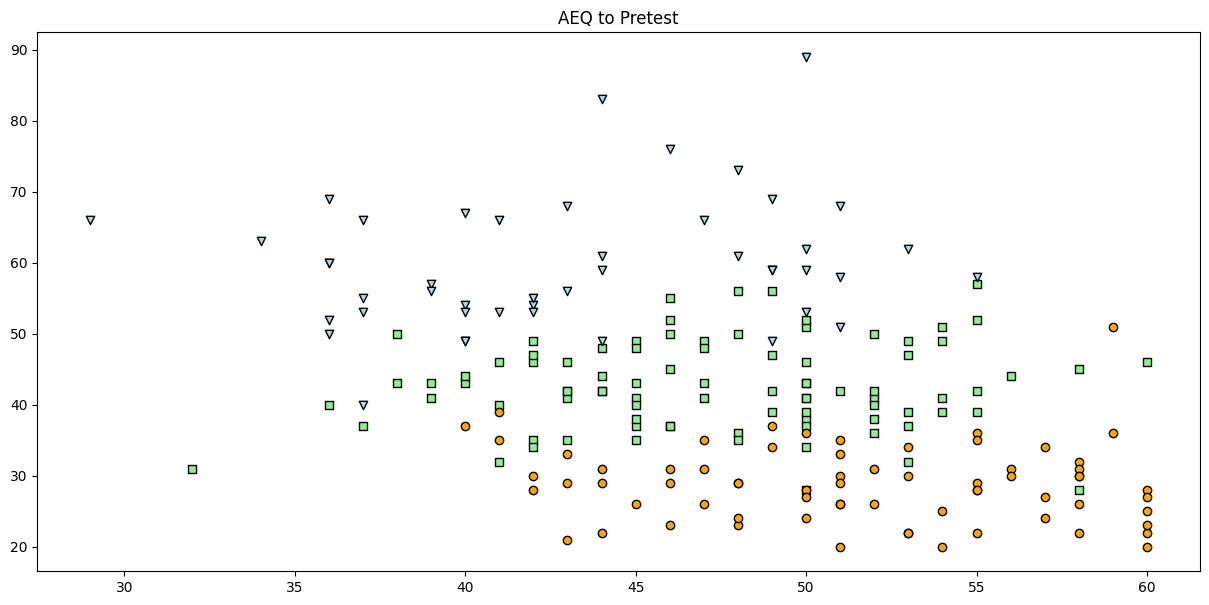

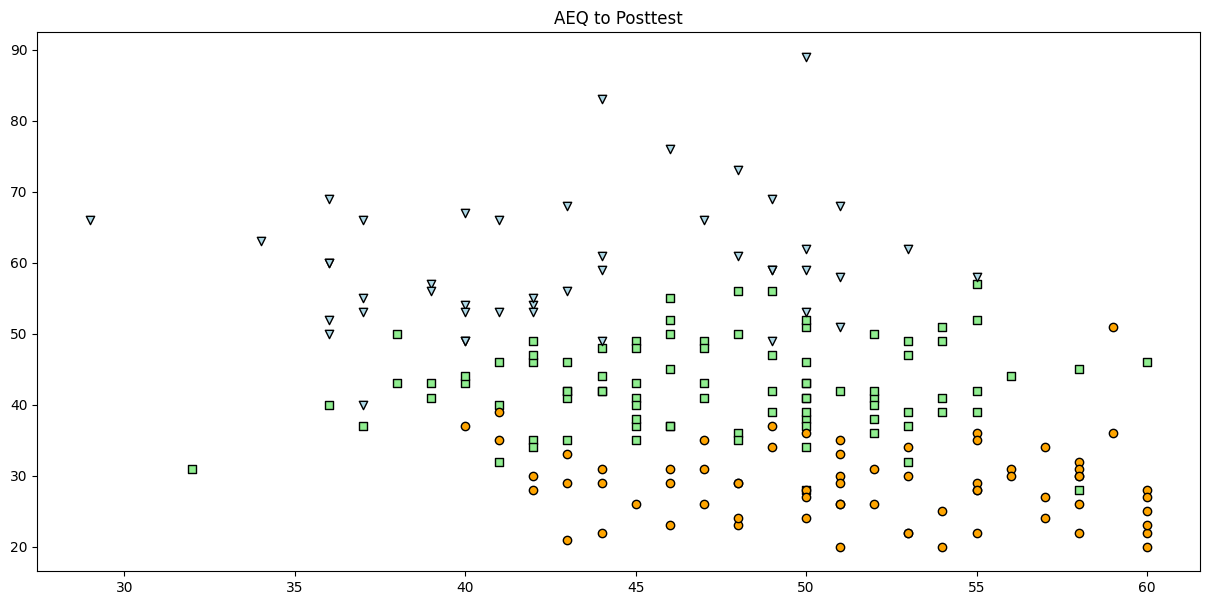

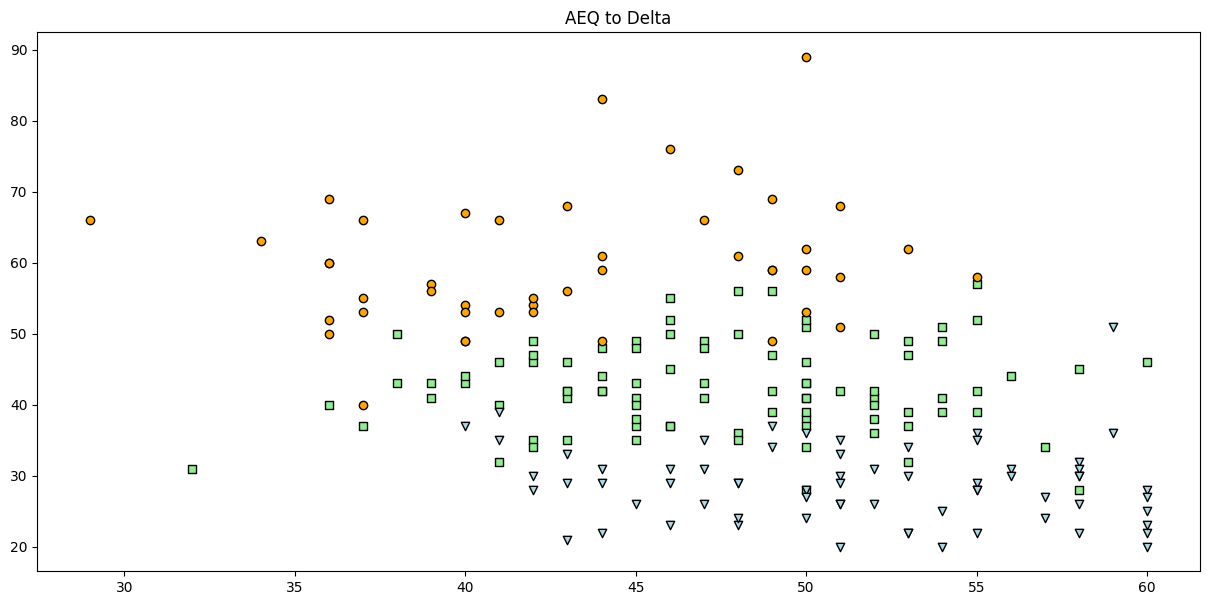

Clustering Gaussian Mixture AEQ terhadap Nilai


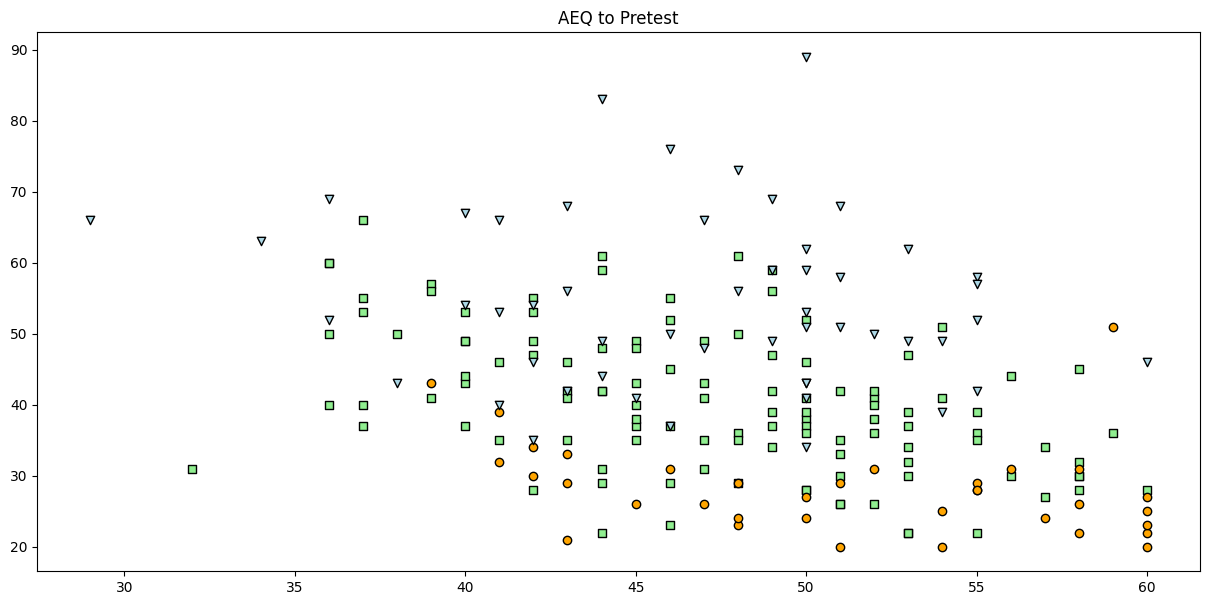

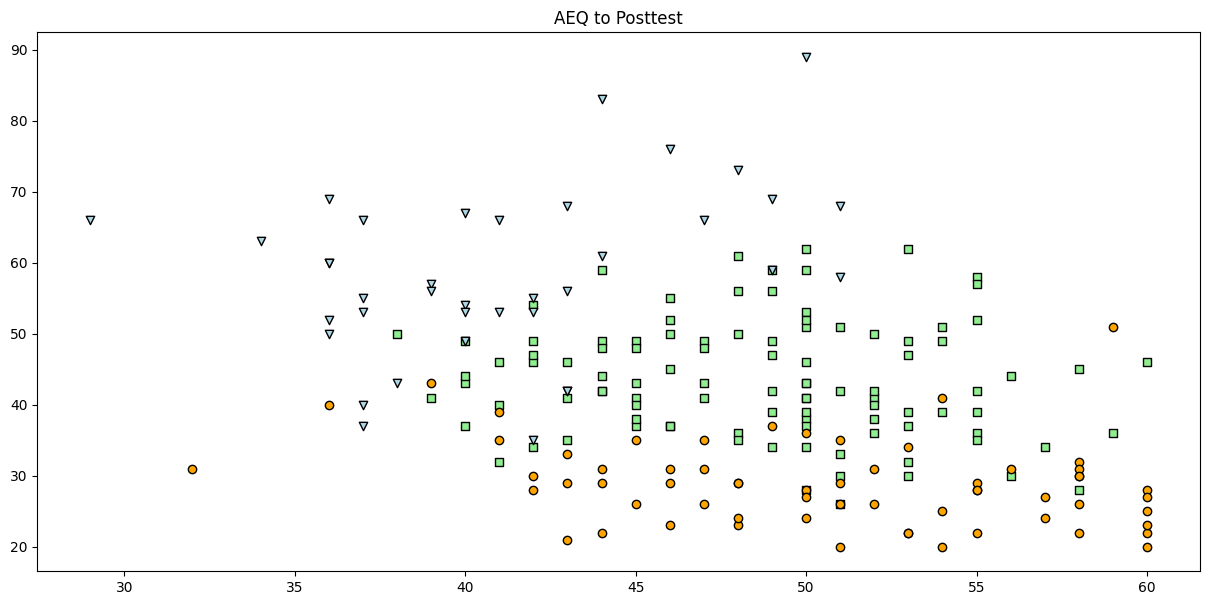

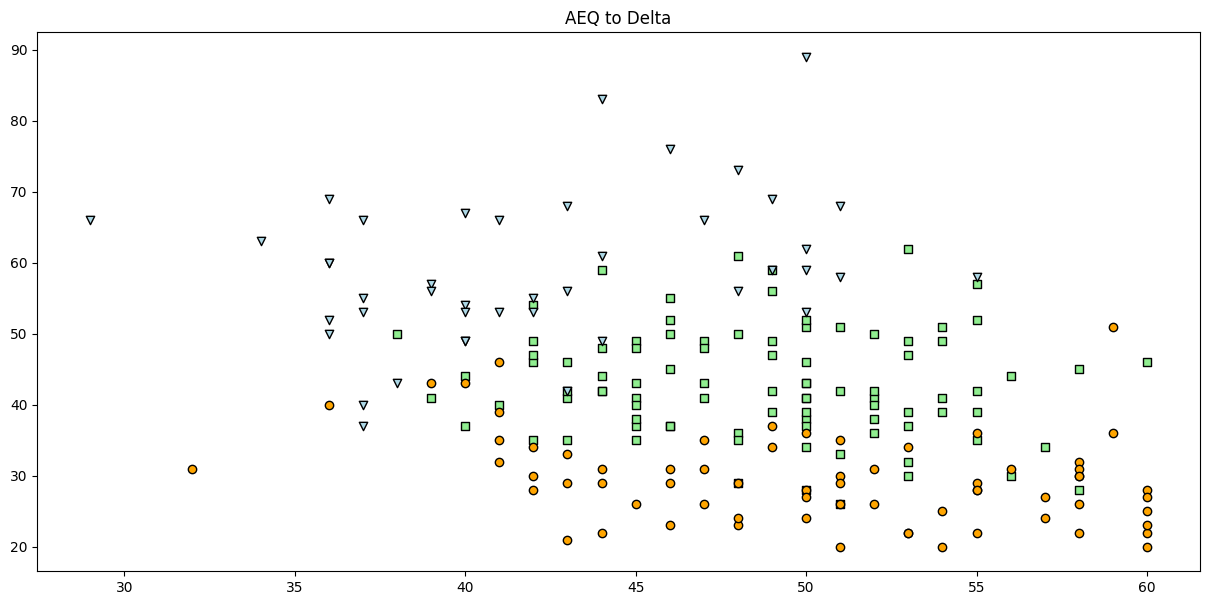

Clustering Fuzzy CMeans AEQ terhadap Nilai


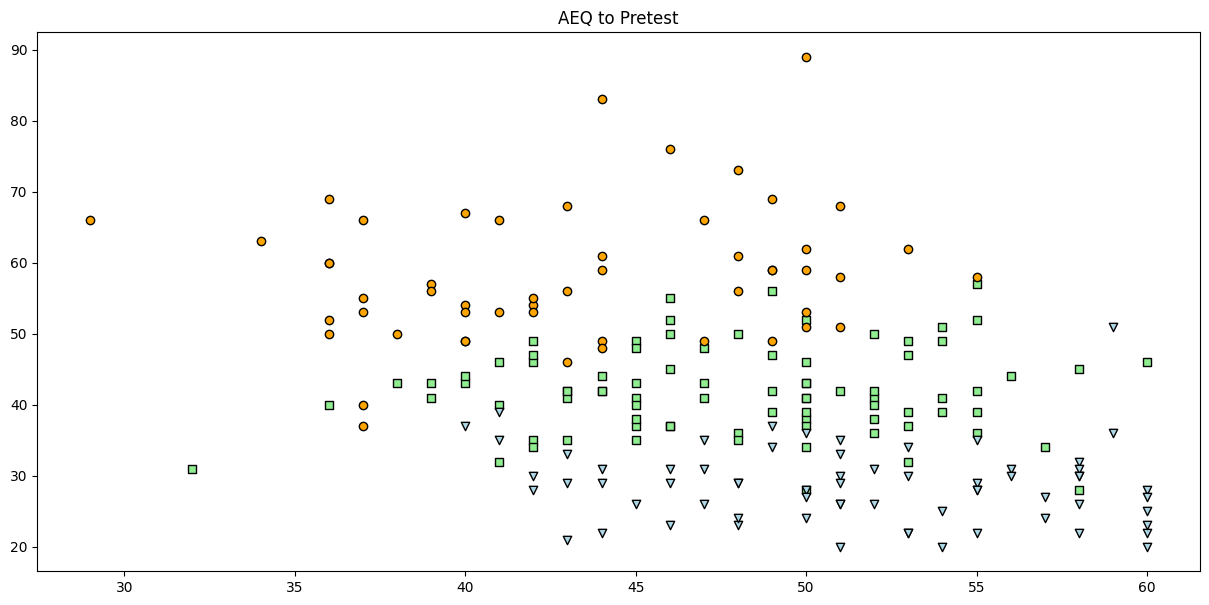

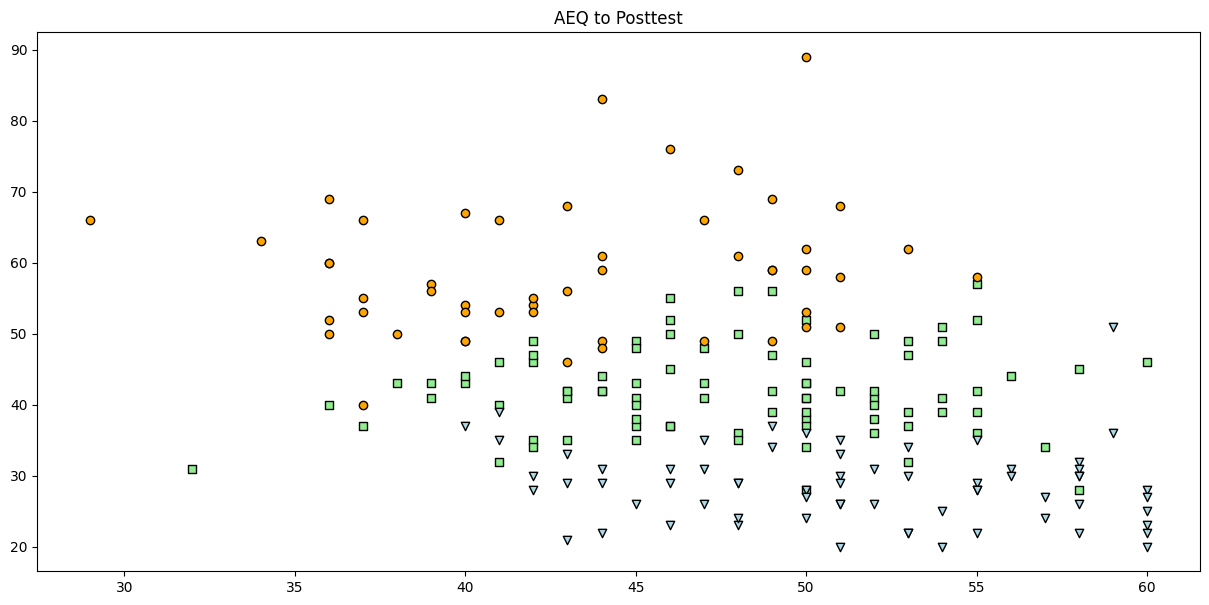

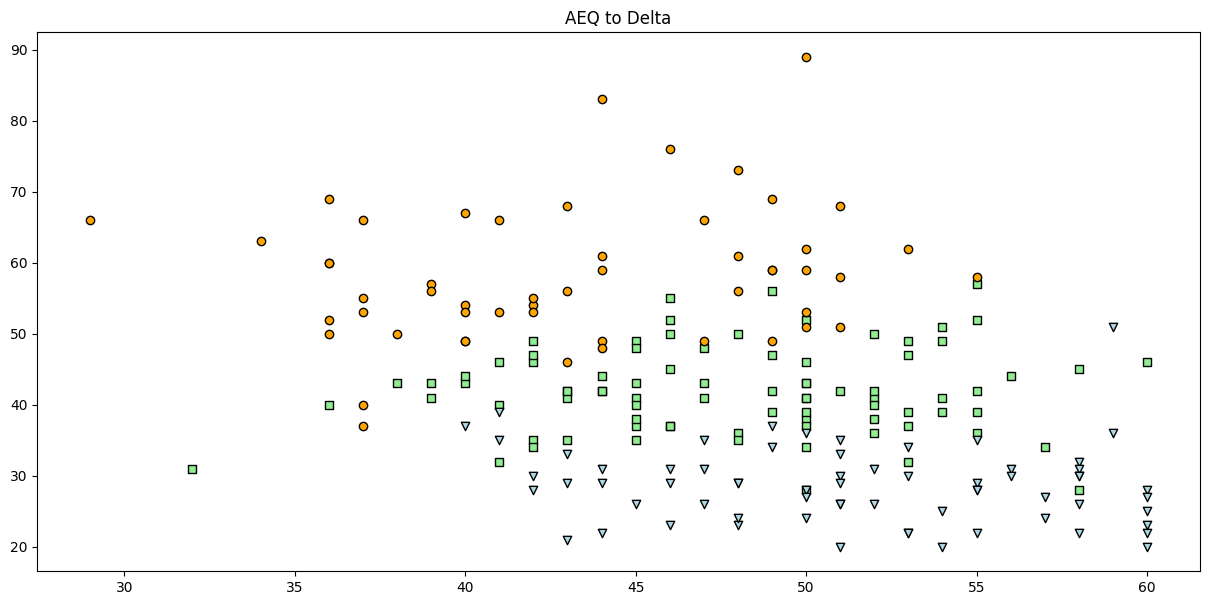

In [ ]:
print("Clustering KMeans AEQ terhadap Nilai")
get_clustering_vis_2(label_aeq_kmeans_nilai,X_aeq_nilai,model_aeq_kmeans_nilai)

print("Clustering Gaussian Mixture AEQ terhadap Nilai")
get_clustering_vis_2(label_aeq_gaussian_nilai,X_aeq_nilai,model_aeq_gaussian_nilai)

print("Clustering Fuzzy CMeans AEQ terhadap Nilai")
get_clustering_vis_2(label_aeq_fuzzy_nilai,X_aeq_nilai,model_aeq_fuzzy_nilai)

Pada Visualisasi diatas, menggambarkan bentuk persebaran pada pola yang terbentuk pada faktor AEQ terhadap nilai pretest, posttest dan delta mahasiswa

#### DASS

In [ ]:
%%capture
convert_to_numpy(X_dass_nilai)

Clustering KMeans DASS terhadap Nilai


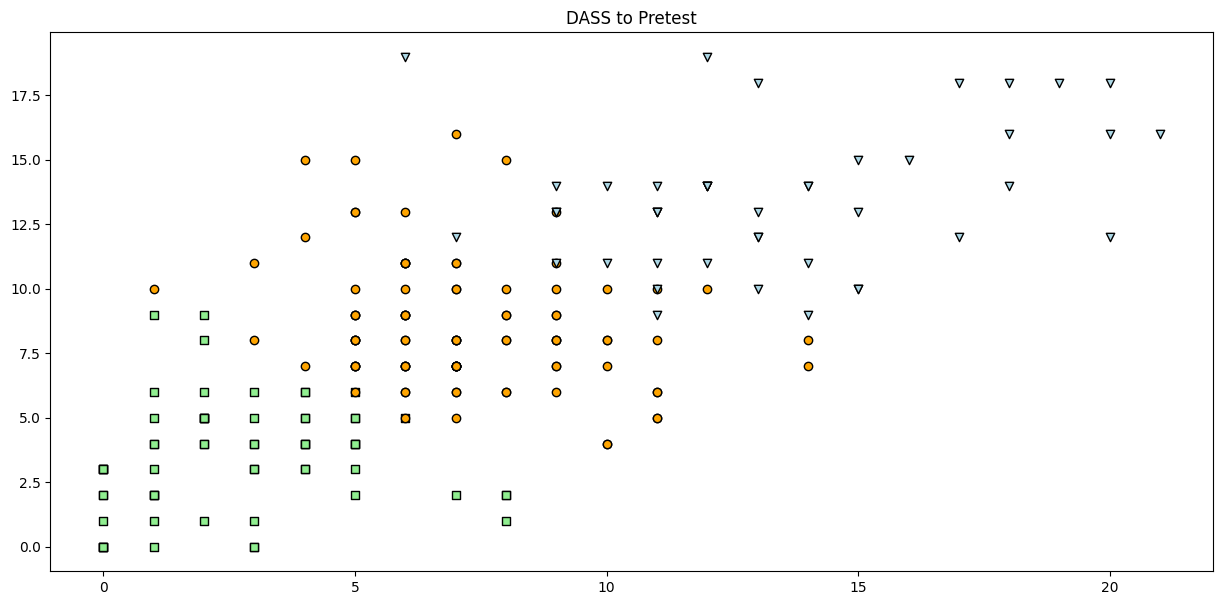

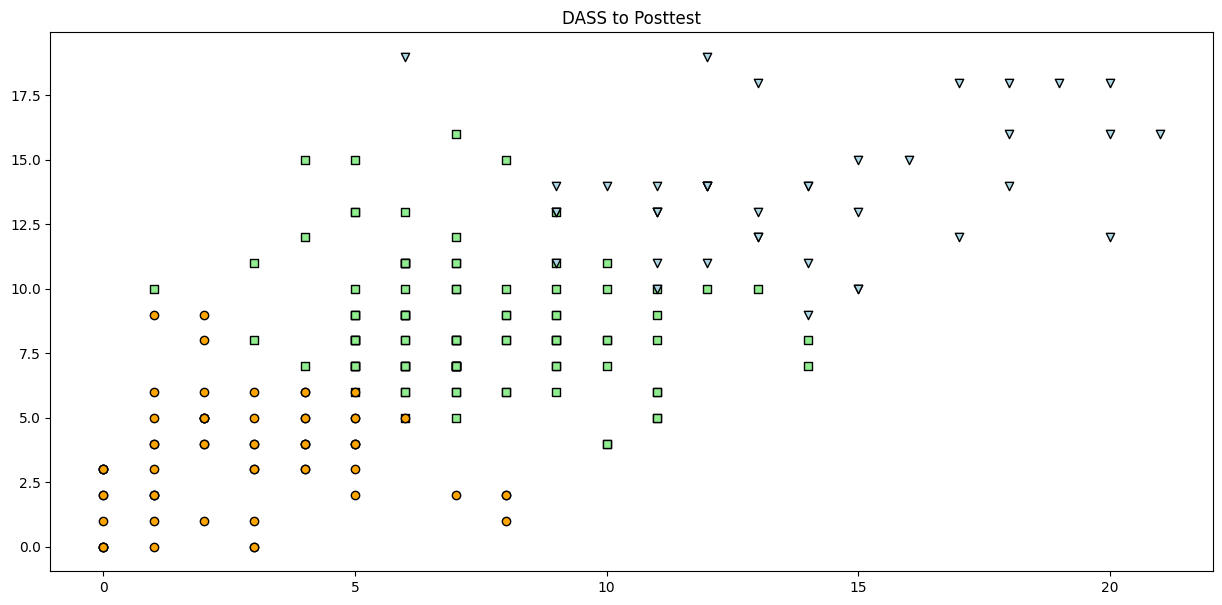

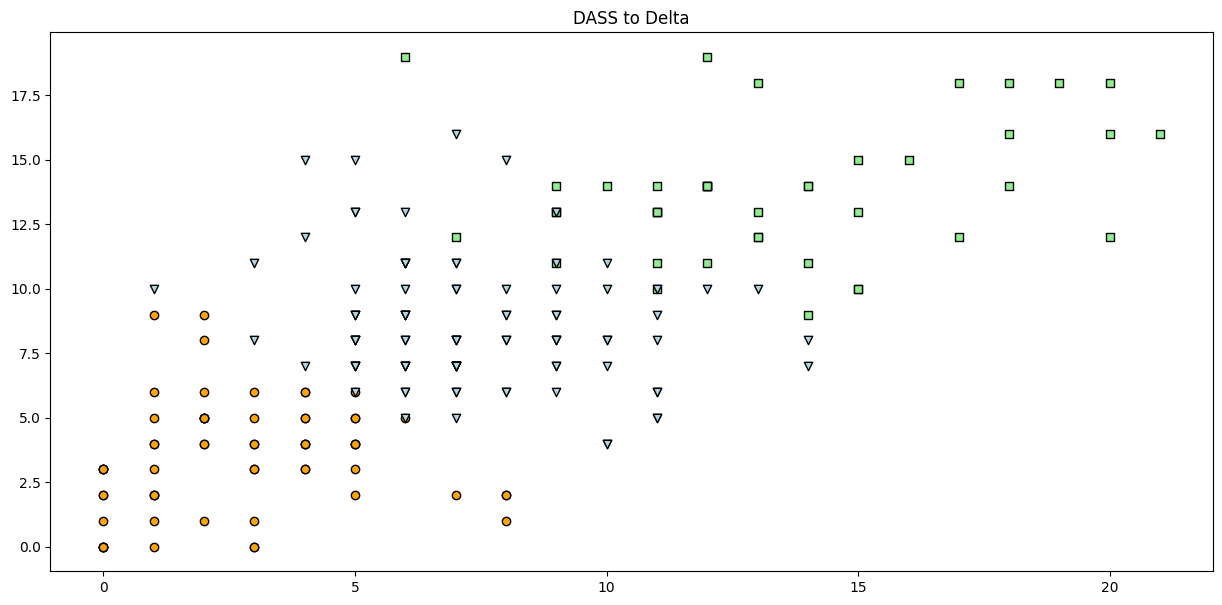

Clustering Gaussian Mixture DASS terhadap Nilai


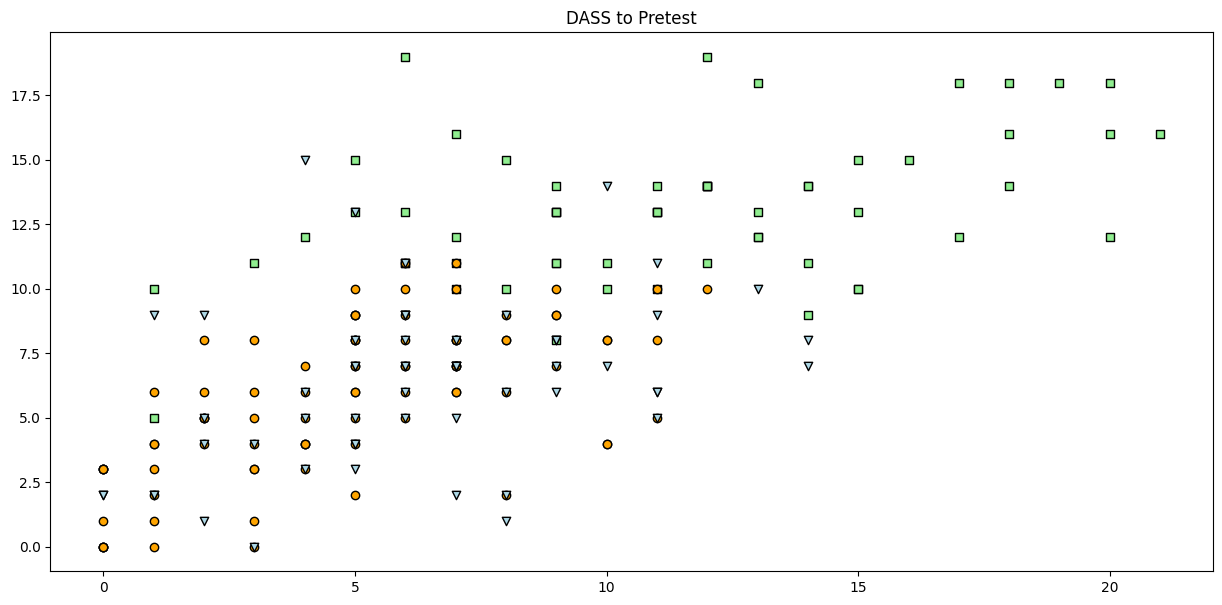

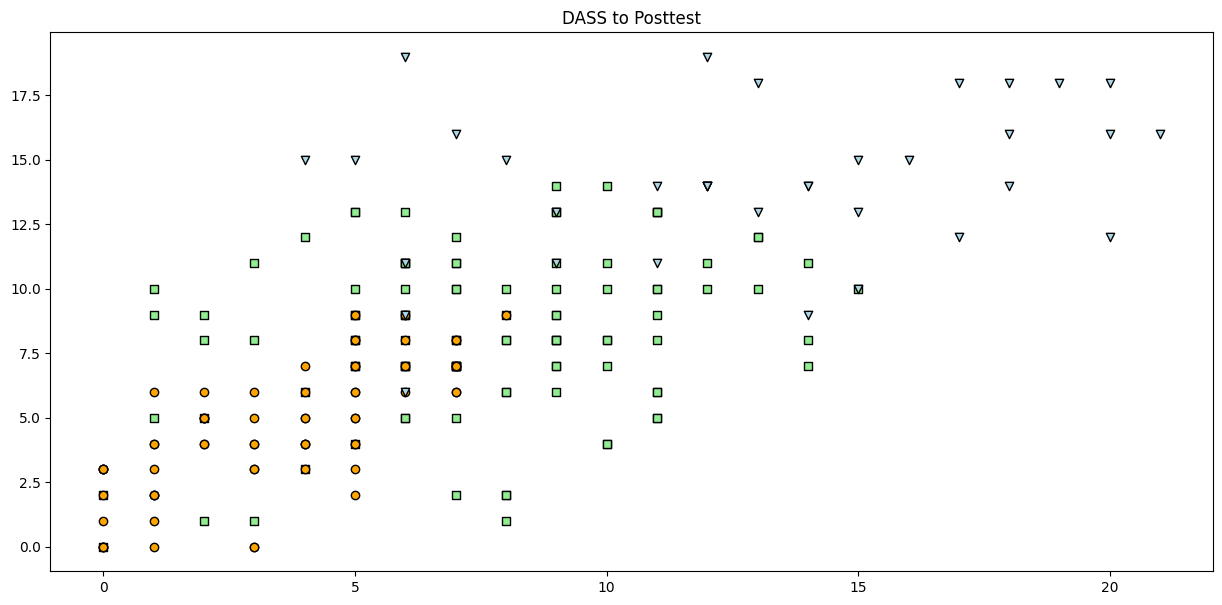

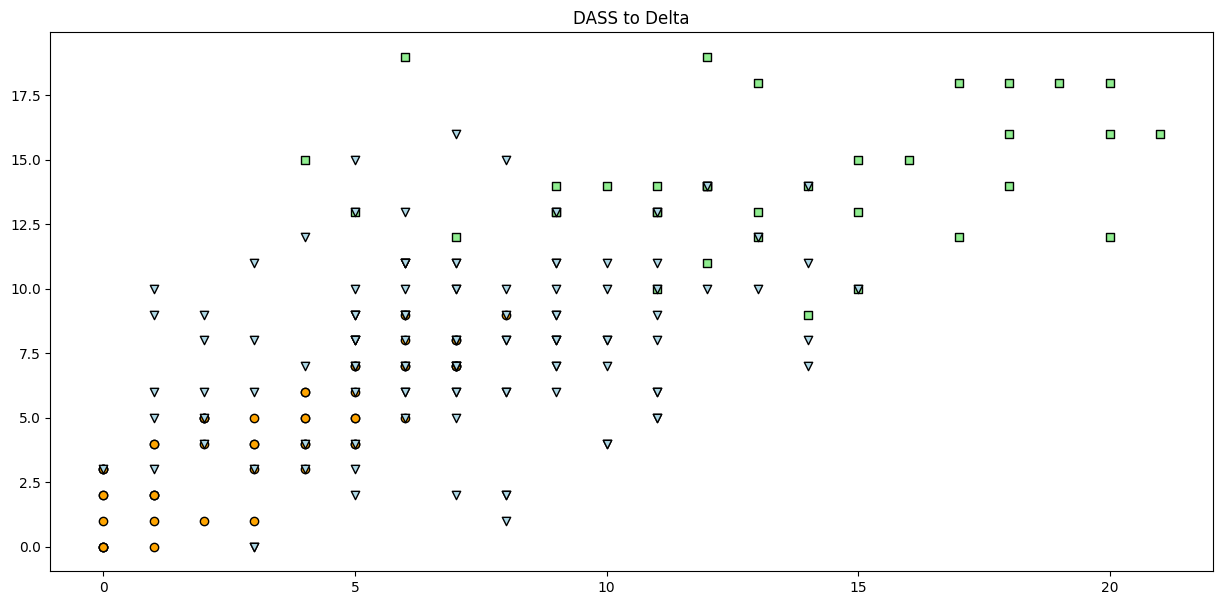

Clustering Fuzzy CMeans DASS terhadap Nilai


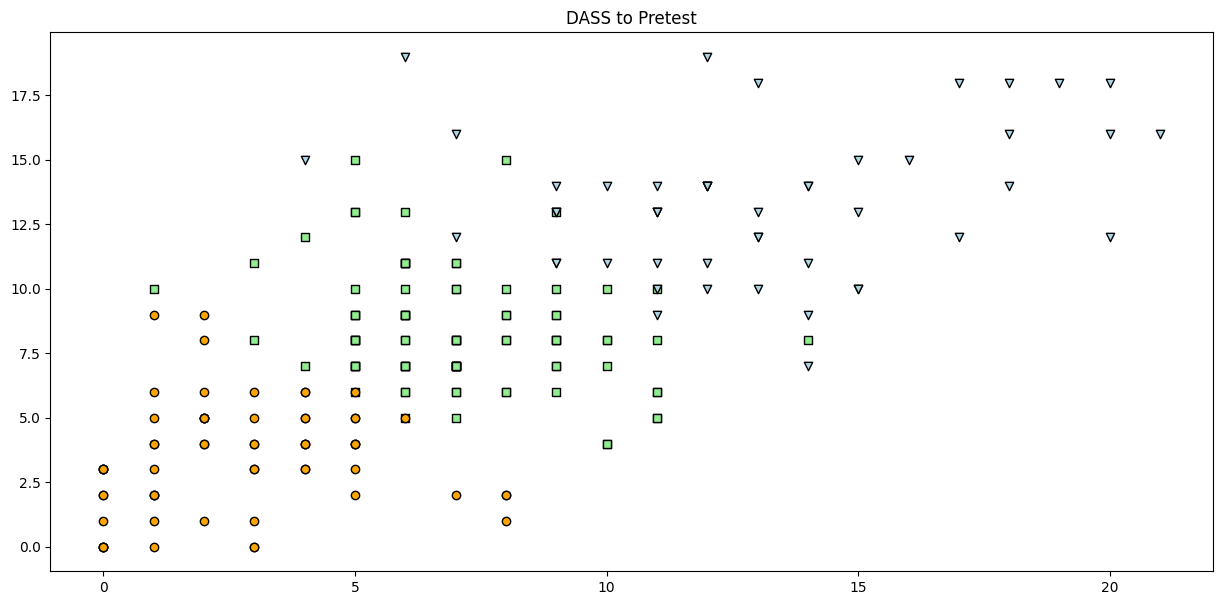

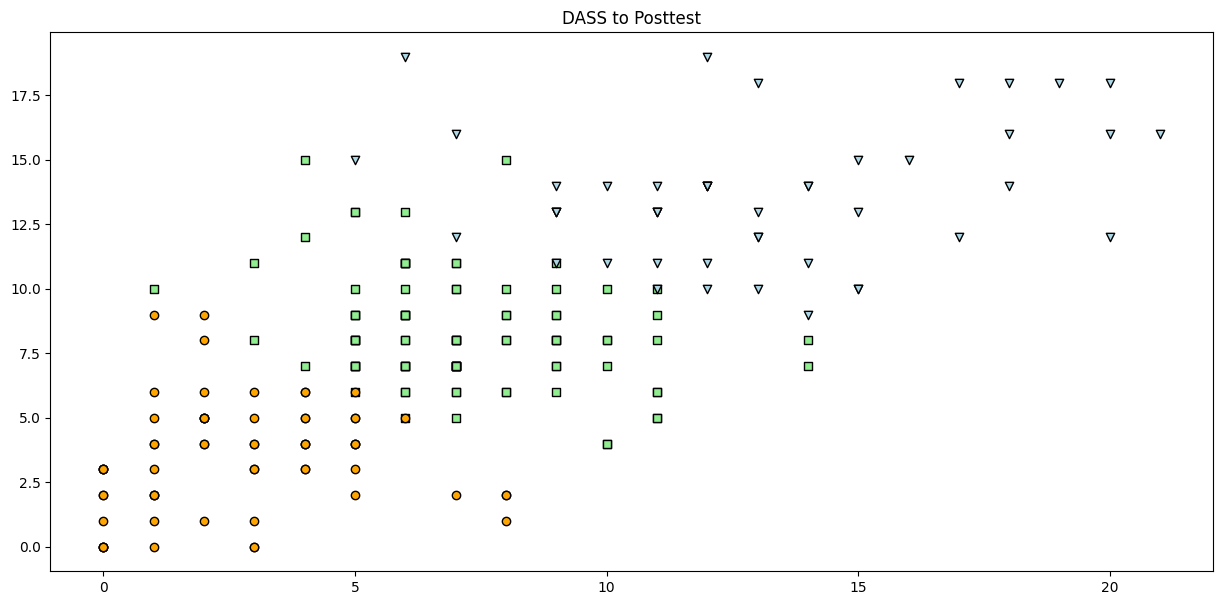

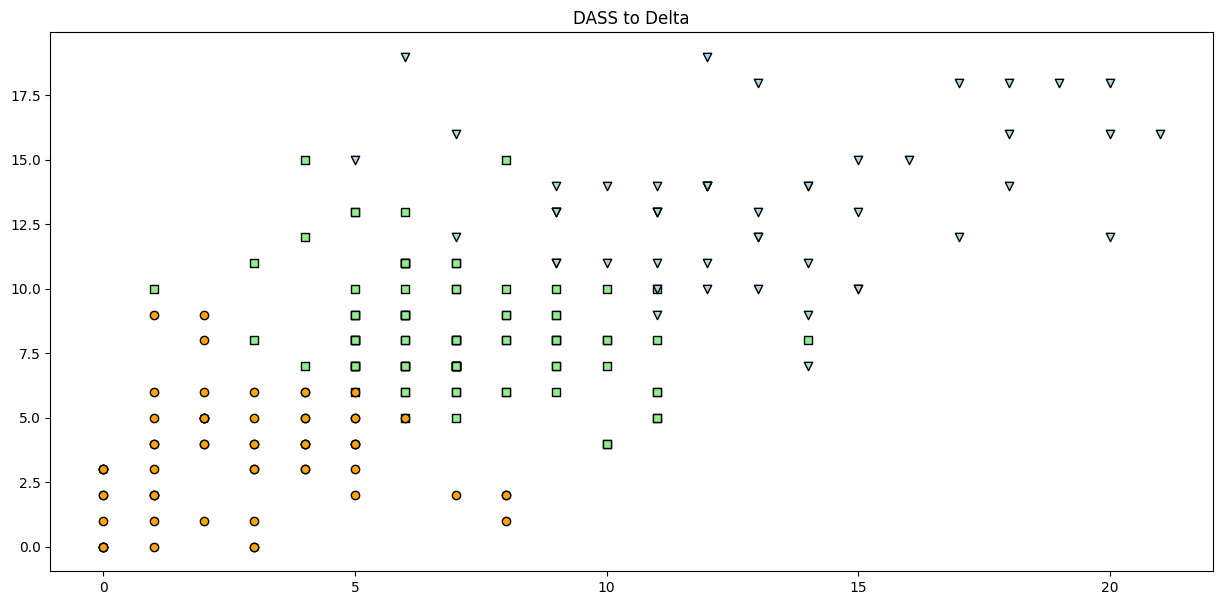

In [ ]:
print("Clustering KMeans DASS terhadap Nilai")
get_clustering_vis_2(label_dass_kmeans_nilai,X_dass_nilai,model_dass_kmeans_nilai)

print("Clustering Gaussian Mixture DASS terhadap Nilai")
get_clustering_vis_2(label_dass_gaussian_nilai,X_dass_nilai,model_dass_gaussian_nilai)

print("Clustering Fuzzy CMeans DASS terhadap Nilai")
get_clustering_vis_2(label_dass_fuzzy_nilai,X_dass_nilai,model_dass_fuzzy_nilai)

Pada Visualisasi diatas, menggambarkan bentuk persebaran pada pola yang terbentuk pada faktor DASS terhadap nilai pretest, posttest dan delta mahasiswa

In [ ]:
# KMeans
hitung_common(df_dass_pretest_result,'DASS-KMeans-Pretest')
hitung_common(df_dass_posttest_result,'DASS-KMeans-Posttest')
hitung_common(df_dass_delta_result,'DASS-KMeans-Delta')
# Gaussian
hitung_common(df_dass_pretest_result_gaussian,'DASS-Gaussian-Pretest')
hitung_common(df_dass_posttest_result_gaussian,'DASS-Gaussian-Posttest')
hitung_common(df_dass_delta_result_gaussian,'DASS-Gaussian-Delta')
# Fuzzy
hitung_common(df_dass_pretest_result_fuzzy,'DASS-Fuzzy-Pretest')
hitung_common(df_dass_posttest_result_fuzzy,'DASS-Fuzzy-Posttest')
hitung_common(df_dass_delta_result_fuzzy,'DASS-Fuzzy-Delta')

Most Common values of: DASS-KMeans-Pretest
╒══════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════╕
│ Cluster(Depression='Normal', Anxiety='Normal', Stress='Normal', nilai_pretest='High PreTest', Cluster=0)     │ 50 │
├──────────────────────────────────────────────────────────────────────────────────────────────────────────────┼────┤
│ Cluster(Depression='Normal', Anxiety='Normal', Stress='Normal', nilai_pretest='Moderate PreTest', Cluster=0) │ 10 │
╘══════════════════════════════════════════════════════════════════════════════════════════════════════════════╧════╛
╒══════════════════════════════════════════════════════════════════════════════════════════════════════════╤════╕
│ Cluster(Depression='Normal', Anxiety='Normal', Stress='Normal', nilai_pretest='High PreTest', Cluster=1) │ 20 │
├──────────────────────────────────────────────────────────────────────────────────────────────────────────┼────┤
│ Cluster(Depression='Nor

Berikut merupakan hasil pola faktor afektif DASS yang terbentuk oleh ketiga metode pembelajaran mesin yakni KMeans, Gaussian Mixture dan Fuzzy CMeans. Disini kita dapat mengevaluasi faktor apa saja yang mempengaruhi nilai ujian mahasiswa. Penjabarannya adalah sebagai berikut:
1. Saat menggunakan KMeans, pola faktor afektif AEQ yang mempengaruhi nilai ujian adalah
    POSTTEST | Cluster 0 : 80 | Cluster 1 : 57 | Cluster 2 : 65   

    Cluster 0: Normal Depression, Normal Anxiety, Normal Stress, High PostTest
    Cluster 1: Normal Depression, Normal Anxiety, Normal Stress, Moderate PostTest
    Cluster 2: Normal Depression, Moderate Anxiety, Normal Stress, High PostTest

2. Saat menggunakan Gaussian Mixture, pola faktor afektif AEQ yang mempengaruhi nilai ujian adalah
    POSTTEST | Cluster 0 : 36 | Cluster 1 : 106 | Cluster 2 : 58

    Cluster 0: Mild Depression, Moderate Anxiety, Normal Stress, High PostTest
    Cluster 1: Normal Depression, Normal Anxiety, Normal Stress, High PostTest
    Cluster 2: Normal Depression, Normal Anxiety, Normal Stress, Moderate PostTest

3. Saat menggunakan Fuzzy CMeans, pola faktor afektif AEQ yang mempengaruhi nilai ujian adalah
    POSTTEST | Cluster 0 : 36 | Cluster 1 : 106 | Cluster 2 : 58

    Cluster 0: Mild Depression, Moderate Anxiety, Normal Stress, High PostTest
    Cluster 1: Normal Depression, Normal Anxiety, Normal Stress, High PostTest
    Cluster 2: Normal Depression, Normal Anxiety, Normal Stress, Moderate PostTest

#### ERQ

In [ ]:
%%capture
convert_to_numpy(X_erq_nilai)

Clustering KMeans ERQ terhadap Nilai


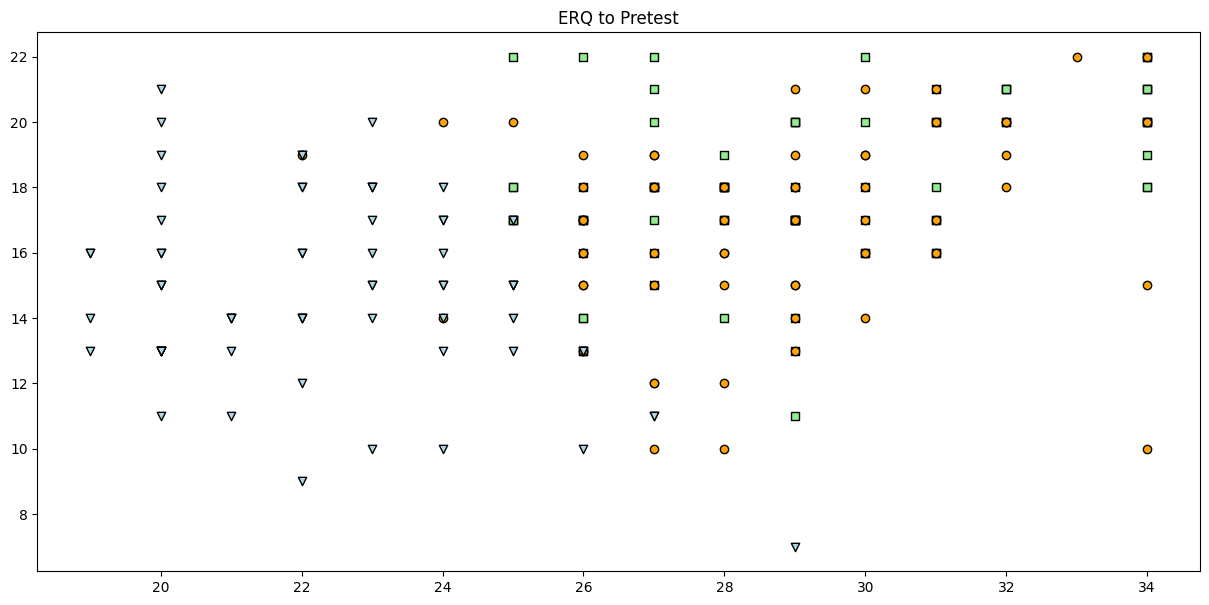

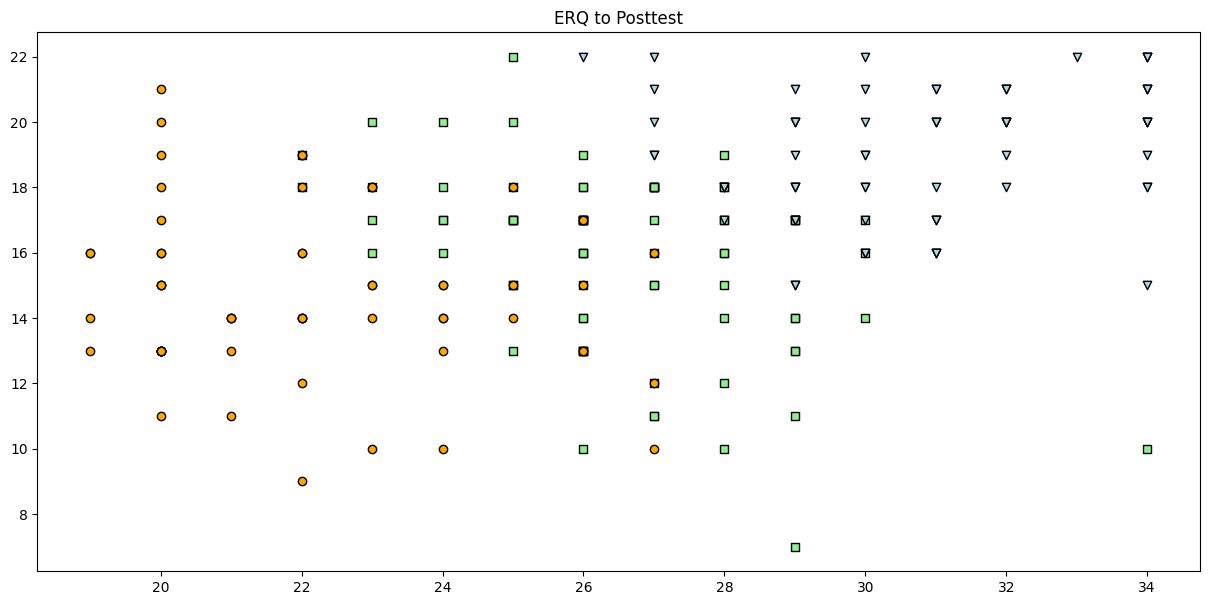

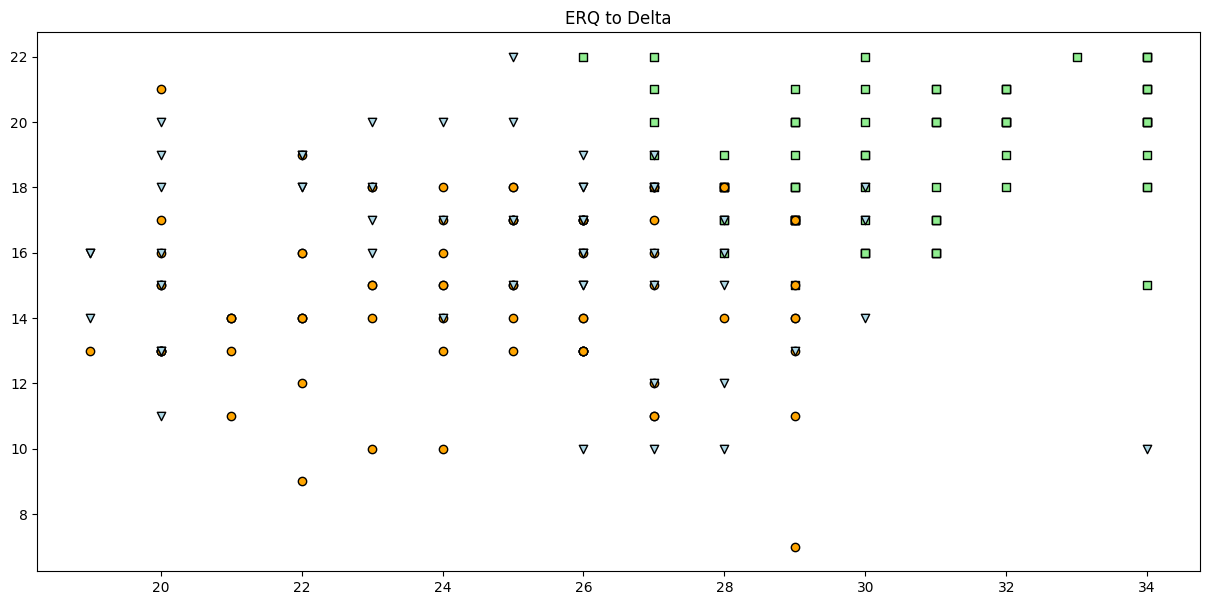

Clustering Gaussian Mixture ERQ terhadap Nilai


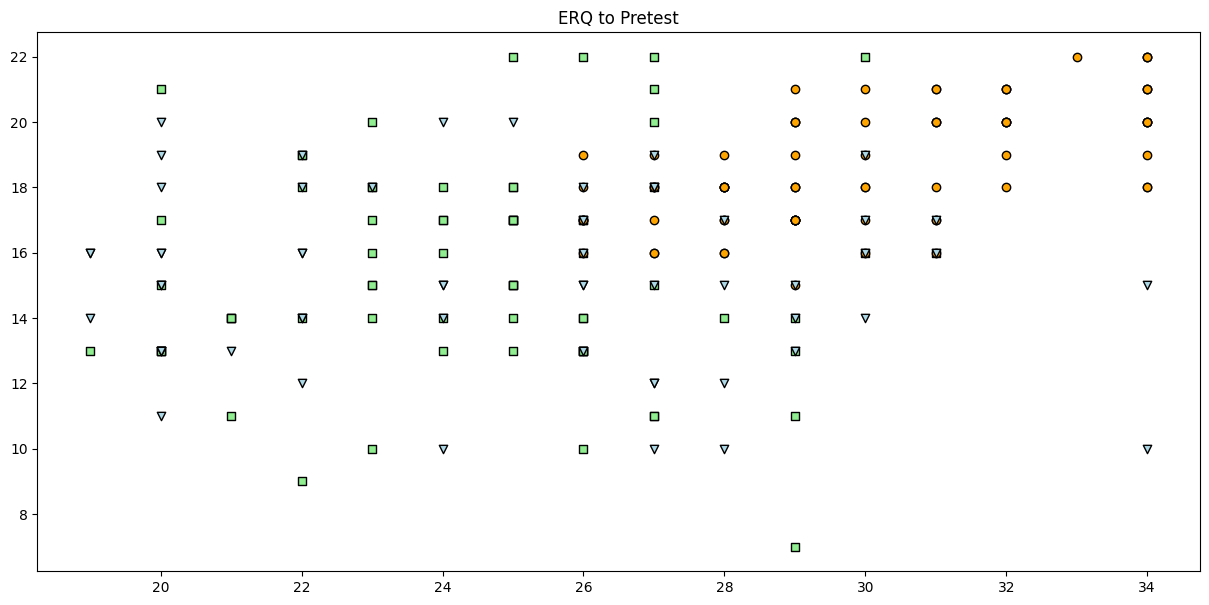

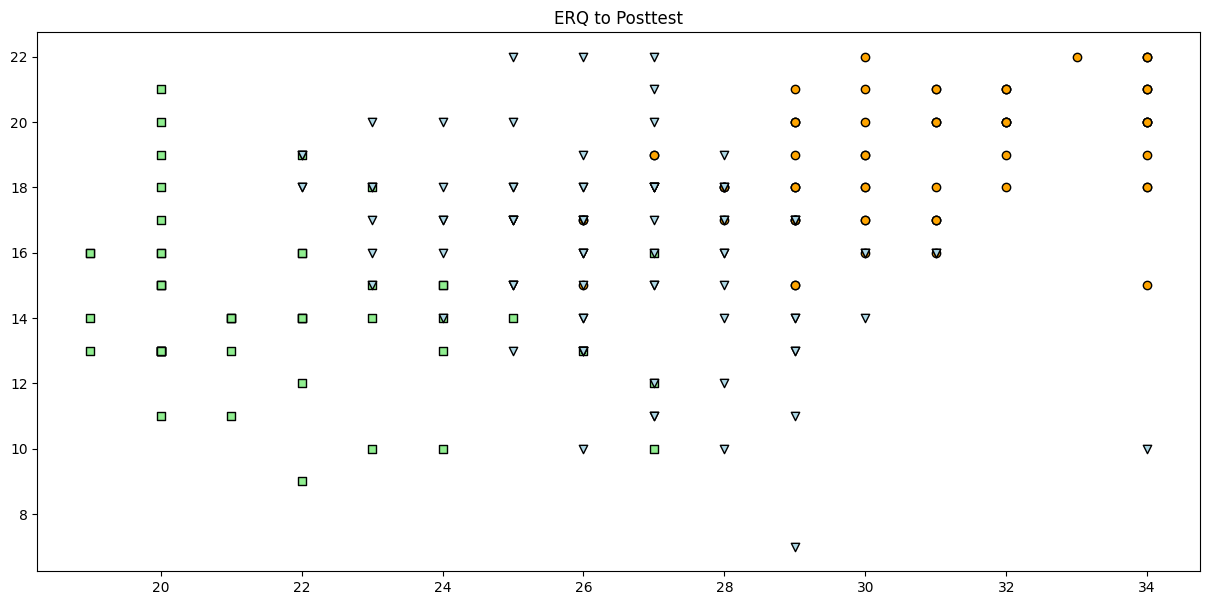

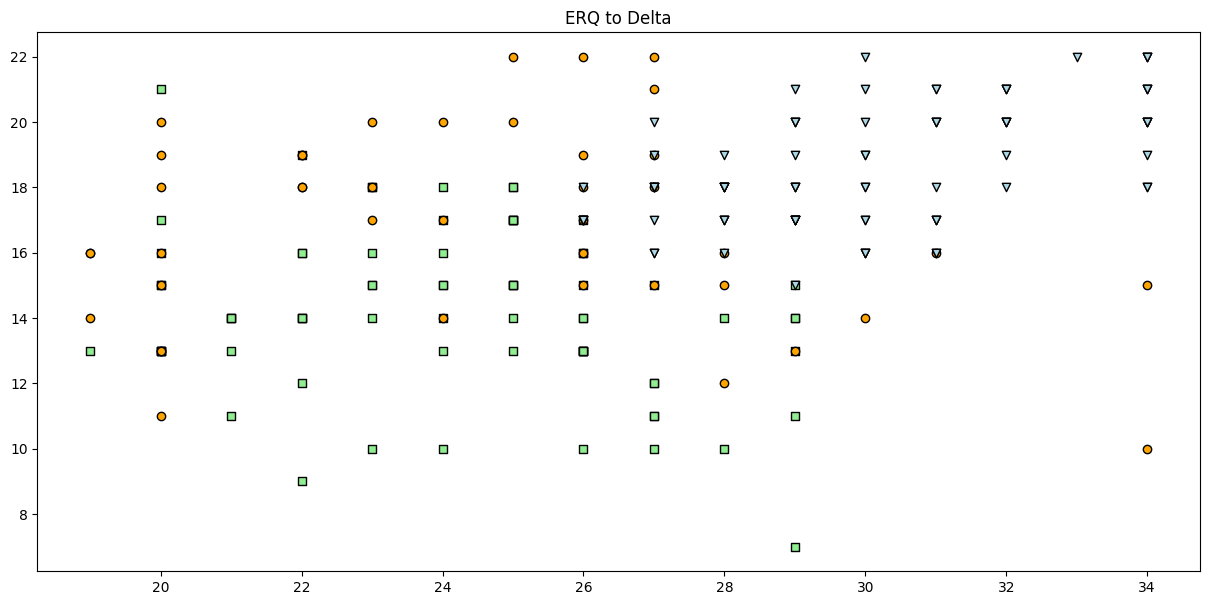

Clustering Fuzzy CMeans ERQ terhadap Nilai


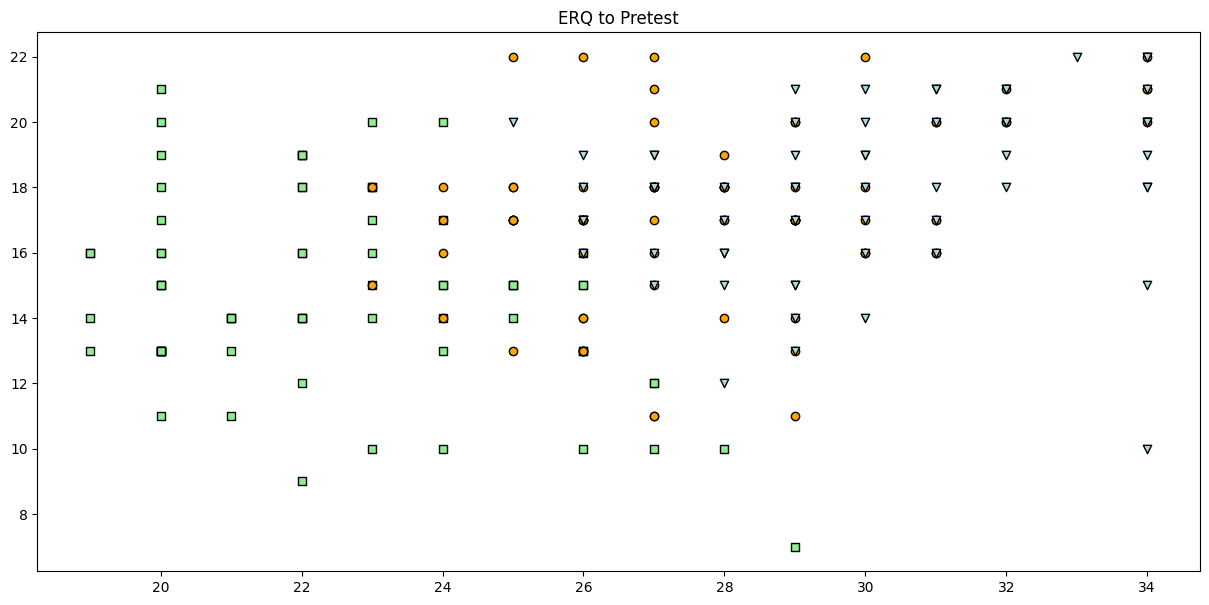

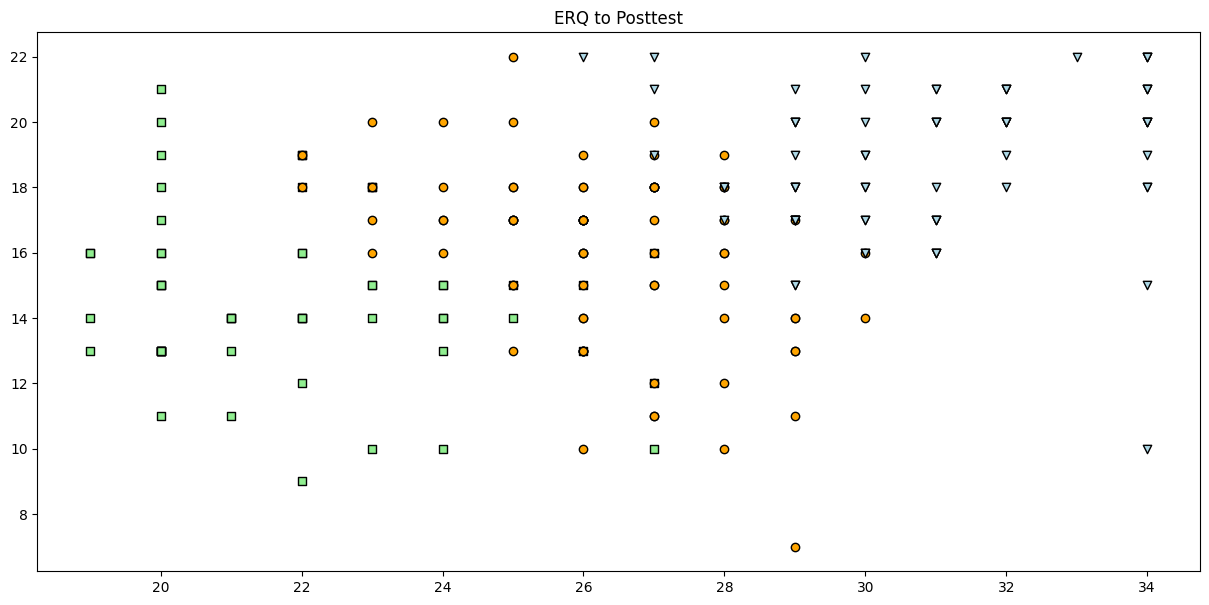

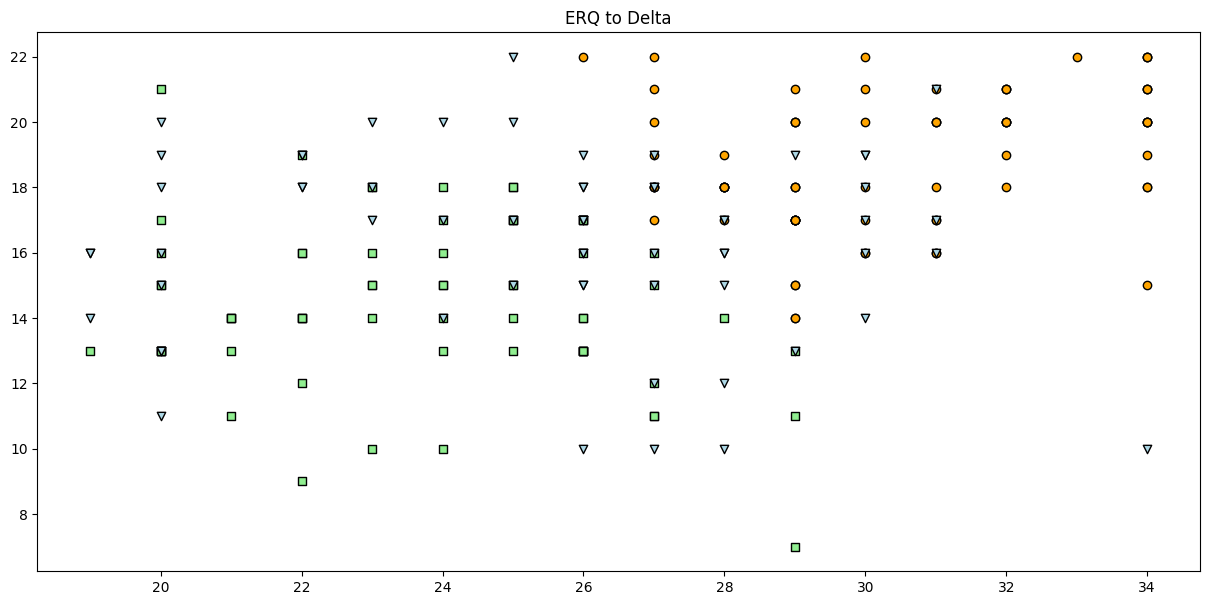

In [ ]:
print("Clustering KMeans ERQ terhadap Nilai")
get_clustering_vis_2(label_erq_kmeans_nilai,X_erq_nilai,model_erq_kmeans_nilai)

print("Clustering Gaussian Mixture ERQ terhadap Nilai")
get_clustering_vis_2(label_erq_gaussian_nilai,X_erq_nilai,model_erq_gaussian_nilai)

print("Clustering Fuzzy CMeans ERQ terhadap Nilai")
get_clustering_vis_2(label_erq_fuzzy_nilai,X_erq_nilai,model_erq_fuzzy_nilai)


Pada Visualisasi diatas, menggambarkan bentuk persebaran pada pola yang terbentuk pada faktor ERQ terhadap nilai pretest, posttest dan delta mahasiswa

In [ ]:
# KMeans
hitung_common(df_erq_pretest_result,'ERQ-KMeans-Pretest')
hitung_common(df_erq_posttest_result,'ERQ-KMeans-Posttest')
hitung_common(df_erq_delta_result,'ERQ-KMeans-Delta')
# Gaussian
hitung_common(df_erq_pretest_result_gaussian,'ERQ-Gaussian-Pretest')
hitung_common(df_erq_posttest_result_gaussian,'ERQ-Gaussian-Posttest')
hitung_common(df_erq_delta_result_gaussian,'ERQ-Gaussian-Delta')
# Fuzzy
hitung_common(df_erq_pretest_result_fuzzy,'ERQ-Fuzzy-Pretest')
hitung_common(df_erq_posttest_result_fuzzy,'ERQ-Fuzzy-Posttest')
hitung_common(df_erq_delta_result_fuzzy,'ERQ-Fuzzy-Delta')

Most Common values of: ERQ-KMeans-Pretest
╒══════════════════════════════════════════════════════════════════════════════════╤════╕
│ Cluster(CRF='Moderate', ESF='Moderate', nilai_pretest='High PreTest', Cluster=0) │ 45 │
├──────────────────────────────────────────────────────────────────────────────────┼────┤
│ Cluster(CRF='High', ESF='Moderate', nilai_pretest='High PreTest', Cluster=0)     │ 15 │
╘══════════════════════════════════════════════════════════════════════════════════╧════╛
╒══════════════════════════════════════════════════════════════════════════════════════╤════╕
│ Cluster(CRF='Moderate', ESF='Moderate', nilai_pretest='High PreTest', Cluster=1)     │ 22 │
├──────────────────────────────────────────────────────────────────────────────────────┼────┤
│ Cluster(CRF='Moderate', ESF='Moderate', nilai_pretest='Moderate PreTest', Cluster=1) │ 16 │
╘══════════════════════════════════════════════════════════════════════════════════════╧════╛
╒═════════════════════════════════════

Berikut merupakan hasil pola faktor afektif ERQ yang terbentuk oleh ketiga metode pembelajaran mesin yakni KMeans, Gaussian Mixture dan Fuzzy CMeans. Disini kita dapat mengevaluasi faktor apa saja yang mempengaruhi nilai ujian mahasiswa. Penjabarannya adalah sebagai berikut:
1. Saat menggunakan KMeans, pola faktor afektif ERQ yang mempengaruhi nilai ujian adalah
    POSTTEST | Cluster 0 : 76 | Cluster 1 : 67 | Cluster 2 : 59

    Cluster 0: Moderate CRF, Moderate ESF, High PostTest
    Cluster 1: High CRF, Moderate ESF, High PostTest
    Cluster 2: Moderate CRF, Moderate ESF, Moderate PostTest

2. Saat menggunakan Gaussian Mixture, pola faktor afektif ERQ yang mempengaruhi nilai ujian adalah
    POSTTEST | Cluster 0 : 40 | Cluster 1 : 108 | Cluster 2 : 54

    Cluster 0: Moderate CRF, Moderate ESF, Moderate PostTest
    Cluster 1: Moderate CRF, Moderate ESF, High PostTest
    Cluster 2: High CRF, Moderate ESF, High PostTest

3. Saat menggunakan Fuzzy CMeans, pola faktor afektif ERQ yang mempengaruhi nilai ujian adalah
    POSTTEST | Cluster 0 : 84 | Cluster 1 : 47 | Cluster 2 : 71

    Cluster 0: Moderate CRF, Moderate ESF, High PostTest
    Cluster 1: Moderate CRF, Moderate ESF, Moderate PostTest
    Cluster 2: High CRF, Moderate ESF, High PostTest

#### ALL

In [ ]:
# print("Clustering KMeans ADE terhadap Nilai")
# get_clustering_vis_2(label_ade_kmeans_nilai,X_ade_nilai,model_ade_kmeans_nilai)

# print("Clustering Gaussian Mixture ADE terhadap Nilai")
# get_clustering_vis_2(label_ade_gaussian_nilai,X_ade_nilai,model_ade_gaussian_nilai)

# print("Clustering Fuzzy CMeans ADE terhadap Nilai")
# get_clustering_vis_2(label_ade_fuzzy_nilai,X_ade_nilai,model_ade_fuzzy_nilai)

# print("Clustering KModes ADE terhadap Nilai")
# get_clustering_vis_2(label_ade_kmodes_nilai,X_ade_nilai,model_ade_kmodes_nilai)

Pada Visualisasi diatas, menggambarkan bentuk persebaran pada pola yang terbentuk pada seluruh faktor AEQ, DASS dan ERQ terhadap nilai pretest, posttest dan delta mahasiswa

In [ ]:
# KMeans
hitung_common(df_ade_result_pretest_kmeans,'ALL-KMeans-Pretest')
hitung_common(df_ade_result_posttest_kmeans,'ALL-KMeans-Posttest')
hitung_common(df_ade_result_delta_kmeans,'ALL-KMeans-Delta')
# Gaussian
hitung_common(df_ade_pretest_result_gaussian,'ALL-Gaussian-Pretest')
hitung_common(df_ade_posttest_result_gaussian,'ALL-Gaussian-Posttest')
hitung_common(df_ade_delta_result_gaussian,'ALL-Gaussian-Delta')
# Fuzzy
hitung_common(df_ade_pretest_result_fuzzy,'ALL-Fuzzy-Pretest')
hitung_common(df_ade_posttest_result_fuzzy,'ALL-Fuzzy-Posttest')
hitung_common(df_ade_delta_result_fuzzy,'ALL-Fuzzy-Delta')

Most Common values of: ALL-KMeans-Pretest
╒════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════╕
│ Cluster(Class_Positive='High', Class_Negative='Low', Learn_Positive='High', Learn_Negative='Low', Depression='Normal', Anxiety='Normal', Stress='Normal', CRF='Moderate', ESF='Moderate', nilai_pretest='High PreTest', Cluster=0)         │ 11 │
├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼────┤
│ Cluster(Class_Positive='Moderate', Class_Negative='Low', Learn_Positive='Moderate', Learn_Negative='Low', Depression='Normal', Anxiety='Normal', Stress='Normal', CRF='Moderate', ESF='Moderate', nilai_pretest='High PreTest', 

Berikut merupakan hasil seluruh pola faktor afektif AEQ, DASS dan ERQ yang terbentuk oleh ketiga metode pembelajaran mesin yakni KMeans, Gaussian Mixture dan Fuzzy CMeans. Disini kita dapat mengevaluasi faktor apa saja yang mempengaruhi nilai ujian mahasiswa. Penjabarannya adalah sebagai berikut:
1. Pola menggunakan KMeans terhadap seluruh Faktor Afektif pada nilai ujian mahasiswa
    POSTLearn | Cluster 0 : 68 | Cluster 1 : 85 | Cluster 2 : 49

    Cluster 0: Moderate Class Positive , Moderate Class Negative , Moderate Learn Positive , Moderate Learn Negative , Mild Depression , Moderate Anxiety , Normal Stress , Moderate CRF , Moderate ESF , High PostLearn
    Cluster 1: High Class Positive , Low Class Negative , High Learn Positive , Low Learn Negative , Normal Depression , Normal Anxiety , Normal Stress , Moderate CRF , Moderate ESF , High PostLearn
    Cluster 2: Moderate Class Positive , Low Class Negative , Moderate Learn Positive , Low Learn Negative , Normal Depression , Mild Anxiety , Normal Stress , Moderate CRF , Moderate ESF , High PostLearn

2. Pola menggunakan Gaussian Mixture terhadap seluruh faktor afektif pada nilai ujian mahasiswa
    POSTLearn | Cluster 0 : 55 | Cluster 1 : 89 | Cluster 2 : 58

    Cluster 0: High Class Positive, Low Class Negative, High Learn Positive, Low Learn Negative, Normal Depression, Normal Anxiety, Normal Stress, Moderate CRF, Moderate ESF, Moderate PostLearn
    Cluster 1: High Class Positive, Low Class Negative, High Learn Positive, Low Learn Negative, Normal Depression, Normal Anxiety, Normal Stress, Moderate CRF, Moderate ESF, High PostLearn
    Cluster 2: Moderate Class Positive, Moderate Class Negative, Moderate Learn Positive, Moderate Learn Negative, Mild Depression, Moderate Anxiety, Normal Stress, Moderate CRF, Moderate ESF, High PostLearn

3. Pola menggunakan Fuzzy CMeans terhadap seluruh faktor afektif pada nilai ujian mahasiswa
    POSTLearn | Cluster 0 : 55 | Cluster 1 : 89 | Cluster 2 : 58

    Cluster 0: Moderate Class Positive, Low Class Negative, Moderate Learn Positive, Low Learn Negative, Normal Depression, Normal Anxiety, Normal Stress, Moderate CRF, Moderate ESF, High PostLearn
    Cluster 1: Moderate Class Positive, Moderate Class Negative, Moderate Learn Positive, Moderate Learn Negative, Mild Depression, Moderate Anxiety, Normal Stress, Moderate CRF, Moderate ESF, High PostLearn
    Cluster 2: High Class Positive, Low Class Negative, High Learn Positive, Low Learn Negative, Normal Depression, Normal Anxiety, Normal Stress, Moderate CRF, Moderate ESF, High PostLearn

### 3.2.7. Export to Excel - Streamlit

In [ ]:
# # Membuat Pandas Excel writer dengan XlsxWriter sebagai engine
writer = pd.ExcelWriter('clustering/hasil_clustering.xlsx')

# AEQ DASS ERQ
# Accuracy
aeq_clus.to_excel(writer, sheet_name='aeq_acc')
dass_clus.to_excel(writer, sheet_name='dass_acc')
erq_clus.to_excel(writer, sheet_name='erq_acc')

# Silhouette Score
aeq_sil.to_excel(writer, sheet_name='aeq_sil')
dass_sil.to_excel(writer, sheet_name='dass_sil')
erq_sil.to_excel(writer, sheet_name='erq_sil')


# list of df;
# 1. KMEANS
df_aeq_pretest_result.to_excel(writer, sheet_name='kmeans-aeq-pretest')
df_aeq_posttest_result.to_excel(writer, sheet_name='kmeans-aeq-posttest')
df_aeq_delta_result.to_excel(writer, sheet_name='kmeans-aeq-delta')

df_dass_pretest_result.to_excel(writer, sheet_name='kmeans-dass-pretest')
df_dass_posttest_result.to_excel(writer, sheet_name='kmeans-dass-posttest')
df_dass_delta_result.to_excel(writer, sheet_name='kmeans-dass-delta')

df_erq_pretest_result.to_excel(writer, sheet_name='kmeans-erq-pretest')
df_erq_posttest_result.to_excel(writer, sheet_name='kmeans-erq-posttest')
df_erq_delta_result.to_excel(writer, sheet_name='kmeans-erq-delta')

df_ade_result_pretest_kmeans.to_excel(writer, sheet_name='kmeans-ade-pretest')
df_ade_result_posttest_kmeans.to_excel(writer, sheet_name='kmeans-ade-posttest')
df_ade_result_delta_kmeans.to_excel(writer, sheet_name='kmeans-ade-delta')

# 2. Gaussian
df_aeq_pretest_result_gaussian.to_excel(writer, sheet_name='gaussian-aeq-pretest')
df_aeq_posttest_result_gaussian.to_excel(writer, sheet_name='gaussian-aeq-posttest')
df_aeq_delta_result_gaussian.to_excel(writer, sheet_name='gaussian-aeq-delta')

df_dass_pretest_result_gaussian.to_excel(writer, sheet_name='gaussian-dass-pretest')
df_dass_posttest_result_gaussian.to_excel(writer, sheet_name='gaussian-dass-posttest')
df_dass_delta_result_gaussian.to_excel(writer, sheet_name='gaussian-dass-delta')

df_erq_pretest_result_gaussian.to_excel(writer, sheet_name='gaussian-erq-pretest')
df_erq_posttest_result_gaussian.to_excel(writer, sheet_name='gaussian-erq-posttest')
df_erq_delta_result_gaussian.to_excel(writer, sheet_name='gaussian-erq-delta')

df_ade_pretest_result_gaussian.to_excel(writer, sheet_name='gaussian-ade-pretest')
df_ade_posttest_result_gaussian.to_excel(writer, sheet_name='gaussian-ade-posttest')
df_ade_delta_result_gaussian.to_excel(writer, sheet_name='gaussian-ade-delta')

# 3. Fuzzy
df_aeq_pretest_result_fuzzy.to_excel(writer, sheet_name='fuzzy-aeq-pretest')
df_aeq_posttest_result_fuzzy.to_excel(writer, sheet_name='fuzzy-aeq-posttest')
df_aeq_delta_result_fuzzy.to_excel(writer, sheet_name='fuzzy-aeq-delta')

df_dass_pretest_result_fuzzy.to_excel(writer, sheet_name='fuzzy-dass-pretest')
df_dass_posttest_result_fuzzy.to_excel(writer, sheet_name='fuzzy-dass-posttest')
df_dass_delta_result_fuzzy.to_excel(writer, sheet_name='fuzzy-dass-delta')

df_erq_pretest_result_fuzzy.to_excel(writer, sheet_name='fuzzy-erq-pretest')
df_erq_posttest_result_fuzzy.to_excel(writer, sheet_name='fuzzy-erq-posttest')
df_erq_delta_result_fuzzy.to_excel(writer, sheet_name='fuzzy-erq-delta')

df_ade_pretest_result_fuzzy.to_excel(writer, sheet_name='fuzzy-ade-pretest')
df_ade_posttest_result_fuzzy.to_excel(writer, sheet_name='fuzzy-ade-posttest')
df_ade_delta_result_fuzzy.to_excel(writer, sheet_name='fuzzy-ade-delta')

# # 4. Kmodes
# df_aeq_pretest_result_kmodes.to_excel(writer, sheet_name='kmodes-aeq-pretest')
# df_aeq_posttest_result_kmodes.to_excel(writer, sheet_name='kmodes-aeq-posttest')
# df_aeq_delta_result_kmodes.to_excel(writer, sheet_name='kmodes-aeq-delta')

# df_dass_pretest_result_kmodes.to_excel(writer, sheet_name='kmodes-dass-pretest')
# df_dass_posttest_result_kmodes.to_excel(writer, sheet_name='kmodes-dass-posttest')
# df_dass_delta_result_kmodes.to_excel(writer, sheet_name='kmodes-dass-delta')

# df_erq_pretest_result_kmodes.to_excel(writer, sheet_name='kmodes-erq-pretest')
# df_erq_posttest_result_kmodes.to_excel(writer, sheet_name='kmodes-erq-posttest')
# df_erq_delta_result_kmodes.to_excel(writer, sheet_name='kmodes-erq-delta')

# df_ade_pretest_result_kmodes.to_excel(writer, sheet_name='kmodes-ade-pretest')
# df_ade_posttest_result_kmodes.to_excel(writer, sheet_name='kmodes-ade-posttest')
# df_ade_delta_result_kmodes.to_excel(writer, sheet_name='kmodes-ade-delta')

# Close Pandas Excel writer dan output file Excel
writer.save()

**Data scientists and clustering**

As noted, clustering is a method of unsupervised  machine learning. Machine learning can process huge data volumes, allowing data scientists to spend their time analyzing the processed data and models to gain actionable insights. Data scientists use clustering analysis to gain some valuable insights from our data by seeing what groups the data points fall into when they apply a clustering algorithm.

Data scientists and others use clustering to gain important insights from data by observing what groups (or clusters) the data points fall into when they apply a clustering algorithm to the data. By definition, unsupervised learning is a type of machine learning that searches for patterns in a data set with no pre-existing labels and a minimum of human intervention. Clustering can also be used for anomaly detection to find data points that are not part of any cluster, or outliers.

**Clustering**
The goal of clustering is to find distinct groups or “clusters” within a data set. Using a machine language algorithm, the tool creates groups where items in a similar group will, in general, have similar characteristics to each other.

Alhamdulillah.

Praktik Kerja Lapangan 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1d50ba51-483e-487a-a800-81d0e24d7a16' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>